In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import levene

In [7]:
# Read the dataset and store it in a DataFrame
df = pd.read_csv(r"C:\Users\Mahesh\Downloads\insuranceFraud_Dataset.csv")

In [8]:
# check the first few rows of the DataFrame
print("First five rows of the DataFrame:")   
df.head()

First five rows of the DataFrame:


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
# check the dataset shape
print("Shape of the DataFrame: ", df.shape)
print("Columns in the DataFrame: ", df.shape[1])
print("Rows of the dataset: ", df.shape[0])

Shape of the DataFrame:  (1000, 39)
Columns in the DataFrame:  39
Rows of the dataset:  1000


In [10]:
# Quickly seen which columns are not important and drop them
print("Dropping 'policy_number' column as it is not important for analysis.")   
df.drop('policy_number', axis=1, inplace=True)

Dropping 'policy_number' column as it is not important for analysis.


In [11]:
# Check the data types of the columns and look for null values
print("Data types and null values in the DataFrame:")
df.info()

Data types and null values in the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              100

# Exploring Dataset

Numeric Features (16 columns)

| Feature                                                                 | Insight                                                                                                                    |
| ----------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `age`, `months_as_customer`                                             | Help segment customers by tenure or life stage (younger drivers may have different fraud patterns).                        |
| `policy_deductable`, `policy_annual_premium`, `umbrella_limit`          | Key for understanding  policy risk exposure . High coverage might attract opportunistic fraud.                           |
| `capital-gains`, `capital-loss`                                         | Possibly synthetic or simulated — check if most values are zero (many datasets do this for anonymization).                 |
| `incident_hour_of_the_day`                                              | Enables  temporal fraud profiling  — odd-hour incidents might be more suspicious.                                        |
| `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim` | Vital for  claim amount distribution . Large or highly skewed claims are often red flags.                                |
| `bodily_injuries`, `witnesses`                                          | Help detect  accident severity patterns  — and inconsistency with other fields (e.g., "major damage" but zero injuries). |
| `auto_year`                                                             | Older cars may have different fraud patterns than newer models.                                                            |


Categorical Features (21 columns)

| Feature                                                                                                   | Insight                                                                                              |
| --------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| `policy_state`, `incident_state`, `incident_city`, `insured_zip`                                          | Useful for  geo-fraud detection  (e.g., fraud clusters in certain zip codes).                      |
| `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_relationship`, `insured_hobbies` | These demographic/psychographic variables may affect fraud likelihood.                               |
| `incident_type`, `collision_type`, `incident_severity`                                                    | Strong predictors of fraud —  rear-end minor collision  with  major claims  could be a red flag. |
| `authorities_contacted`, `property_damage`, `police_report_available`                                     | Often manipulated in fraud — e.g.,  no police report  for  major damage  is suspicious.          |
| `auto_make`, `auto_model`                                                                                 | Some cars are more fraud-prone or have higher parts/labor cost — e.g.,  luxury cars .              |


Date Columns (3 total)

| Column                              | Insight                                                                                                  |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------- |
| `policy_bind_date`, `incident_date` | Useful for  time-based EDA  — can uncover  seasonal fraud patterns , e.g., fraud spikes in December. |


In [12]:
df.policy_bind_date = pd.to_datetime(df.policy_bind_date)
df.incident_date = pd.to_datetime(df.incident_date)

In [13]:
# Check the duplicated rows in the DataFrame
print("Number of duplicated rows in the DataFrame: ", df.duplicated().sum())

Number of duplicated rows in the DataFrame:  0


In [14]:
# Checke the proportions of the categorical variables
print("Proportions of categorical variables:")
for column in df.select_dtypes(include=['object']).columns:
    
    print(df[column].value_counts(normalize=True))
    print()
    print("="*20)
    print()

Proportions of categorical variables:
policy_state
OH    0.352
IL    0.338
IN    0.310
Name: proportion, dtype: float64


policy_csl
250/500     0.351
100/300     0.349
500/1000    0.300
Name: proportion, dtype: float64


insured_sex
FEMALE    0.537
MALE      0.463
Name: proportion, dtype: float64


insured_education_level
JD             0.161
High School    0.160
Associate      0.145
MD             0.144
Masters        0.143
PhD            0.125
College        0.122
Name: proportion, dtype: float64


insured_occupation
machine-op-inspct    0.093
prof-specialty       0.085
tech-support         0.078
sales                0.076
exec-managerial      0.076
craft-repair         0.074
transport-moving     0.072
priv-house-serv      0.071
other-service        0.071
armed-forces         0.069
adm-clerical         0.065
protective-serv      0.063
handlers-cleaners    0.054
farming-fishing      0.053
Name: proportion, dtype: float64


insured_hobbies
reading           0.064
exercise          0.0

Here's a concise  Insight summary  from the categorical variable proportions:

---

###   Key Observations & Insights 

####   Geographic Patterns 

*  Policy State : Most policies are from  Ohio (OH: 35.2%) ,  Illinois (IL: 33.8%) , and  Indiana (IN: 31%) .
*  Incident State : Incidents are most common in  New York (26.2%) ,  South Carolina (24.8%) , and  West Virginia (21.7%) .
*  City-wise ,  Springfield, Arlington, and Columbus  are the top 3.

---

####   Demographic Distribution 

*  Sex : Slightly more  female policyholders (53.7%)  than male (46.3%).
*  Education : Most common levels are  JD (16.1%) ,  High School (16%) , and  Associate (14.5%) .
*  Occupation : Top roles are  machine operators (9.3%) ,  professionals (8.5%) , and  tech support (7.8%) .
*  Relationship : Largest group is  own-child (18.3%) , followed by  other relatives and non-family .

---

####   Policy & Coverage Trends 

*  CSL Coverage  (Combined Single Limit): Fairly evenly distributed among  250/500 (35.1%) ,  100/300 (34.9%) , and  500/1000 (30%) .
*  Auto Make/Model : Dominated by  Saab, Dodge, Suburu (\~8%) , with many others closely following.

---

####   Incidents & Damage 

*  Incident Types : Majority are  multi-vehicle collisions (41.9%)  and  single-vehicle collisions (40.3%) .
*  Collision Types : Most frequent is  rear collision (29.2%) , but  17.8% unknown (?)  suggests missing data.
*  Incident Severity : Mostly  minor damage (35.4%) , then  total loss (28%)  and  major damage (27.6%) .

---

####   Authorities & Response 

*  Authorities Contacted : Most common are  police (32.1%) , followed by  fire and ambulance .
*  Property Damage & Police Report :

  *  36% missing (?)  values for property damage and  34.3%  for police reports, indicating  significant missing data .

---

####   Fraud 

*  Fraud Reported : Only  24.7% cases are fraudulent , meaning the dataset is  highly imbalanced (fraud is the minority class) .

---

#### 🎮  Hobbies (Behavioral Insight) 

* Common hobbies:  reading (6.4%) ,  exercise, paintball ,  movies , and  golf  — may suggest lifestyle traits of insured individuals.

---

###   Recommendations 

1.  Address Missing Data : Fields like `collision_type`, `property_damage`, and `police_report_available` have  high proportions of missing values  (denoted by `?`).
2.  Balance Fraud Dataset : Use techniques like  SMOTE  or  undersampling  due to fraud class imbalance.
3.  Encode Carefully : Use  target encoding  or  one-hot encoding  selectively based on cardinality (e.g., high-cardinality columns like `incident_location`).

---



In [15]:

df.describe().T

,count,mean,min,25%,50%,75%,max,std
months_as_customer,1000.0,203.954,0.0,115.75,199.5,276.25,479.0,115.113174
age,1000.0,38.948,19.0,32.0,38.0,44.0,64.0,9.140287
policy_bind_date,1000,2002-02-08 04:40:47.999999872,1990-01-08 00:00:00,1995-09-19 00:00:00,2002-04-01 12:00:00,2008-04-21 12:00:00,2015-02-22 00:00:00,NaN
policy_deductable,1000.0,1136.0,500.0,500.0,1000.0,2000.0,2000.0,611.864673
policy_annual_premium,1000.0,1256.40615,433.33,1089.6075,1257.2,1415.695,2047.59,244.167395
umbrella_limit,1000.0,1101000.0,-1000000.0,0.0,0.0,0.0,10000000.0,2297406.598118
insured_zip,1000.0,501214.488,430104.0,448404.5,466445.5,603251.0,620962.0,71701.610941
capital-gains,1000.0,25126.1,0.0,0.0,0.0,51025.0,100500.0,27872.187708
capital-loss,1000.0,-26793.7,-111100.0,-51500.0,-23250.0,0.0,0.0,28104.096686
incident_date,1000,2015-01-30 08:02:24,2015-01-01 00:00:00,2015-01-15 00:00:00,2015-01-31 00:00:00,2015-02-15 00:00:00,2015-03-01 00:00:00,NaN


Here are key  insights  from the summary statistics for the dataset:

---

###  1. Customer Tenure 

*  `months_as_customer` : Ranges from 0 to 479 months.

  *  Mean : 204 months (\~17 years)
  *  Insight : The dataset includes both new and very long-term customers. The wide spread (std = 115 months) indicates a diverse customer base in terms of tenure.

---

###  2. Demographics 

*  `age` :

  *  Mean : \~39 years; range from 19 to 64.
  * Indicates a fairly typical adult customer base.

---

###  3. Policy Details 

*  `policy_deductable` :

  * Common deductibles: 500, 1000, and 2000 (quartiles confirm discrete values).
*  `policy_annual_premium` :

  *  Mean : \~\$1,256; range: \$433 to \$2,048.
  * Indicates moderately priced insurance policies with some premium customers.

---

###  4. Coverage 

*  `umbrella_limit` :

  *  Mean : \$1.1M, but includes  negative values  (min = -1M), which may indicate:

    * Data entry errors or special handling cases.
  *  Std  is large (\~\$2.3M), showing high variability in coverage.

---

###  5. Claims Breakdown 

*  `total_claim_amount` :

  * Mean claim: \~\$52,762, with a max of \~\$115K.
  *  Components :

    *  `injury_claim` : Mean \~\$7.4K
    *  `property_claim` : Mean \~\$7.4K
    *  `vehicle_claim` : Mean \~\$37.9K
  * These add up roughly to total\_claim\_amount, suggesting clean data.

---

###  6. Incident Information 

*  `incident_hour_of_the_day` :

  * Mean: \~11.6 hours → Most incidents happen around  midday .
*  `number_of_vehicles_involved` :

  * Mean: \~1.84; median = 1 → Most accidents involve 1–2 vehicles.
*  `bodily_injuries` : Mean = 0.99 → About 1 injury per incident.
*  `witnesses` : Mean = 1.49 → Most incidents have 1–2 witnesses.

---

###  7. Financial Data 

*  `capital-gains` and `capital-loss` :

  * Gains: Highly skewed (mean = \$25K, but 50% of values are zero).
  * Losses: Mean = -\$26.7K, also skewed with 50% being zero.
  * Suggests a small subset of customers with large gains/losses.

---

###  8. Vehicles 

*  `auto_year` :

  * Average vehicle year is  2005 ; max is  2015 .
  * Indicates mostly older vehicles with a few newer ones.

---

###  9. Miscellaneous 

*  `insured_zip` : Mean = 501,214 — likely a placeholder for anonymized geographic info.

---

###  Data Quality Notes 

*  `umbrella_limit`  has suspicious negative values.
*  `capital-loss`  is represented as negative, which makes sense, but consider treating as positive if you want a net gain/loss column.
*  Dates : Make sure all are parsed correctly when doing temporal analysis.

---


In [16]:
#Target Column
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

The provided data represents the distribution of a binary categorical variable `fraud_reported`, with values "Y" (Yes) and "N" (No), indicating whether fraud was reported for an insurance claim.

###   Insights from the Data 


###   Key Observations: 

1.  Class Imbalance :

   * The data is imbalanced, with 75.3% of claims labeled as non-fraudulent and only 24.7% labeled as fraudulent.
   * This could affect the performance of machine learning models, particularly classification algorithms, which may tend to favor the majority class.

2.  Implication for Modeling :

   *  Resampling techniques  such as  SMOTE  (Synthetic Minority Over-sampling Technique) or  undersampling  may be needed to balance the dataset.
   * Alternatively,  adjusting class weights  in models like Logistic Regression, Random Forest, or XGBoost can help.

3.  Fraud Rate :

   * A 24.7% fraud rate is relatively high compared to many real-world insurance datasets, which typically have fraud rates below 10%. This might indicate a curated or balanced dataset for analysis or training.

4.  Business Impact :

   * Even though fraudulent claims are fewer in number, they may represent significant financial losses. Identifying these accurately is critical for minimizing insurance fraud costs.


In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [18]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [19]:
date_columns = df.select_dtypes(include=['datetime']).columns
date_columns

Index(['policy_bind_date', 'incident_date'], dtype='object')

# Univariate Analysis

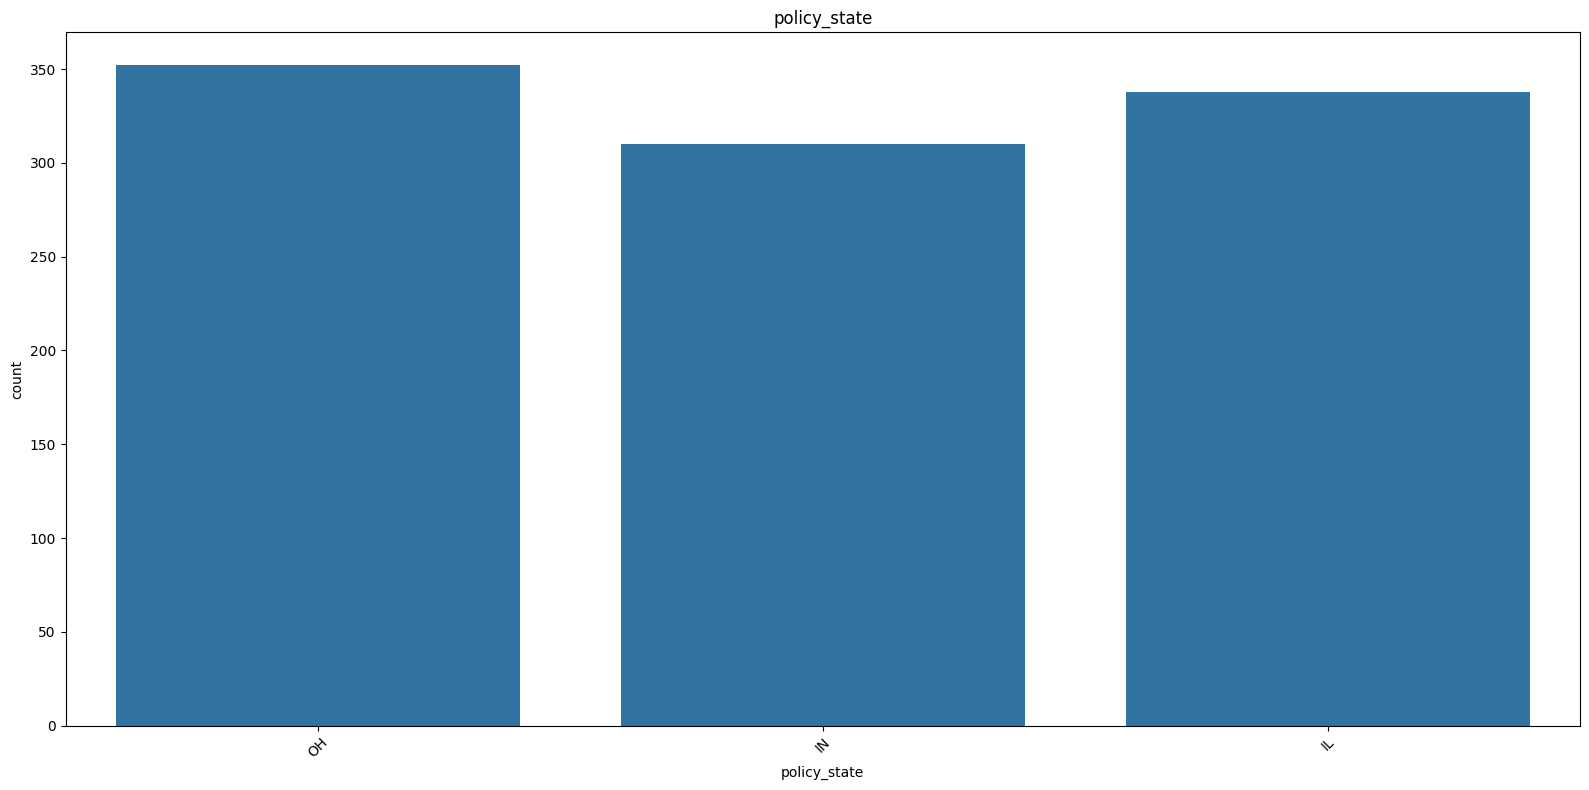

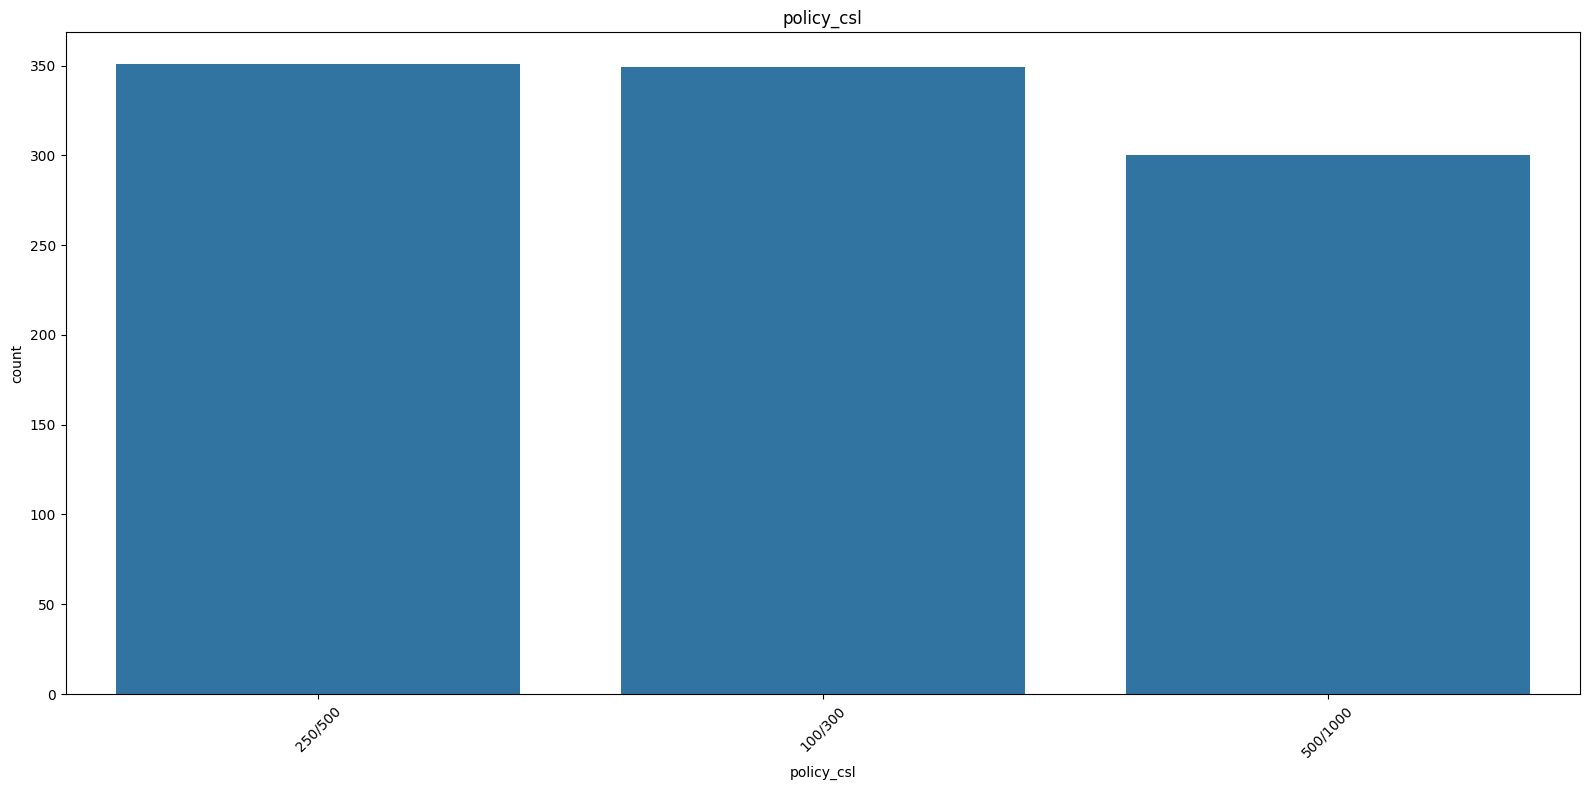

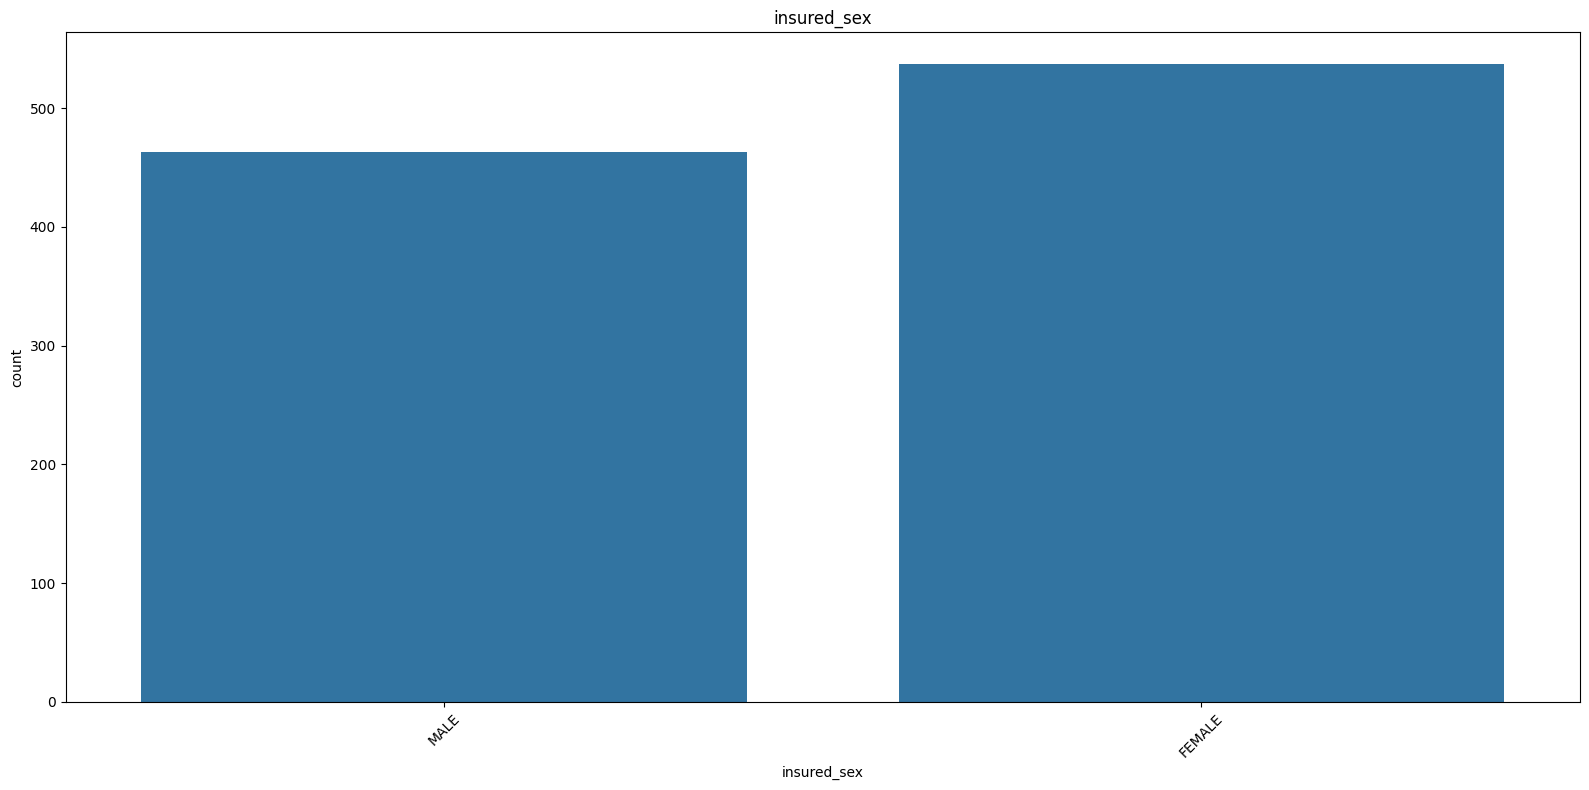

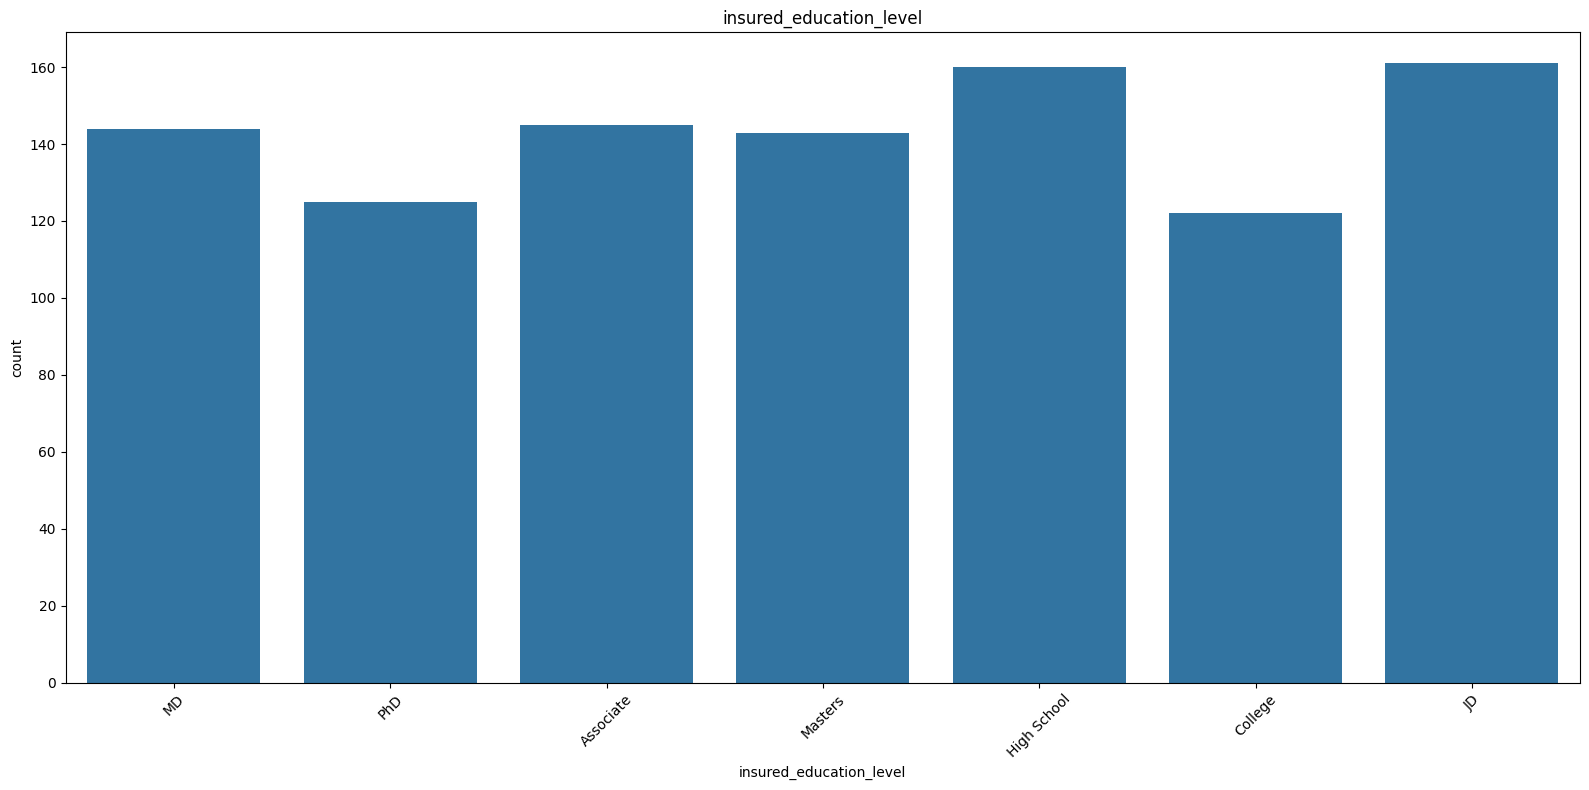

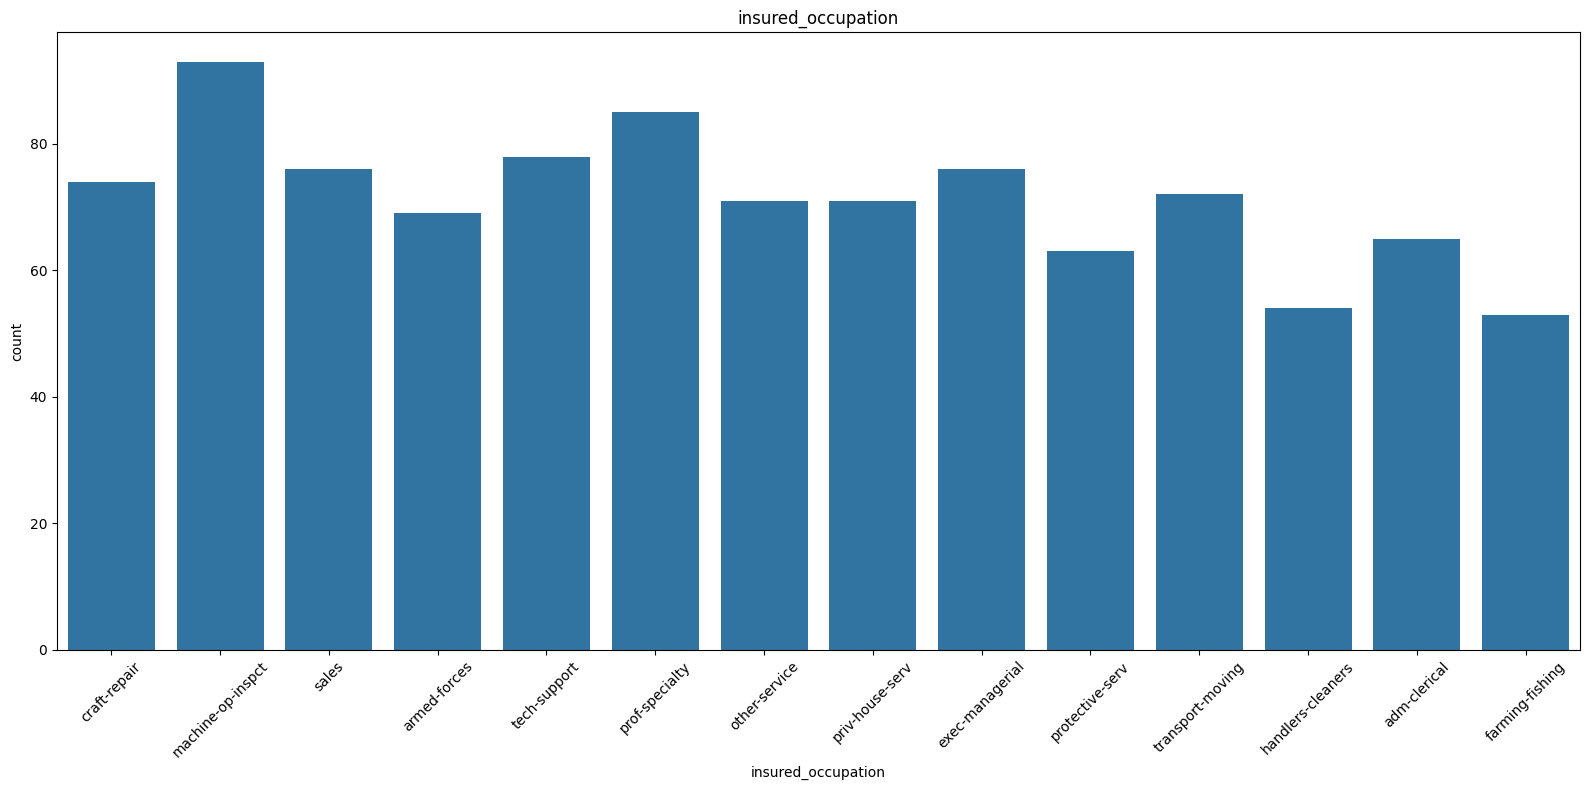

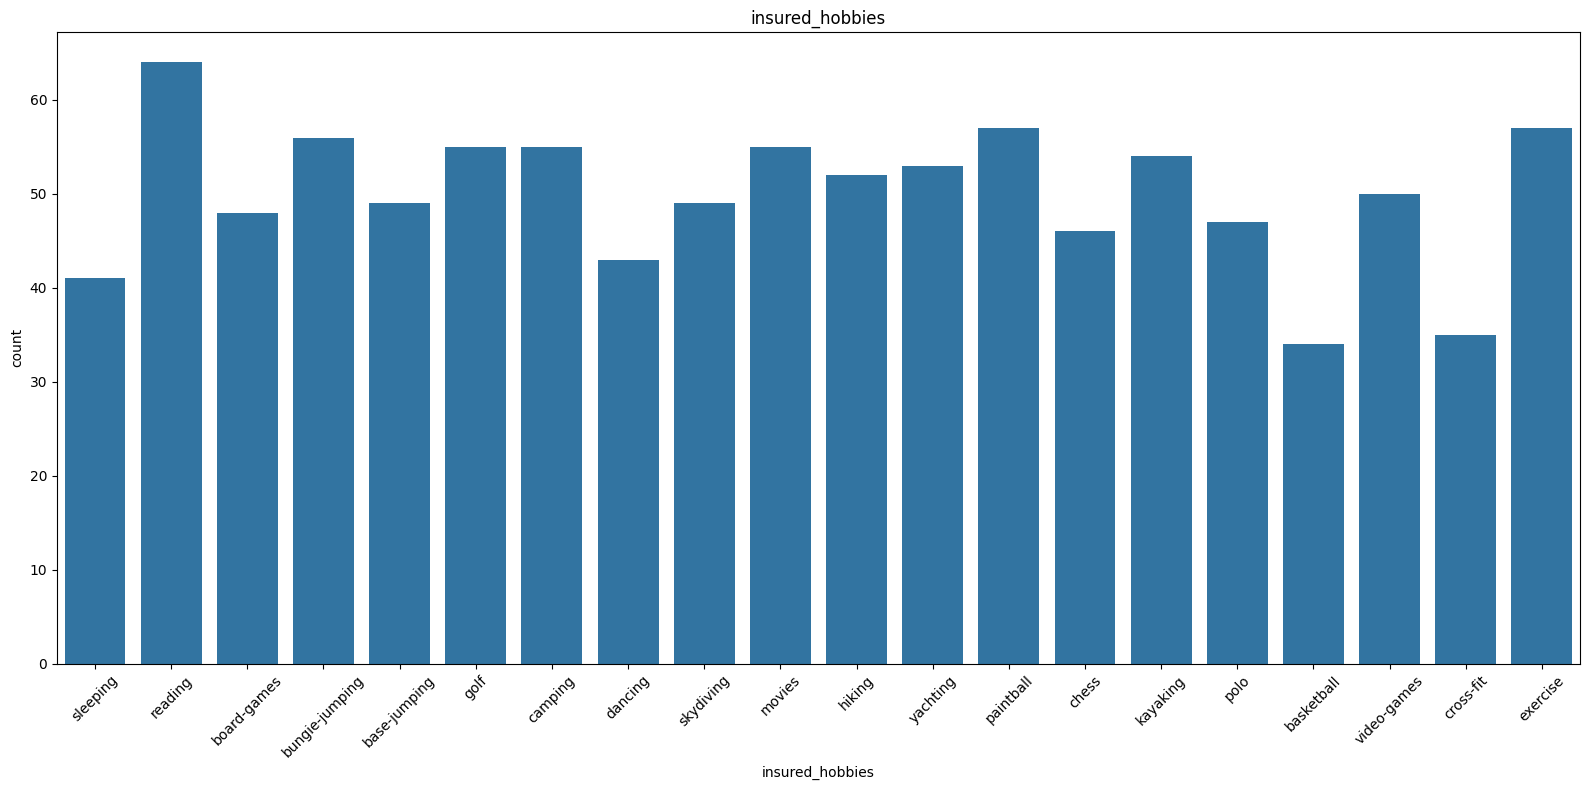

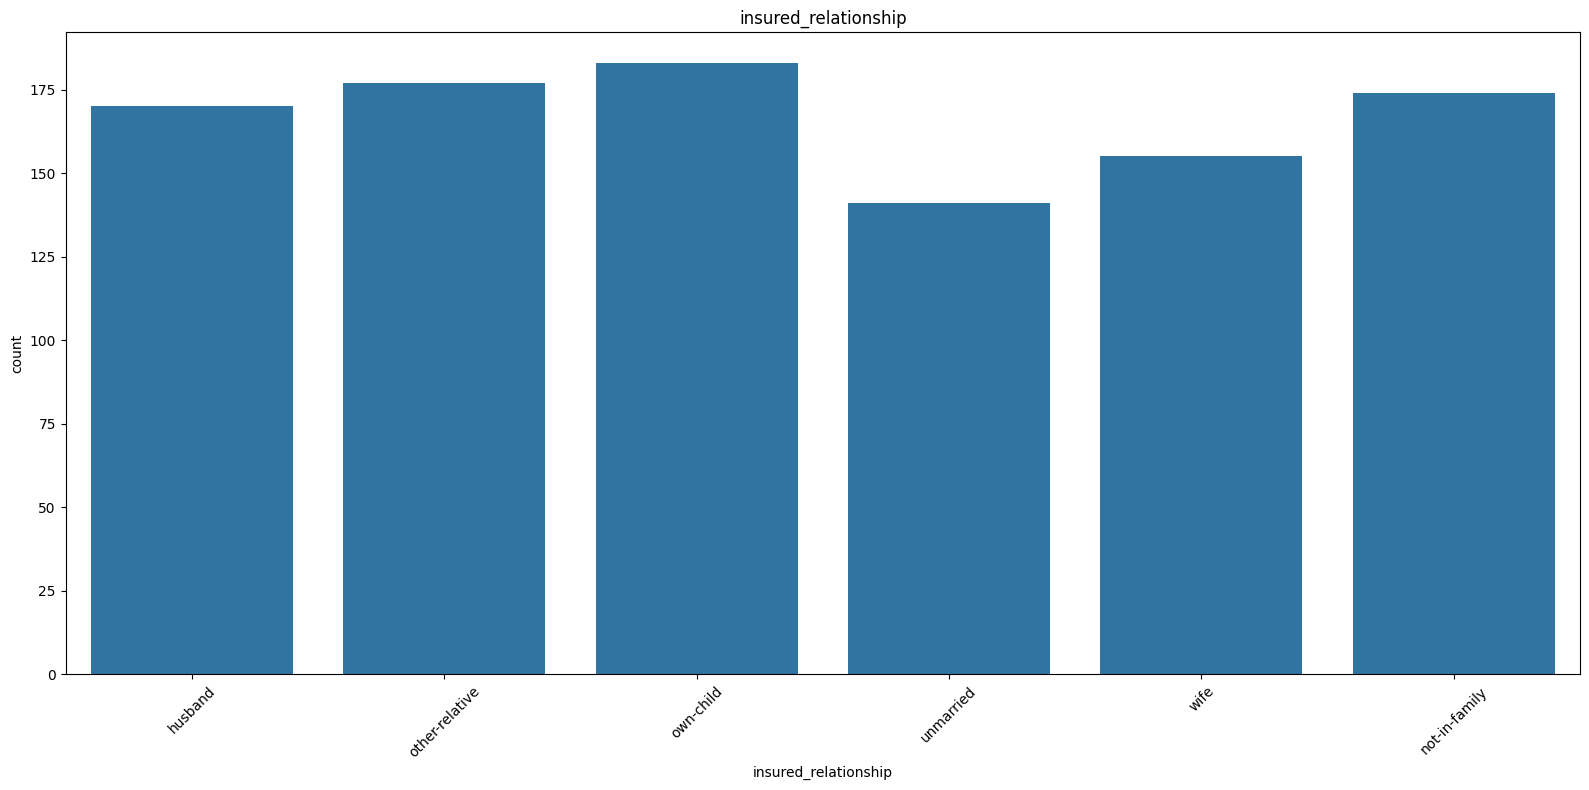

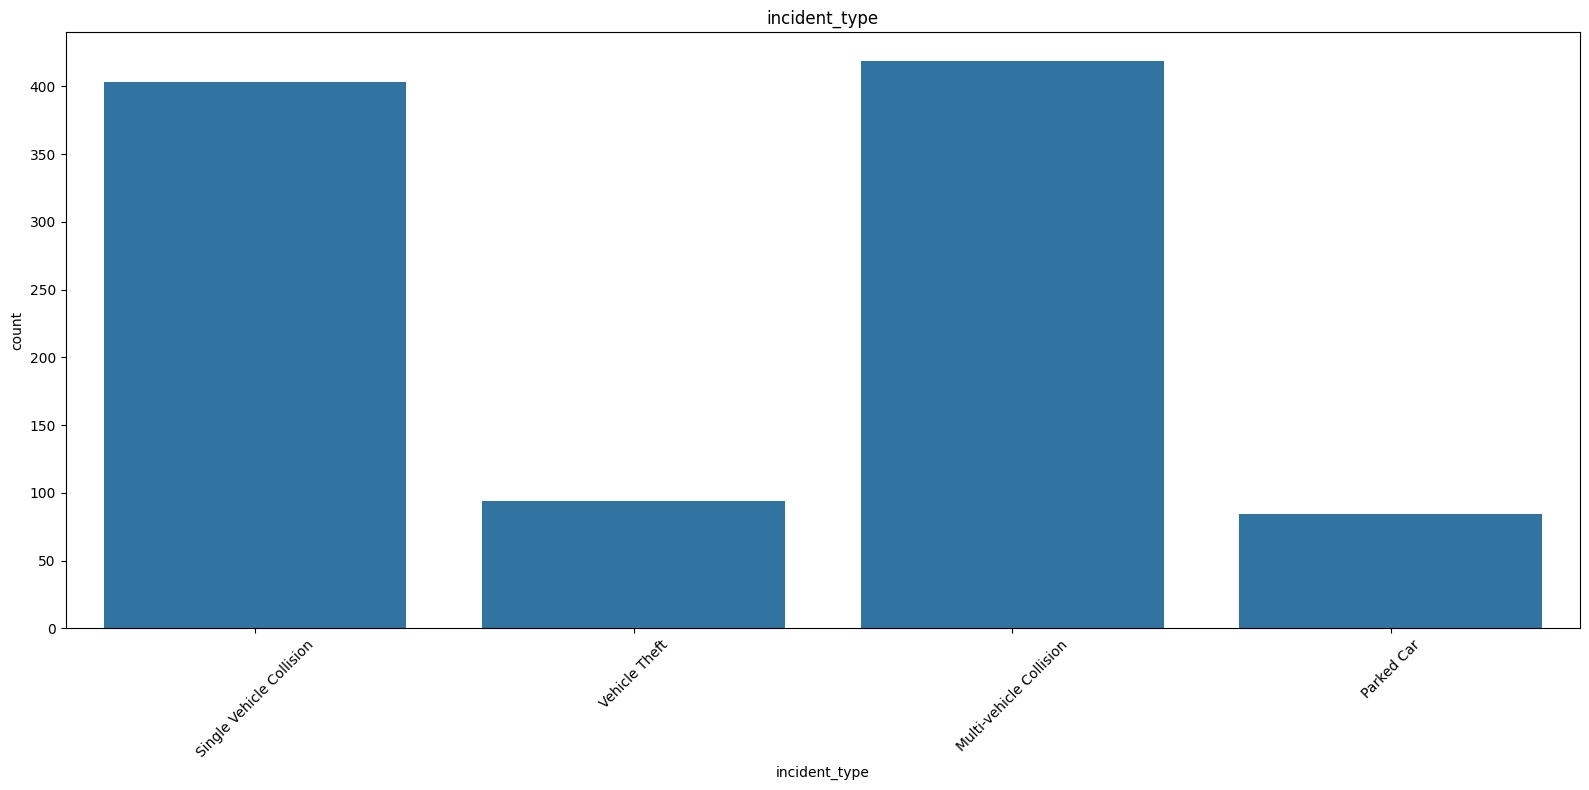

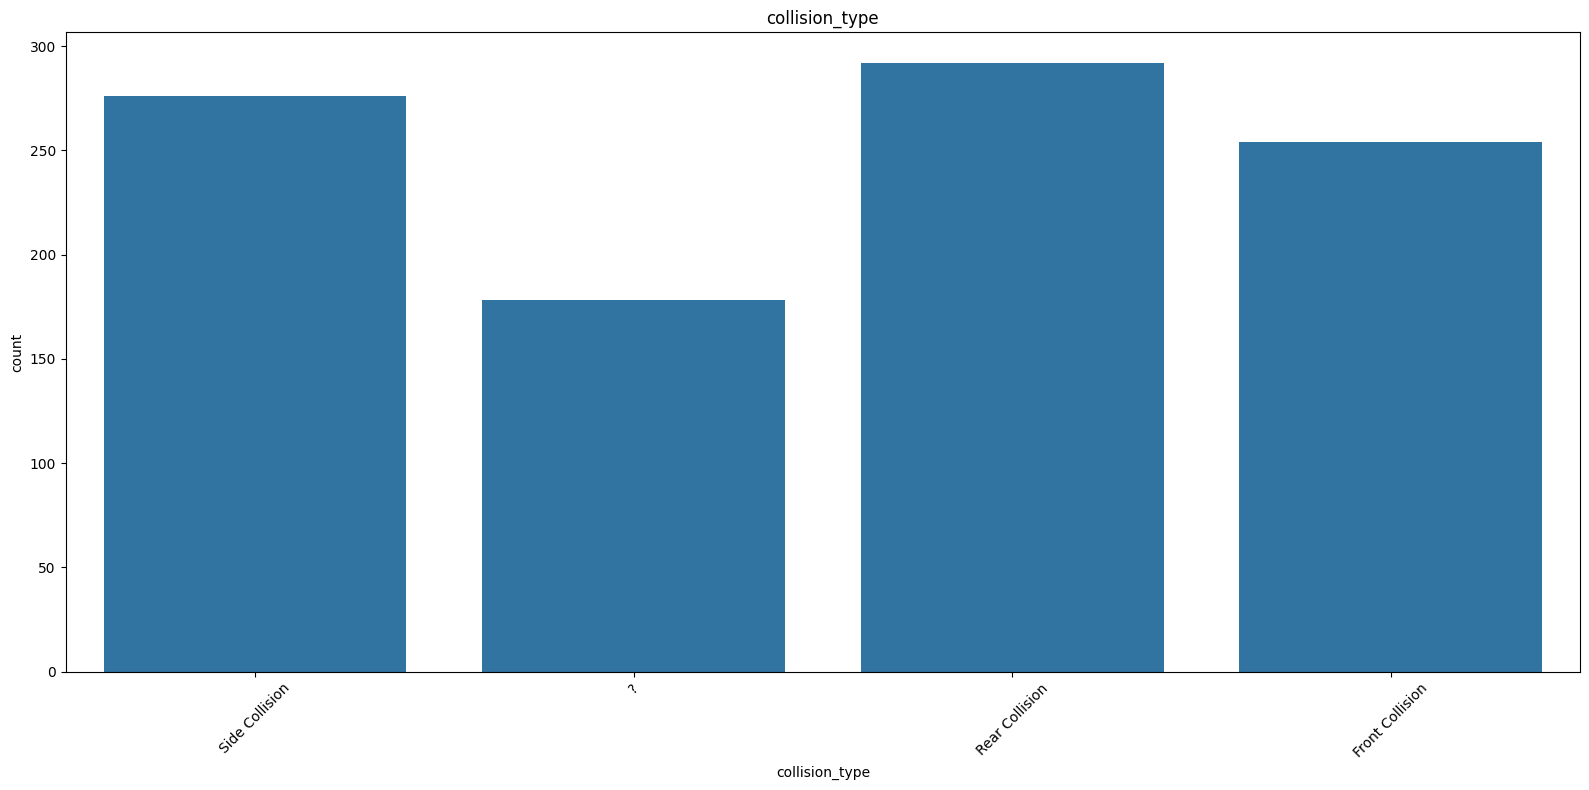

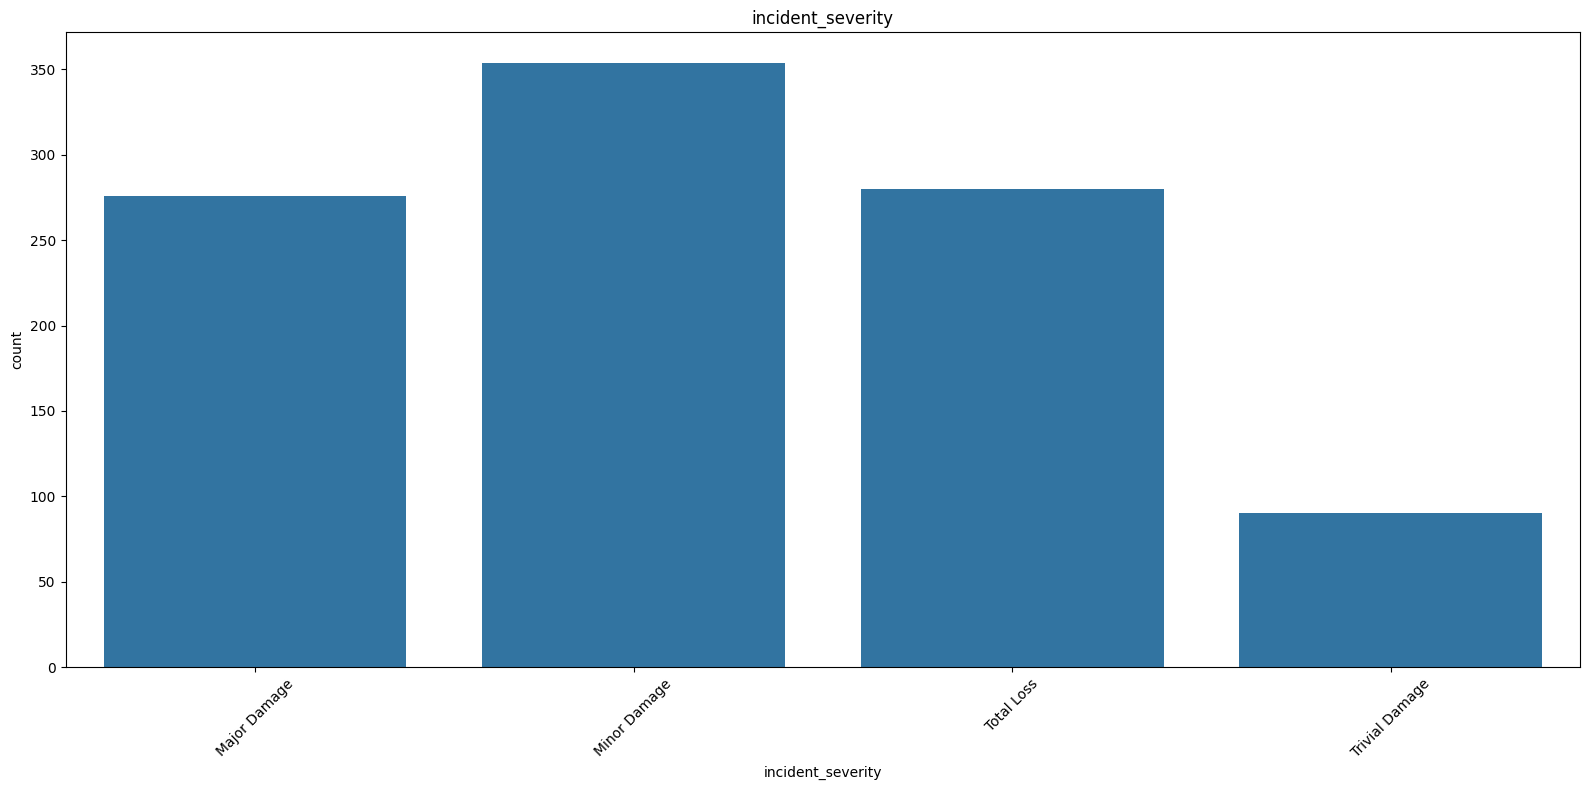

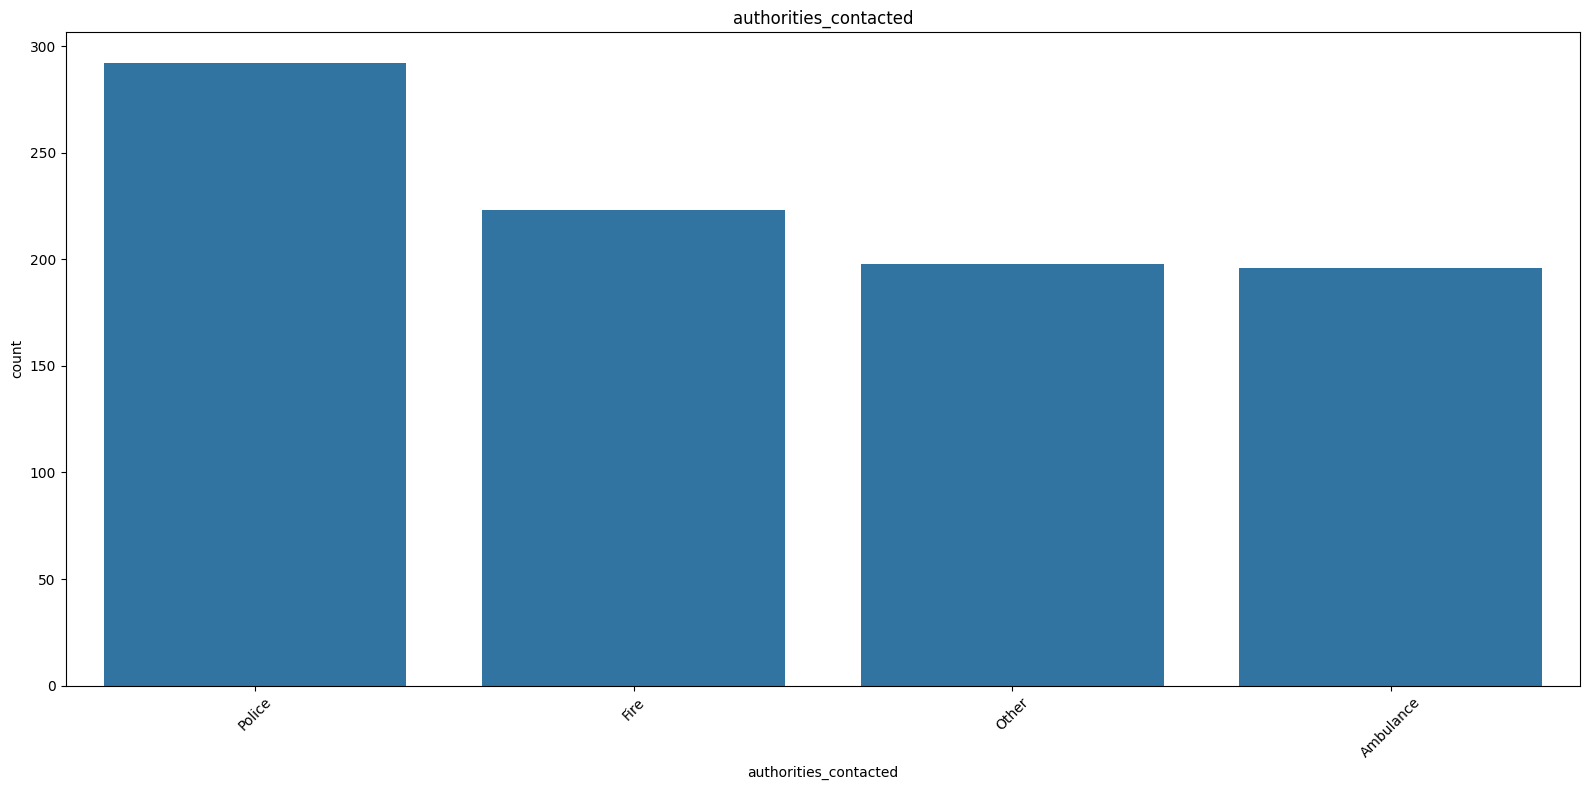

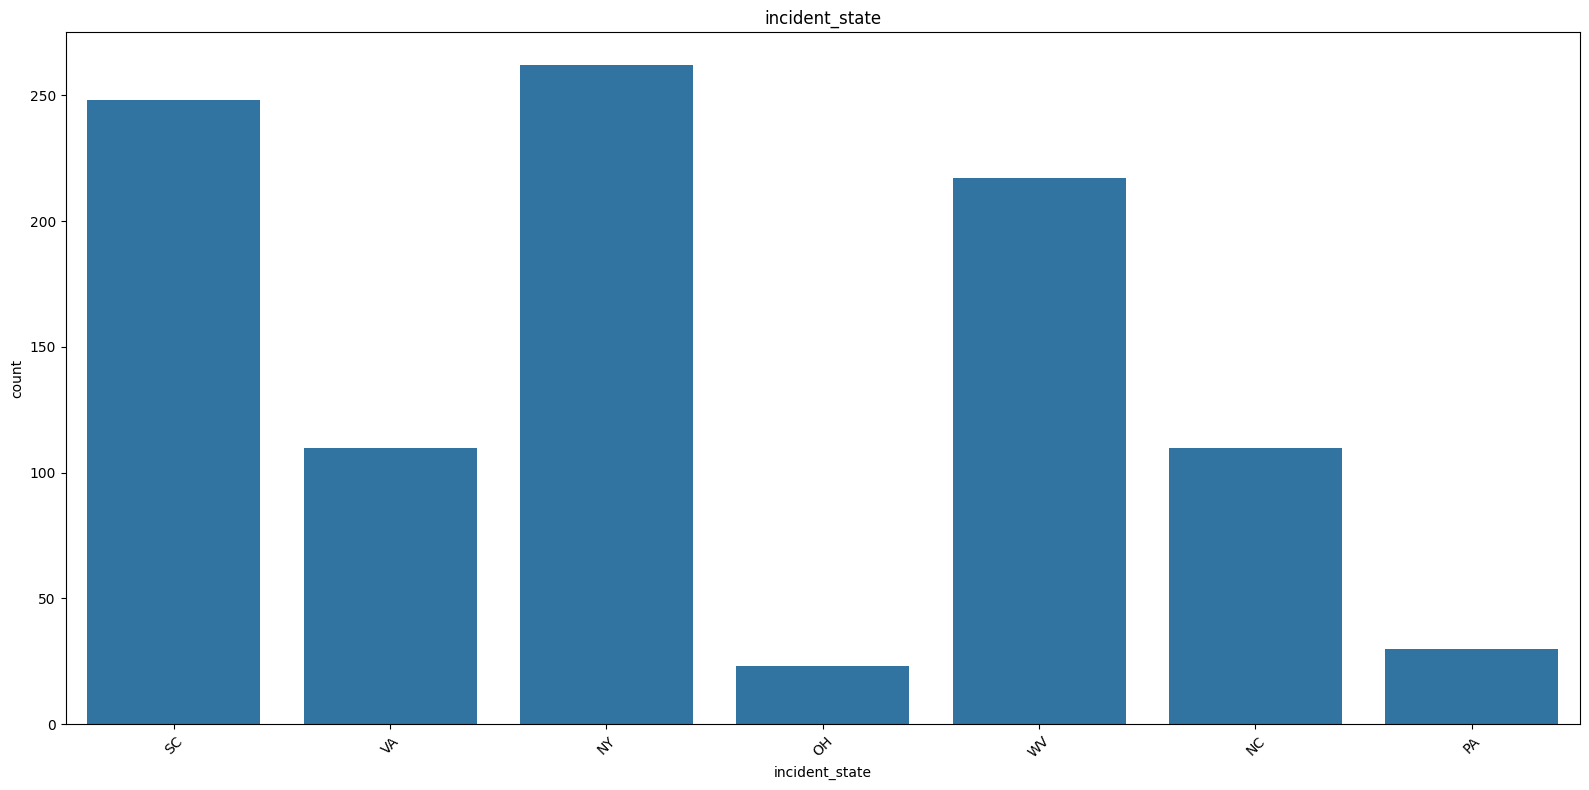

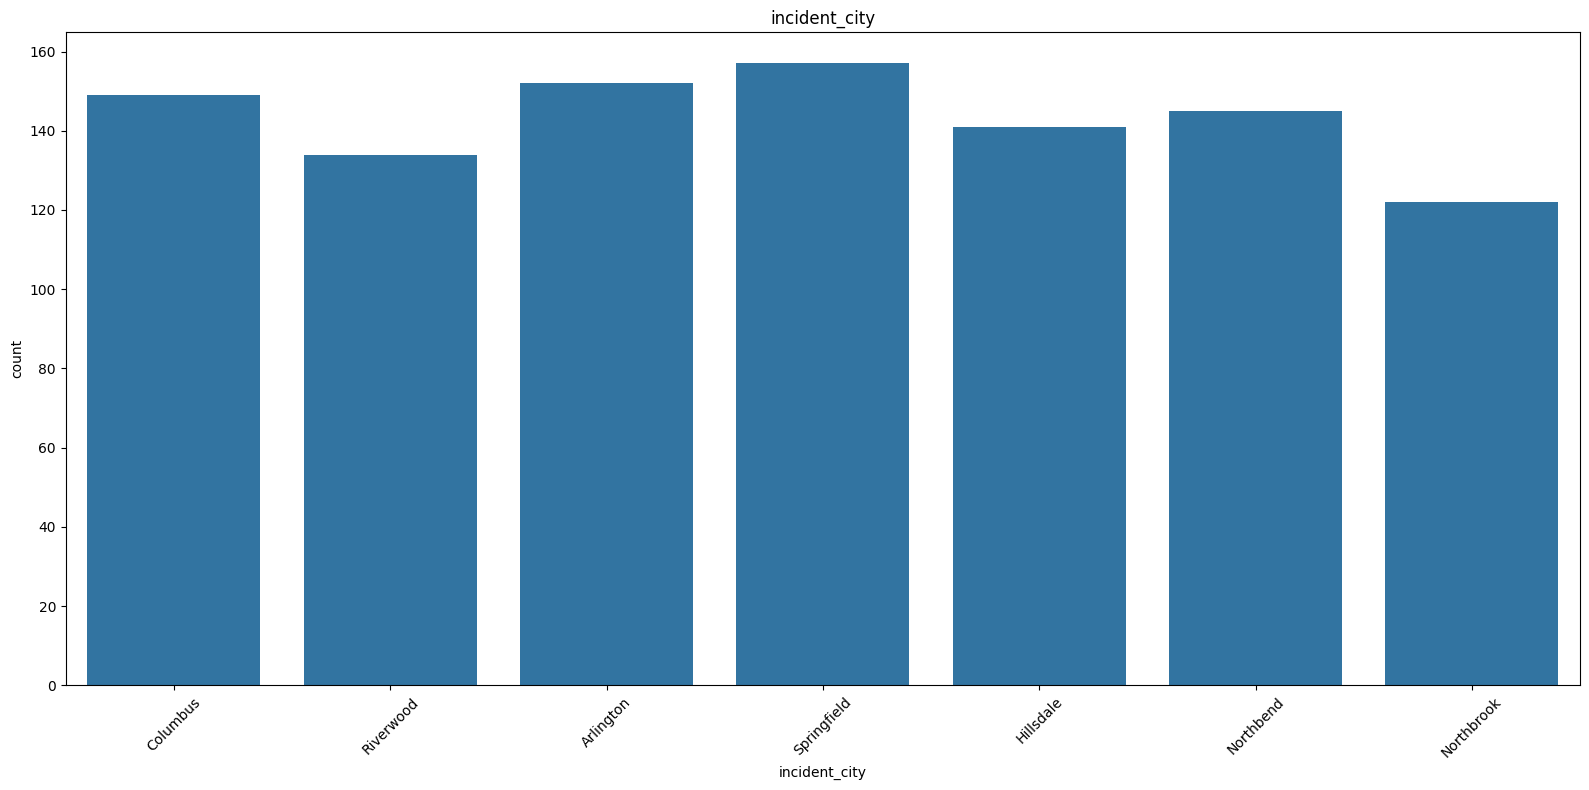

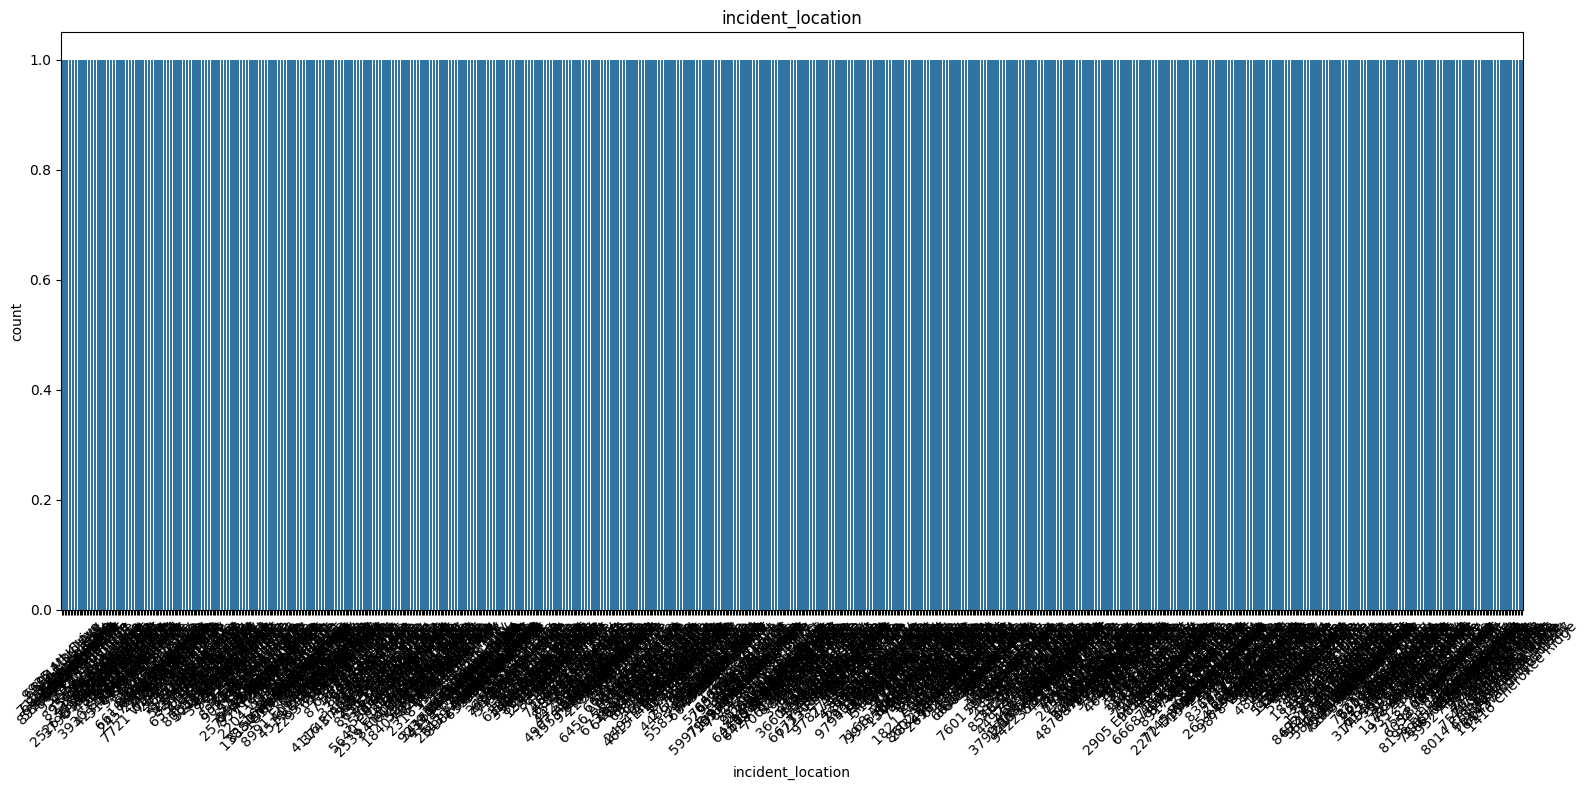

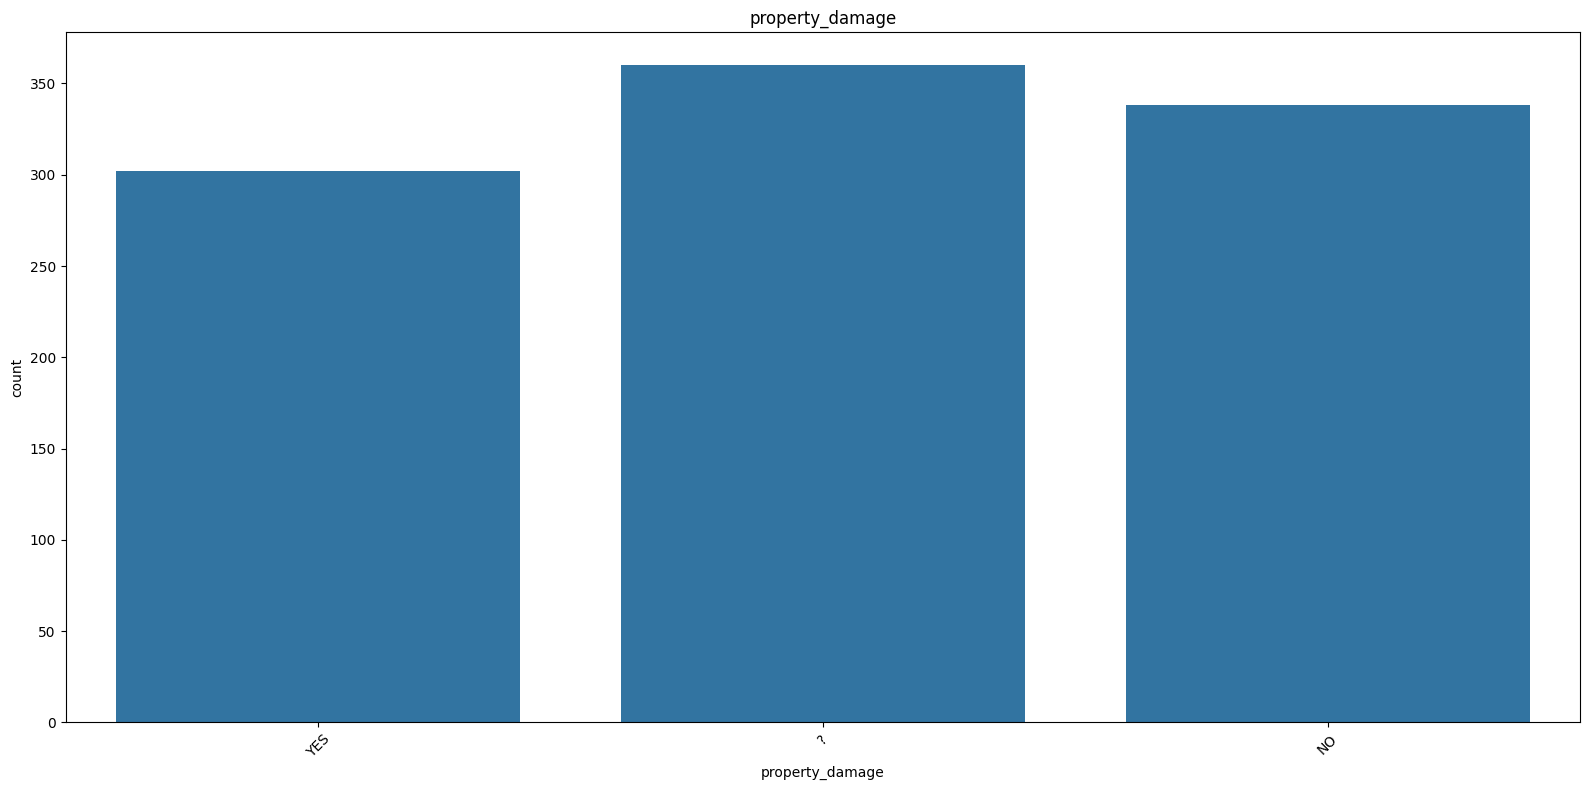

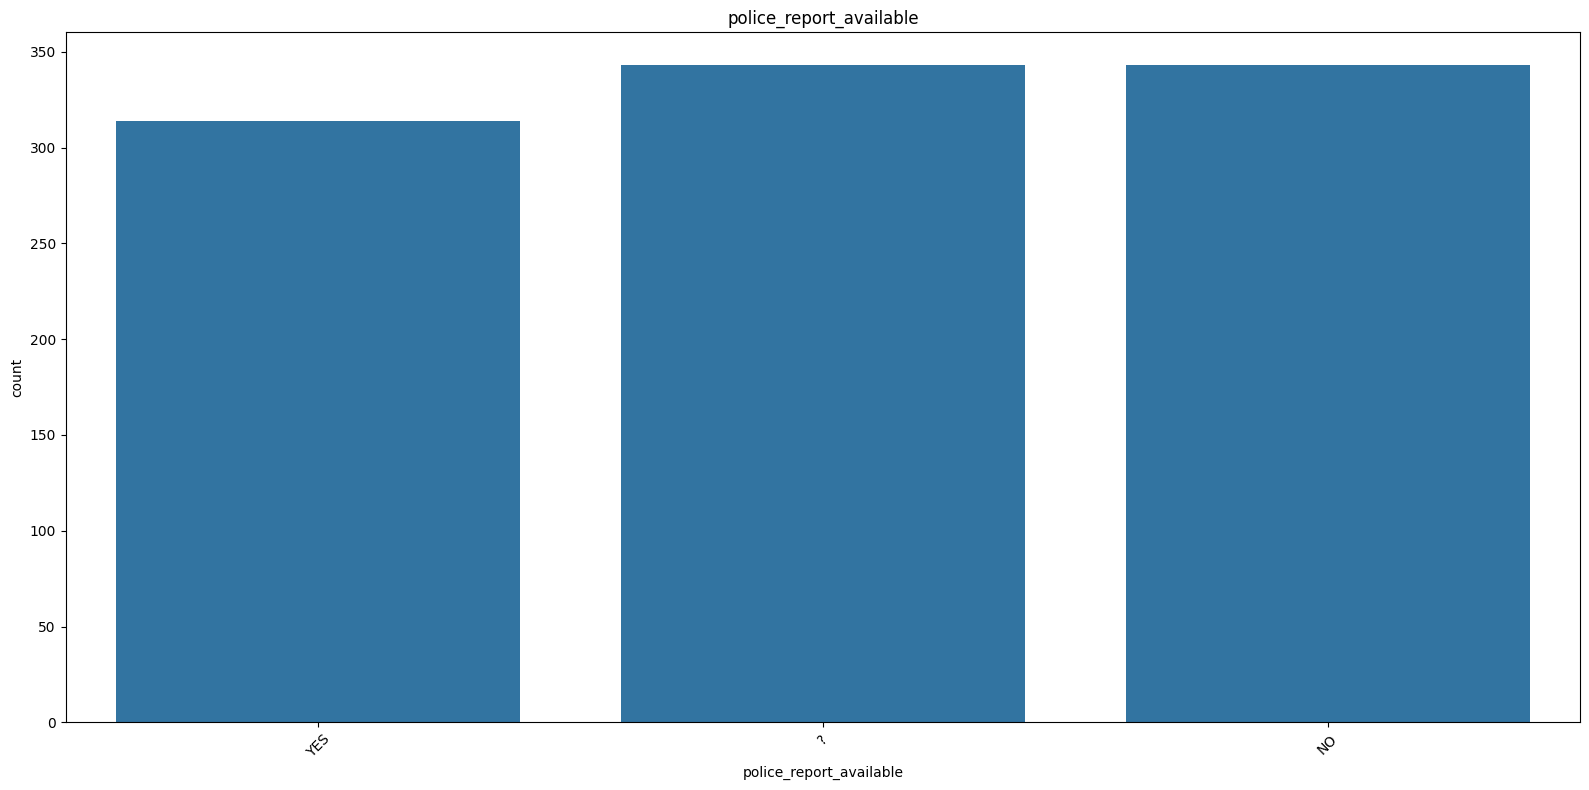

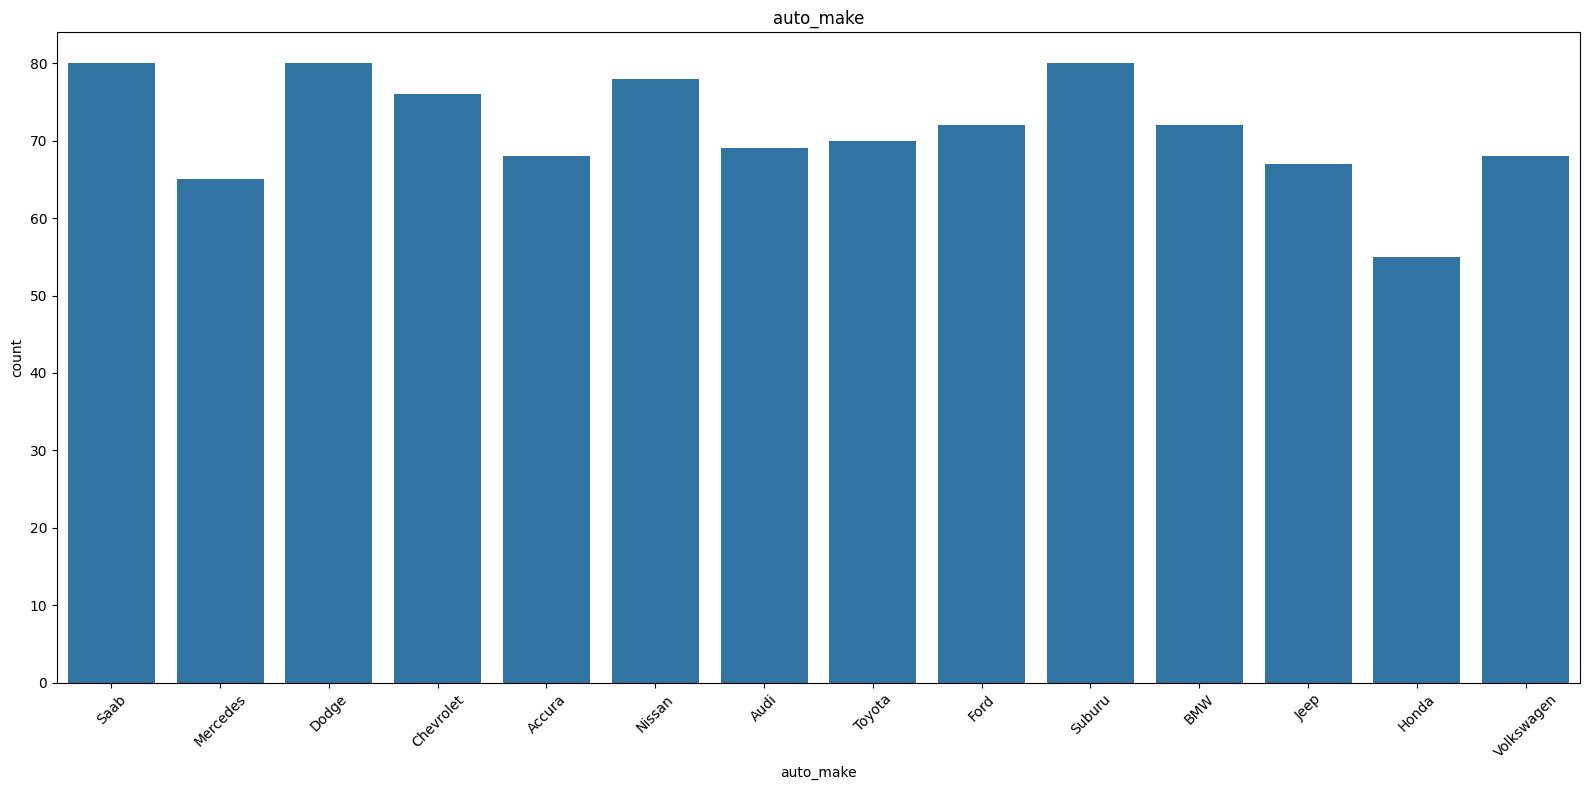

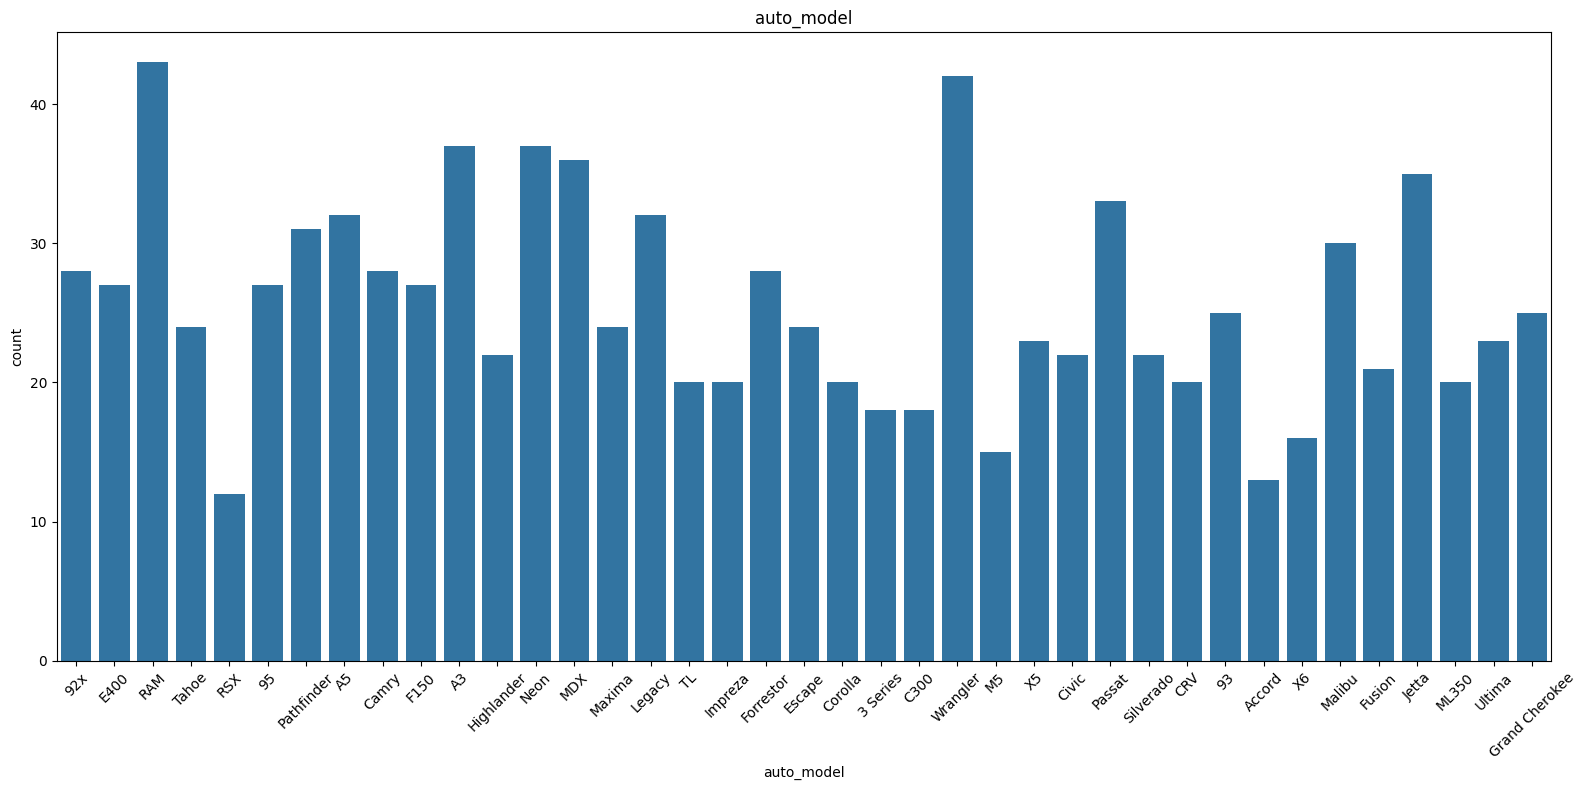

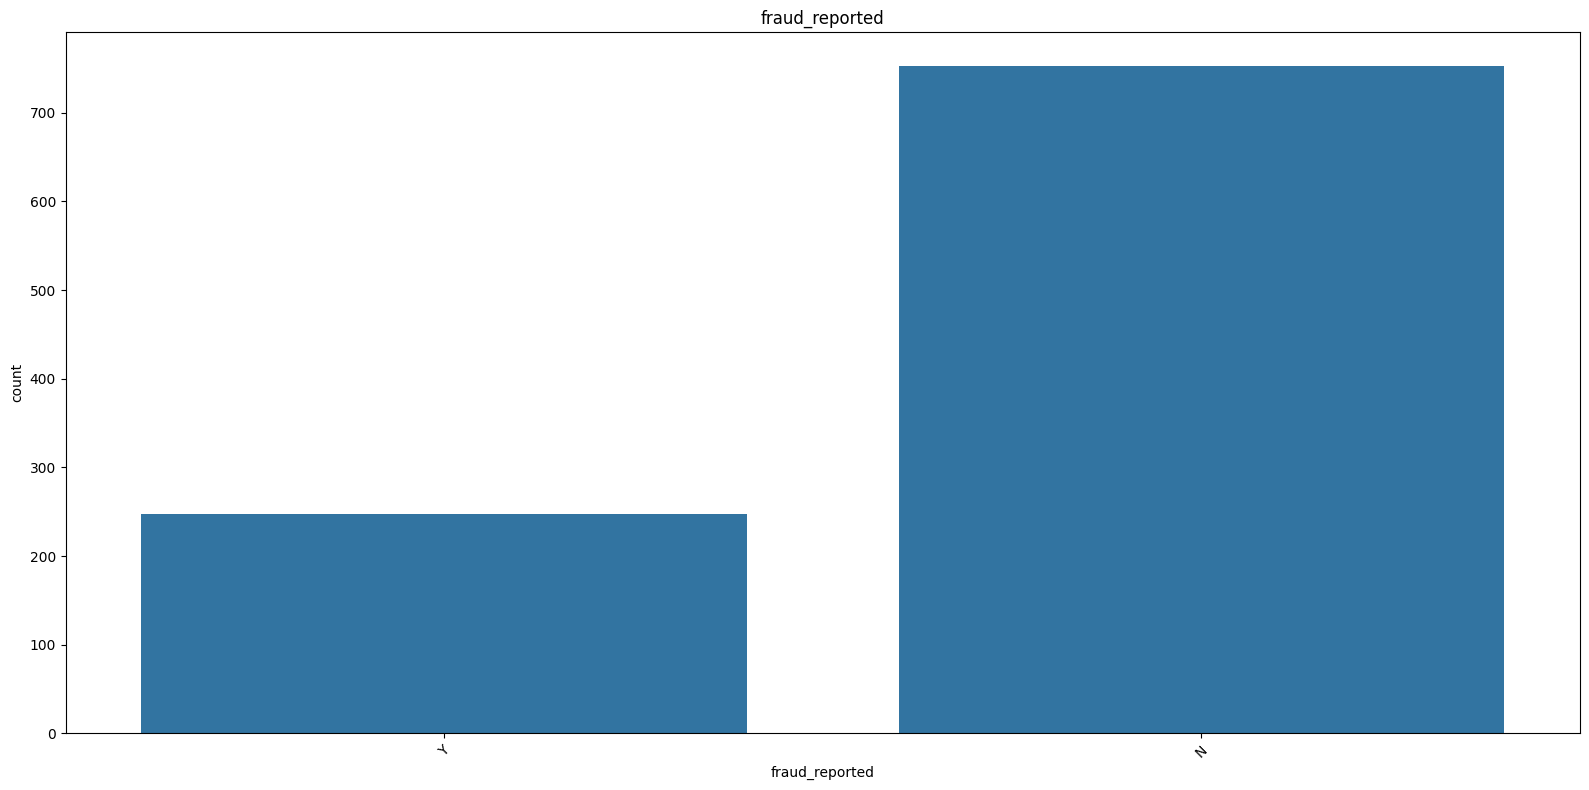

In [20]:
for col in categorical_columns:
    plt.figure(figsize=(16,8))
    sns.countplot(x=col, data=df)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Sure! Here's a concise statistical and business-focused analysis of listed categorical columns based on typical insurance claim datasets:

---

### Column Overview & Data Types

All the columns you provided are **categorical variables**, mostly **nominal** (no intrinsic order) except possibly `policy_csl` (coverage limits, which could be ordinal) and `incident_severity` (which can be ordinal if severity levels have ranking).

| Column Name               | Type                | Description / Typical Values             | Business Impact Summary                               |
| ------------------------- | ------------------- | ---------------------------------------- | ----------------------------------------------------- |
| `policy_state`            | Categorical         | US states, e.g., CA, NY                  | Regional claim patterns, legal/regulatory differences |
| `policy_csl`              | Ordinal Categorical | Coverage limits like 100/300/500         | Policy risk levels, premium calculation               |
| `insured_sex`             | Categorical         | Male, Female                             | Risk profiling, fraud detection                       |
| `insured_education_level` | Ordinal Categorical | High School, College, etc.               | Risk assessment, fraud likelihood                     |
| `insured_occupation`      | Categorical         | Job categories                           | Risk exposure, fraud risk                             |
| `insured_hobbies`         | Categorical         | Activities like fishing, golf, skydiving | Risk factors outside driving                          |
| `insured_relationship`    | Categorical         | Self, Spouse, Child                      | Policyholder context, claim patterns                  |
| `incident_type`           | Categorical         | Collision, Theft, Fire                   | Claim cause analysis, fraud identification            |
| `collision_type`          | Categorical         | Rear-end, Side-swipe                     | Accident specifics, liability assessment              |
| `incident_severity`       | Ordinal Categorical | Minor, Major, Total Loss                 | Claim cost prediction, reserve setting                |
| `authorities_contacted`   | Categorical         | Police, Fire Dept, None                  | Severity verification, fraud detection                |
| `incident_state`          | Categorical         | US states, e.g., CA, TX                  | Regional claim frequency, legal environment           |
| `incident_city`           | Categorical         | Cities like Los Angeles, New York        | Geographic risk, fraud patterns                       |
| `incident_location`       | Categorical         | Street, Highway, Parking lot             | Risk exposure mapping                                 |
| `property_damage`         | Categorical         | Yes, No                                  | Severity proxy, claim cost driver                     |
| `police_report_available` | Categorical         | Yes, No                                  | Fraud detection, claim validation                     |
| `auto_make`               | Categorical         | Toyota, Ford, BMW                        | Vehicle risk profiling, premium pricing               |
| `auto_model`              | Categorical         | Corolla, F-150, 3 Series                 | Vehicle risk and repair cost assessment               |
| `fraud_reported`          | Binary Categorical  | Yes, No                                  | Target variable for fraud detection models            |

---

### Typical Distributions & Insights

* **Policy State & Incident State/City:** Usually show clustering around states with higher populations or stricter regulations. States with more claims may indicate higher risk or fraud opportunities.
* **Policy CSL:** Shows different coverage tiers; higher coverage might correlate with higher premiums but also higher claim amounts.
* **Insured Sex / Education / Occupation / Hobbies:** Distribution may reveal certain demographics with higher claim or fraud likelihood.
* **Incident Type / Collision Type / Severity:** Helps identify common accident types and severity trends, useful for risk modeling and reserve estimation.
* **Authorities Contacted / Police Report:** Claims with official reports tend to be more legitimate; absence might flag fraud risk.
* **Property Damage:** Indicates severity and cost impact.
* **Auto Make / Model:** Some vehicle types/models are more prone to theft or accidents.
* **Fraud Reported:** Usually imbalanced with fewer 'Yes' entries; critical for fraud detection modeling.

---

### Business Impacts

* **Risk Assessment & Pricing:** Variables like `policy_csl`, `incident_severity`, `auto_make/model`, and demographics influence premium calculation and underwriting.
* **Fraud Detection:** Features like `police_report_available`, `authorities_contacted`, `insured_education_level`, and `incident_type` are useful predictors.
* **Claims Management:** Understanding incident type, severity, and location helps optimize claim handling, reserving, and customer service.
* **Geographic Strategy:** High-claim states or cities may need targeted loss prevention or policy adjustment.
* **Product Design:** Insights into hobbies or occupation might guide development of specialized products or discounts.



# Bivariate Analysis

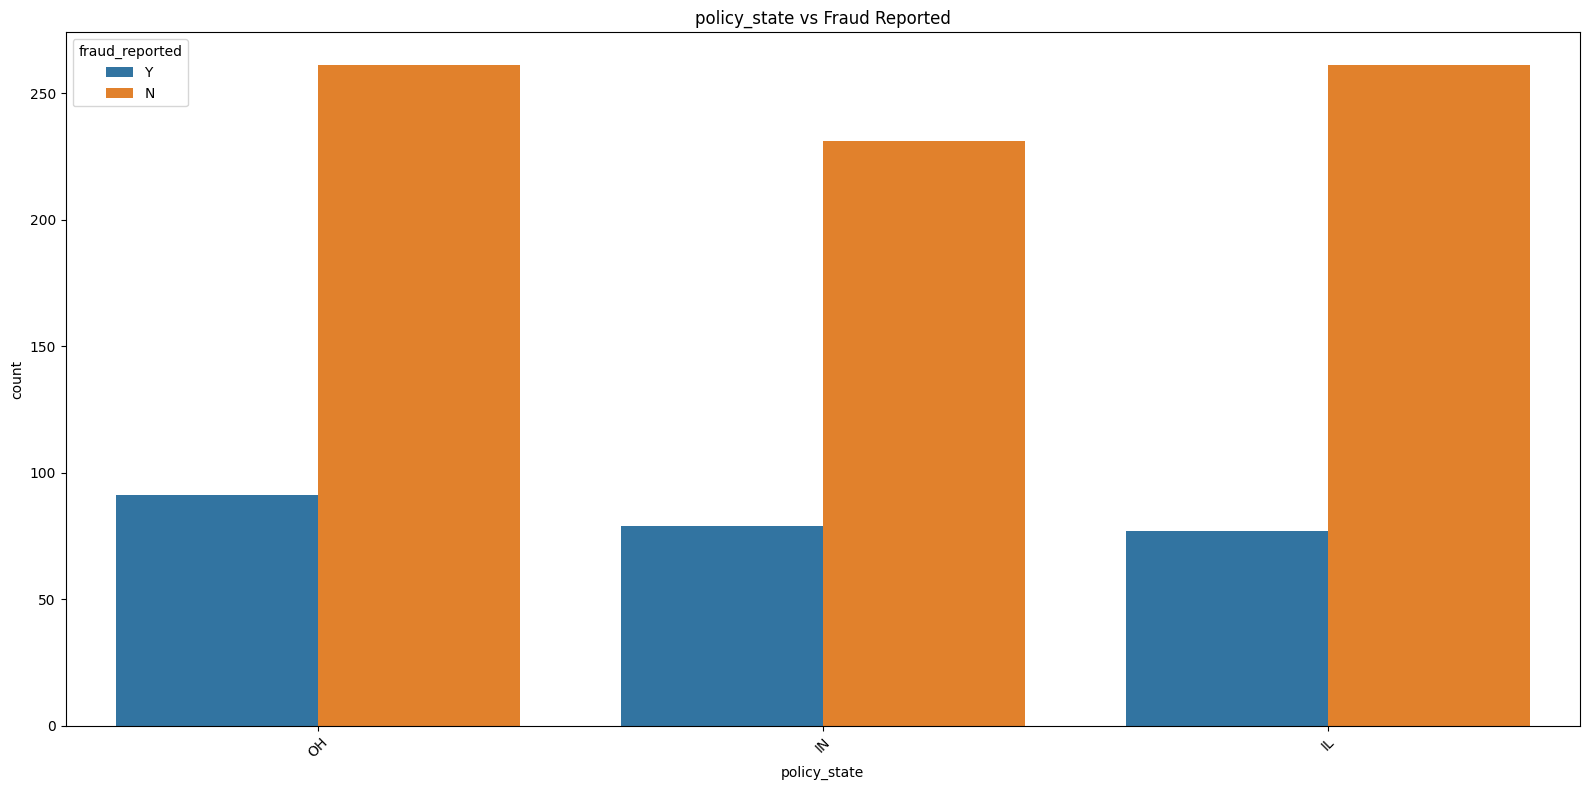

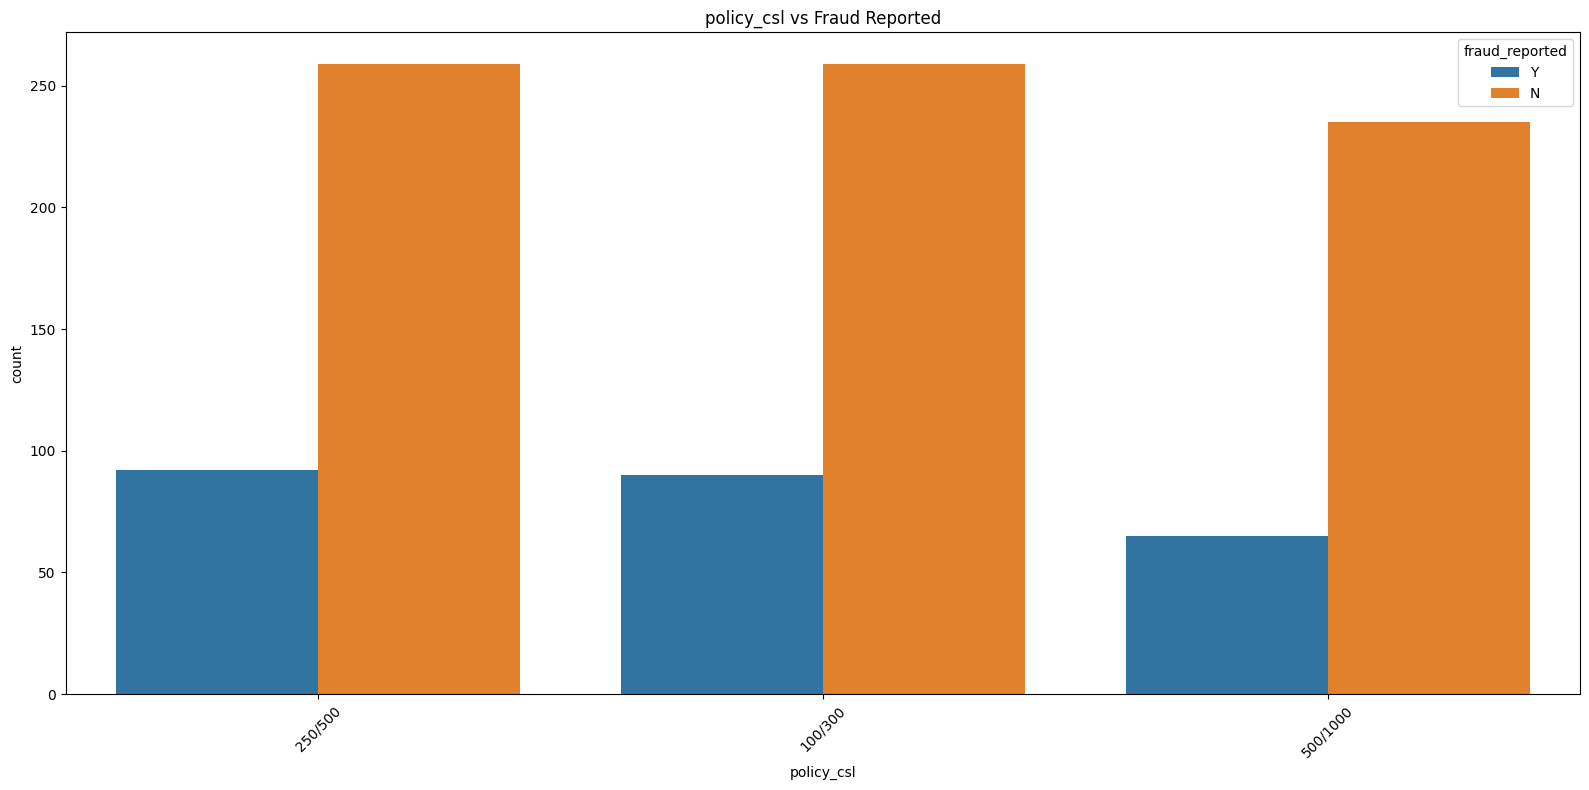

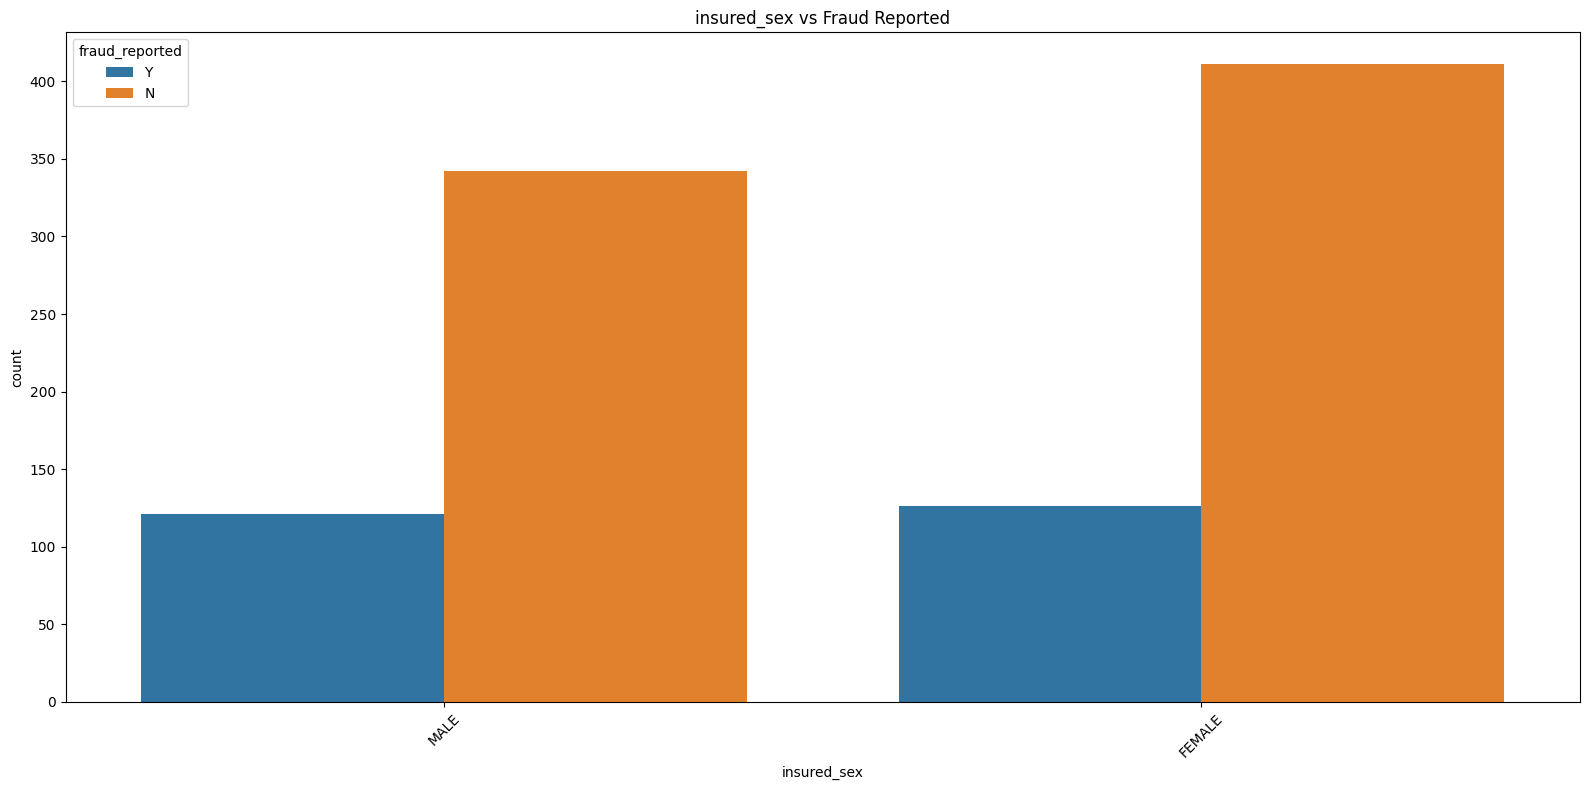

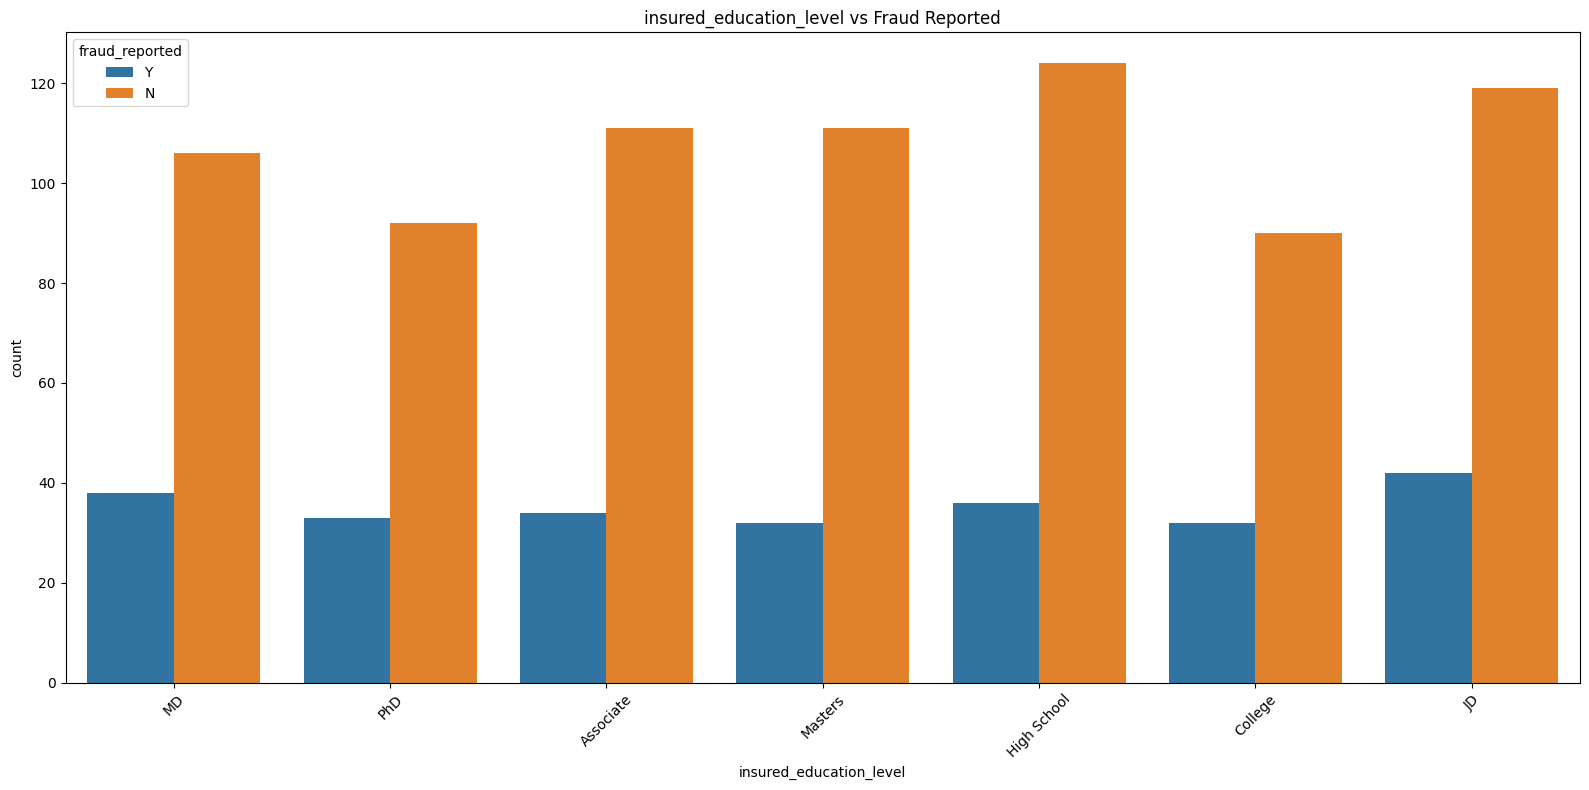

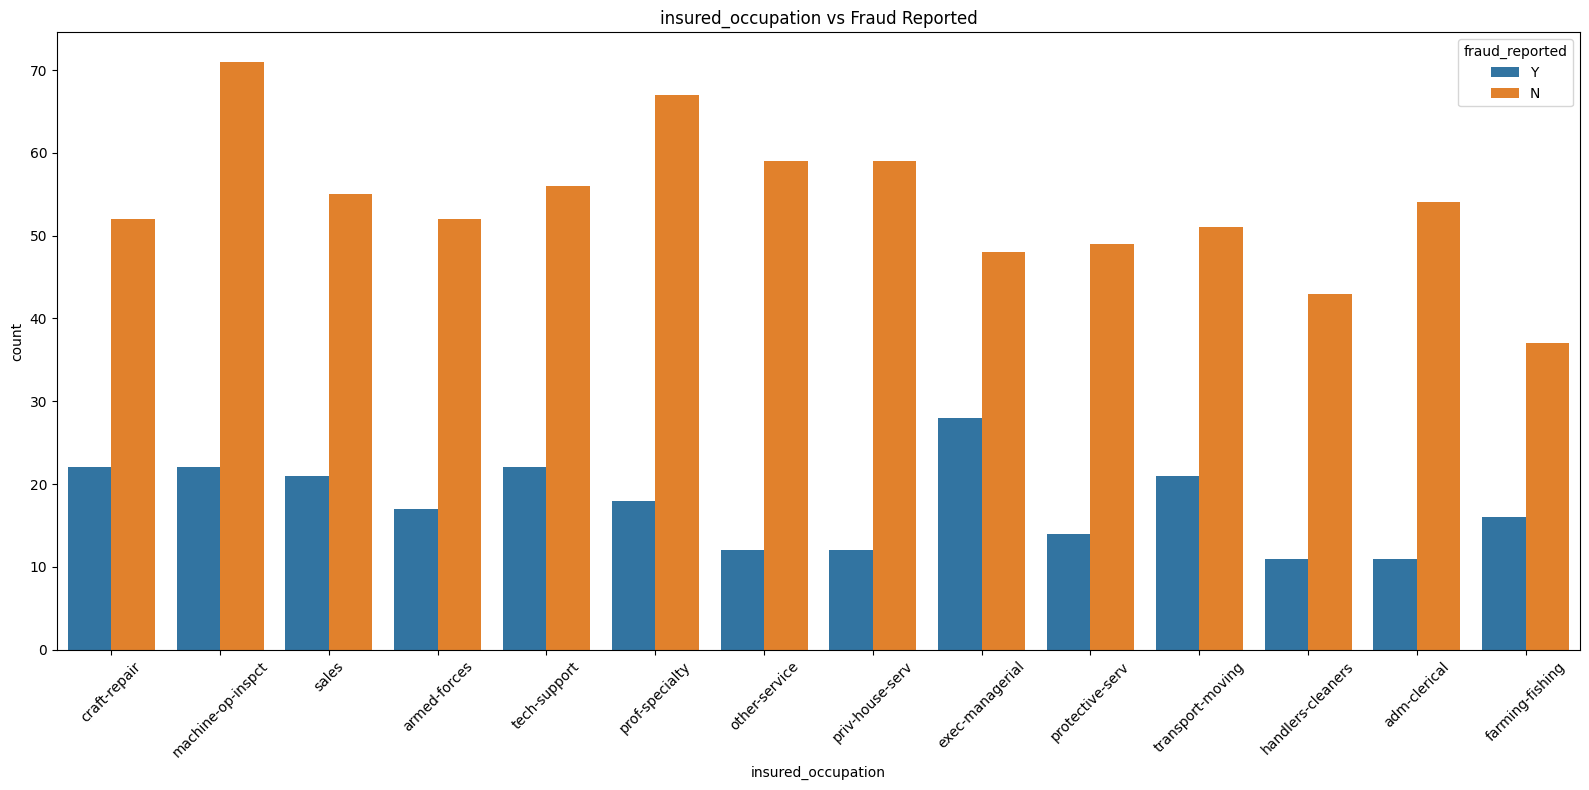

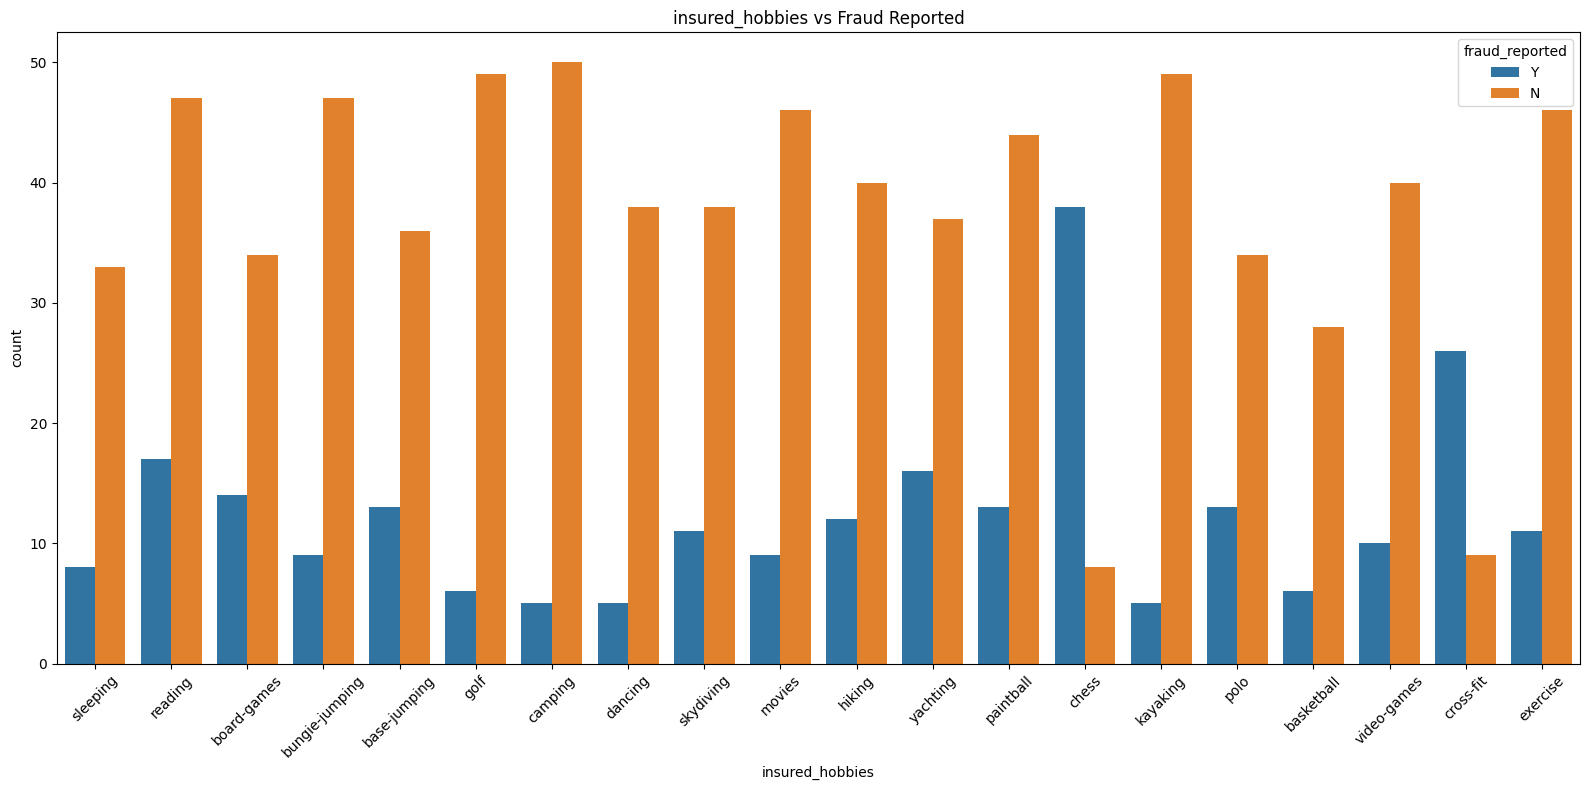

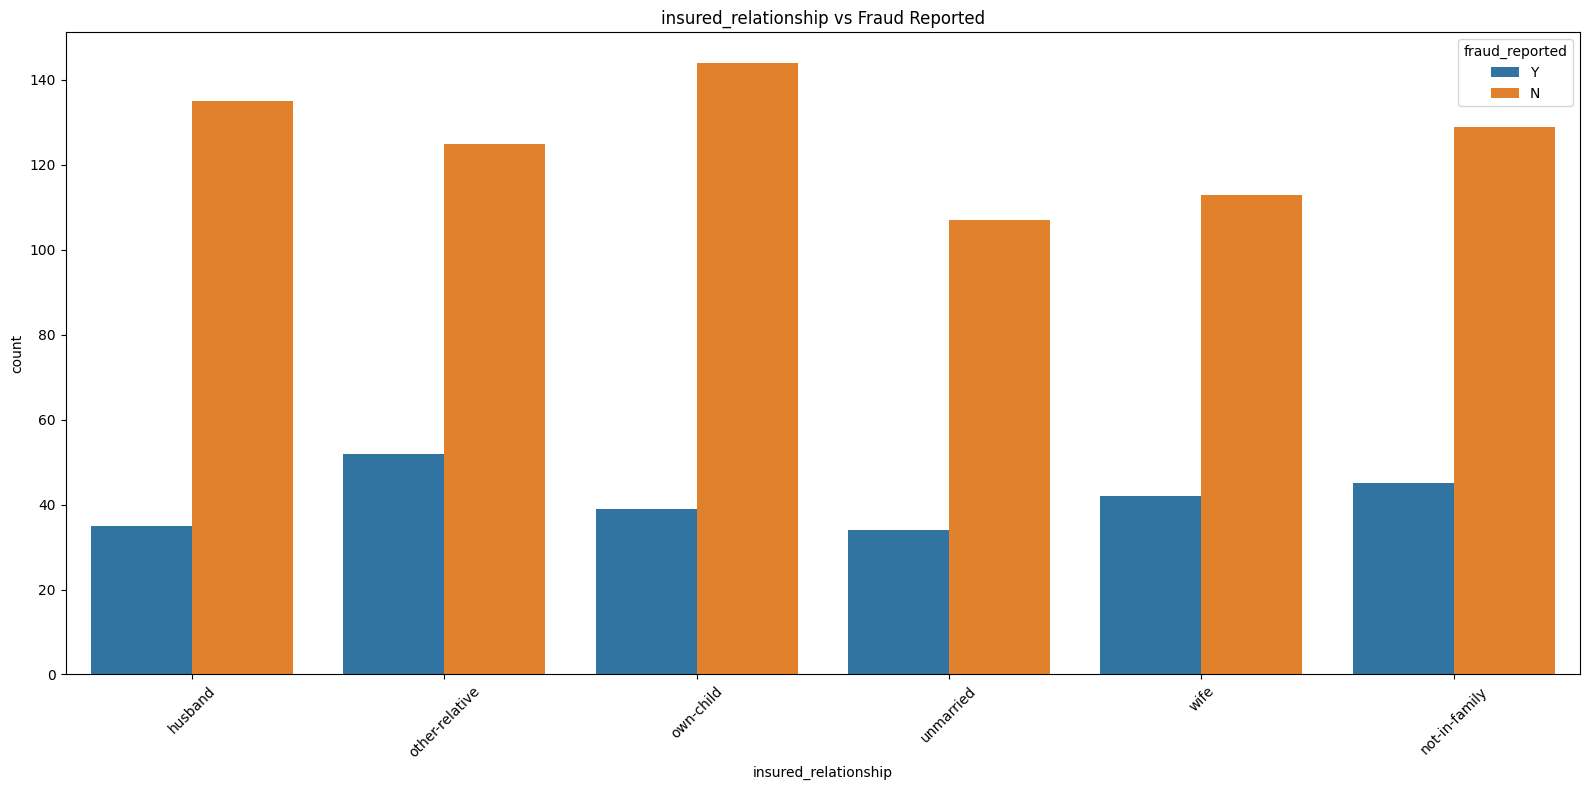

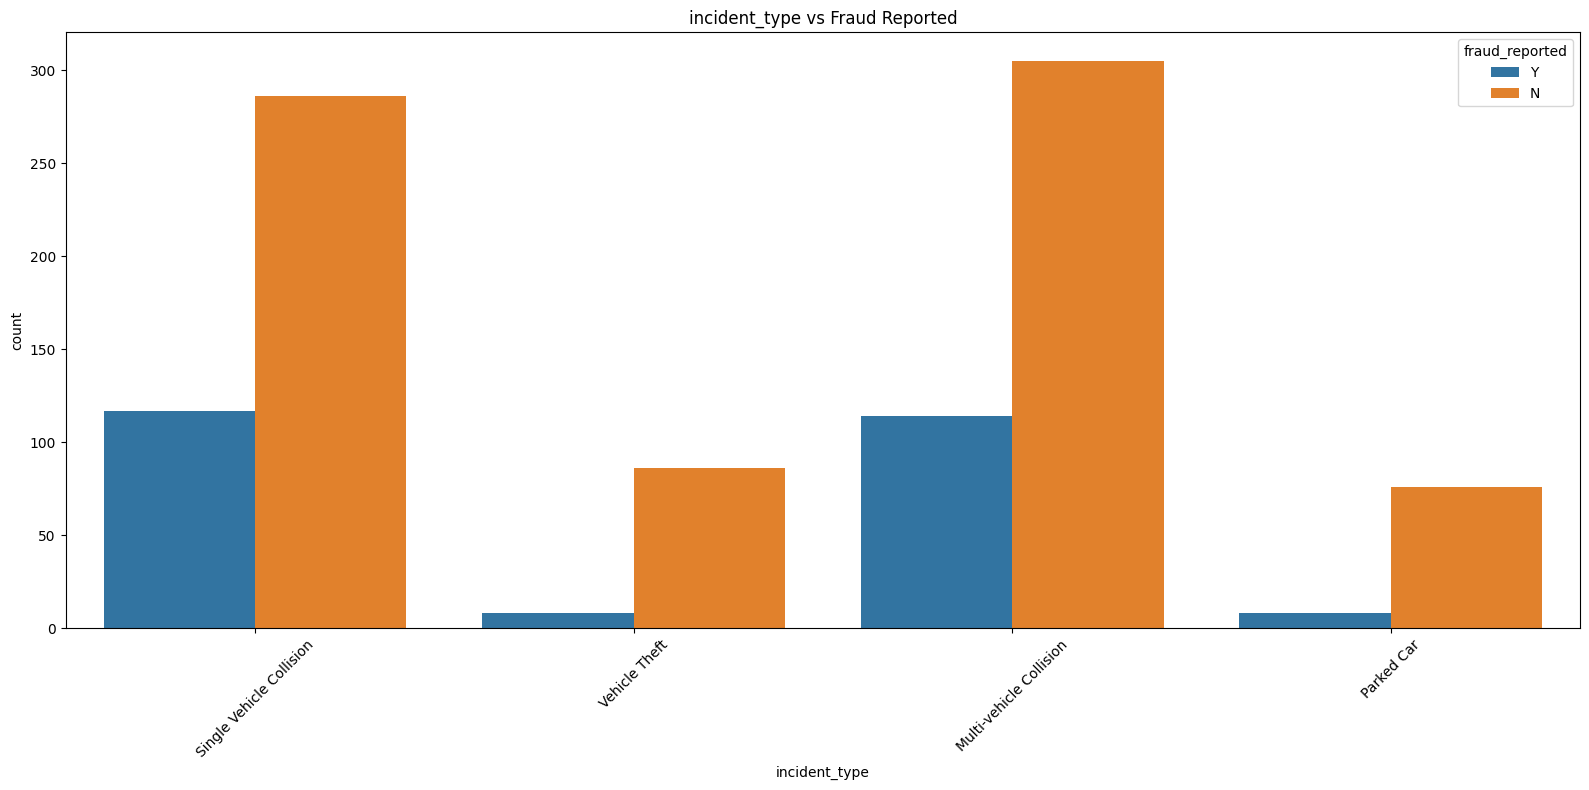

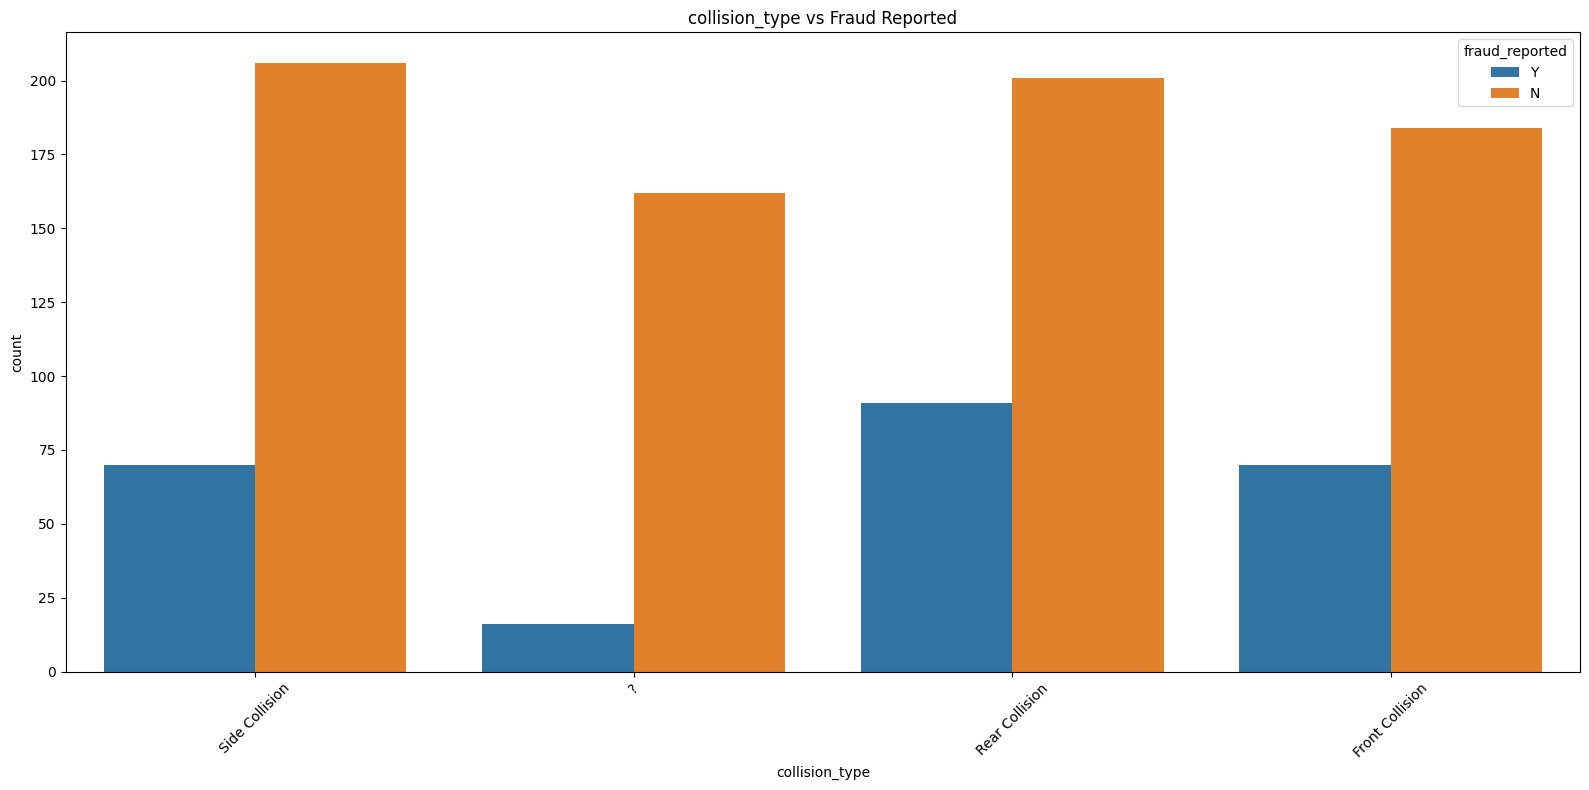

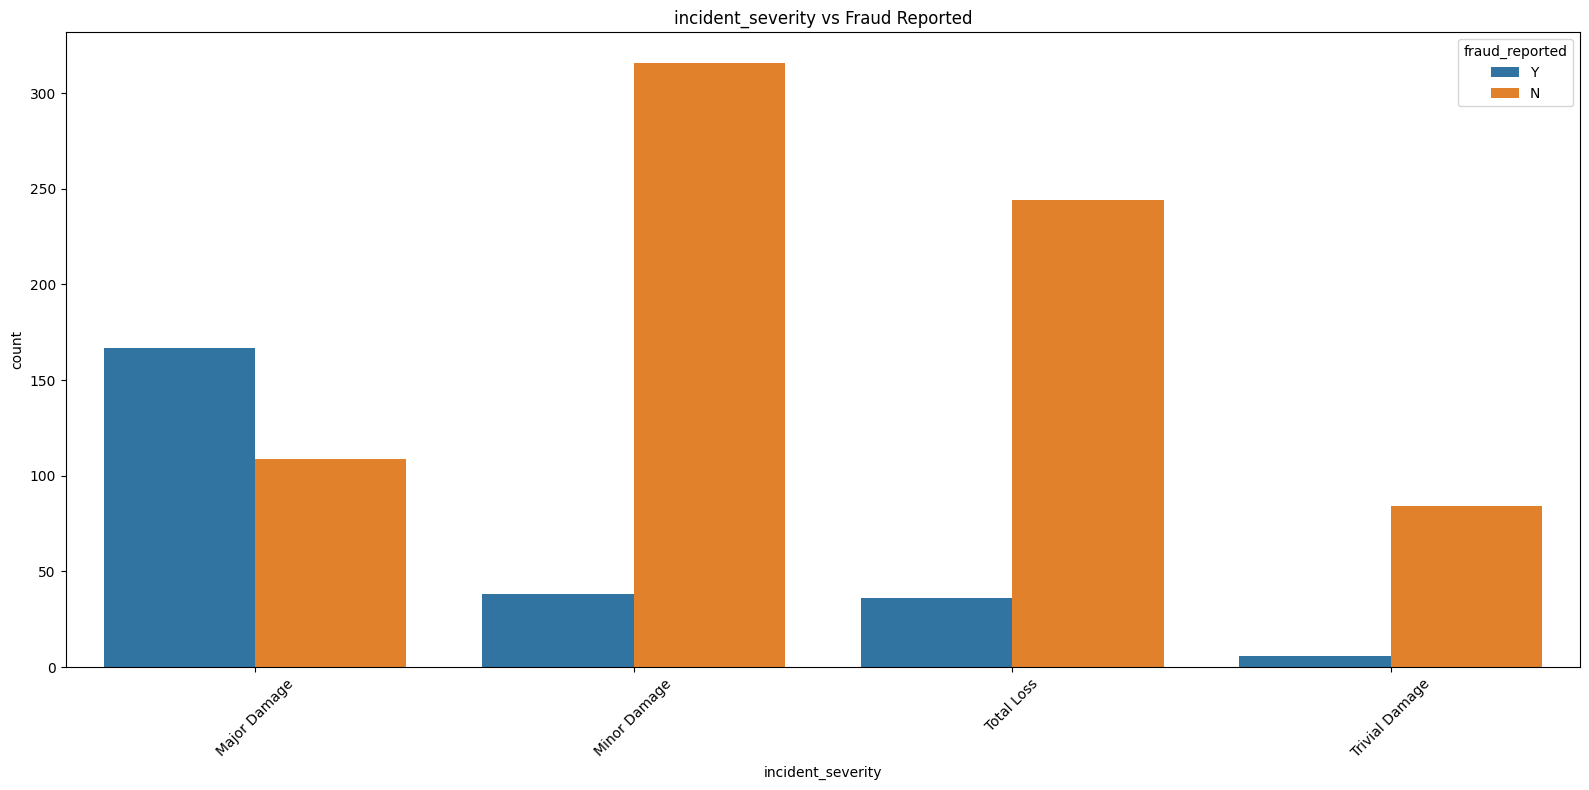

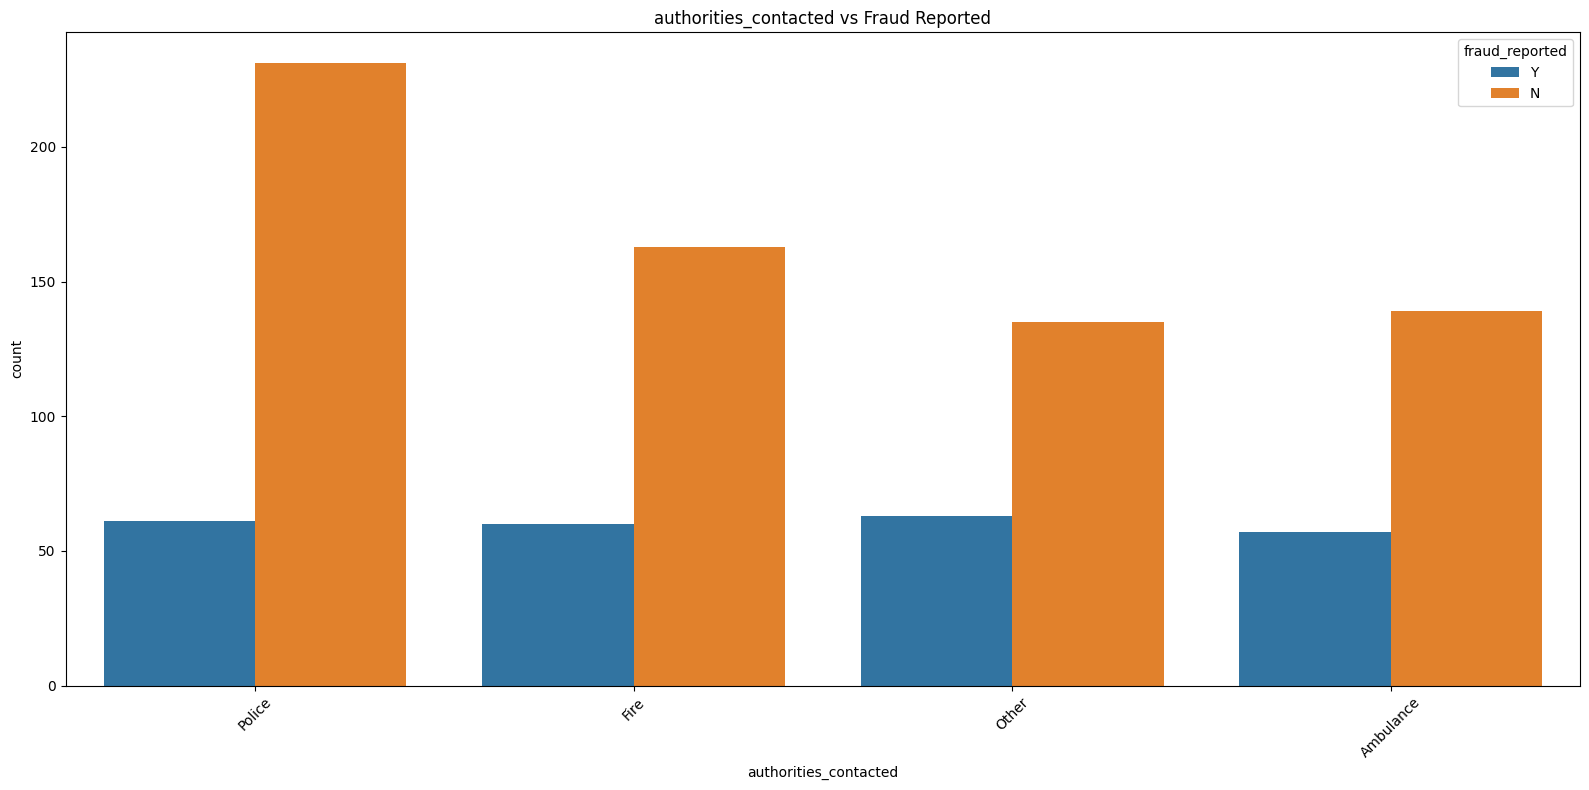

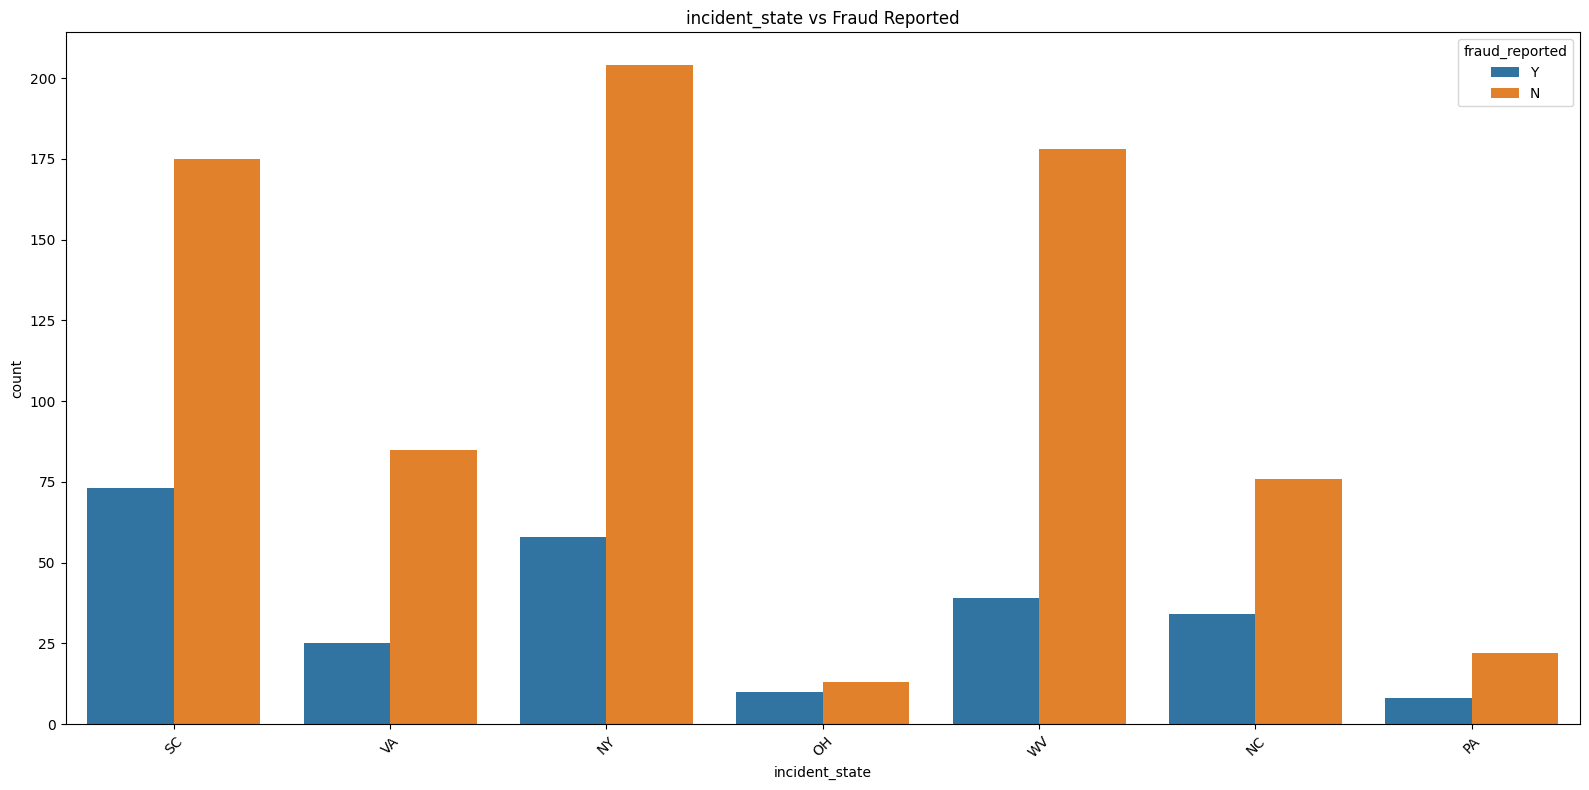

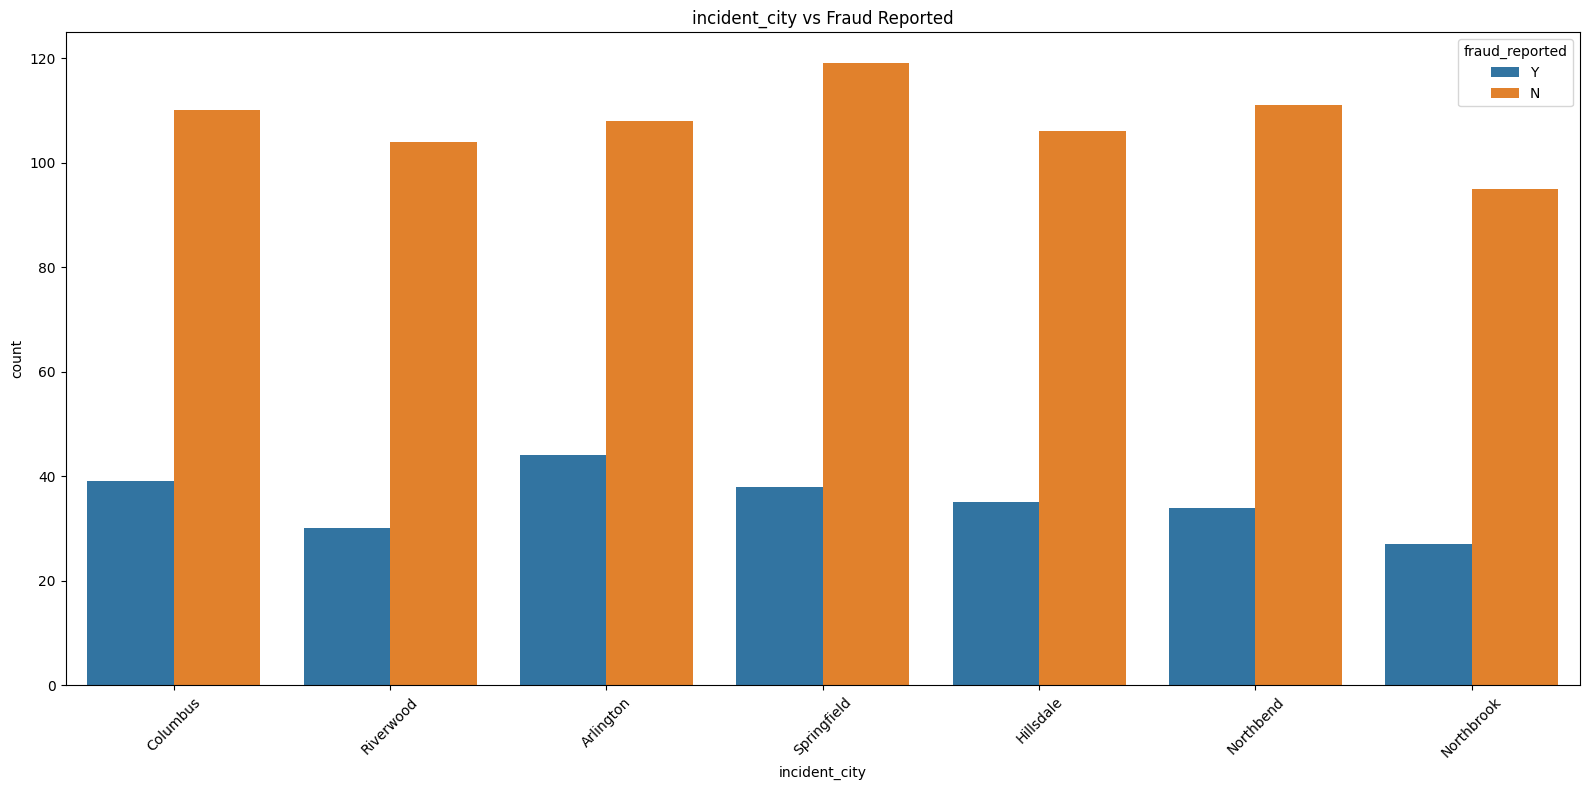

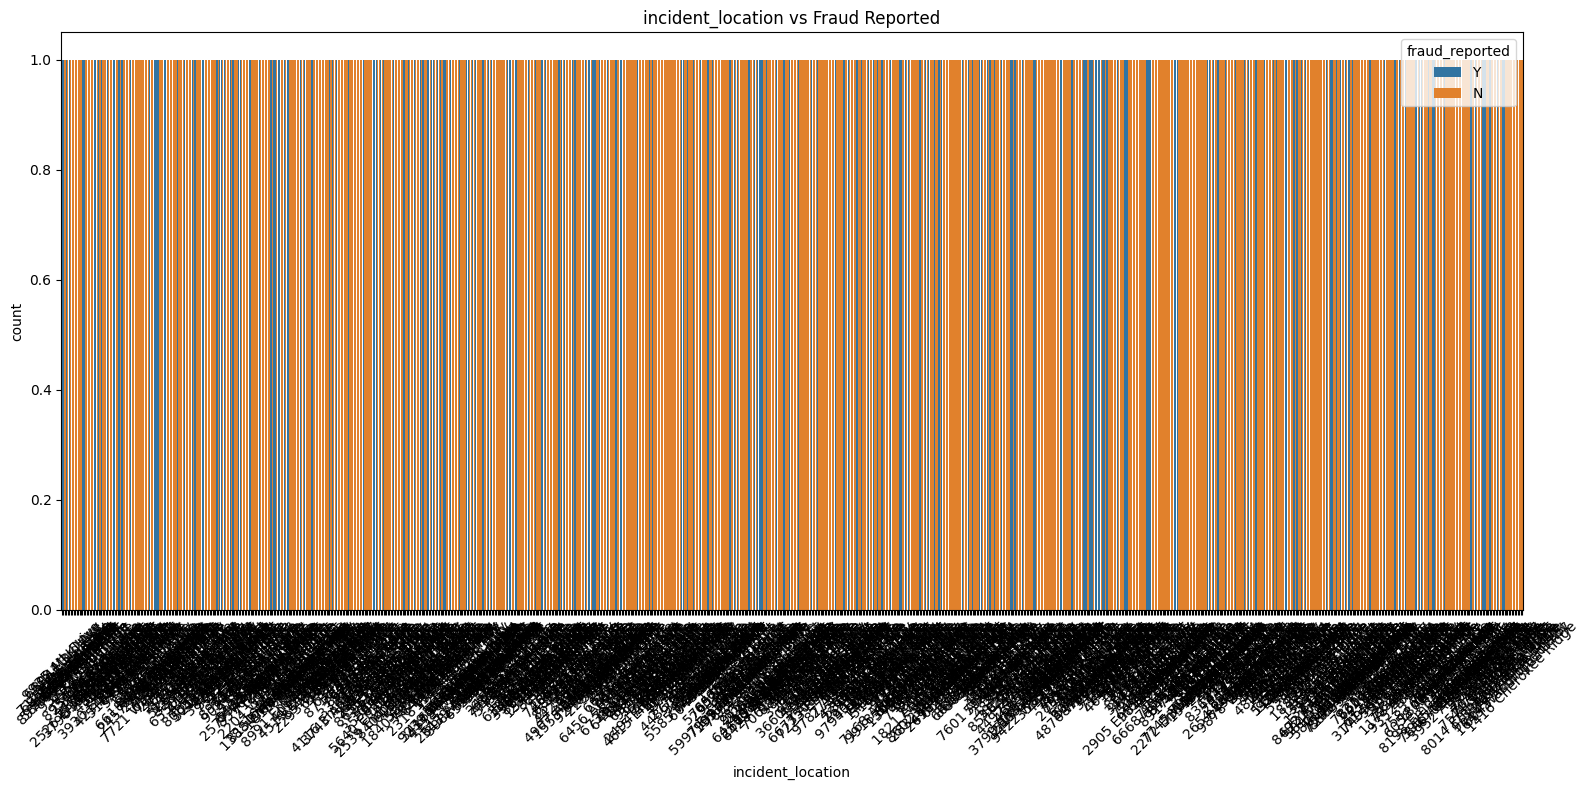

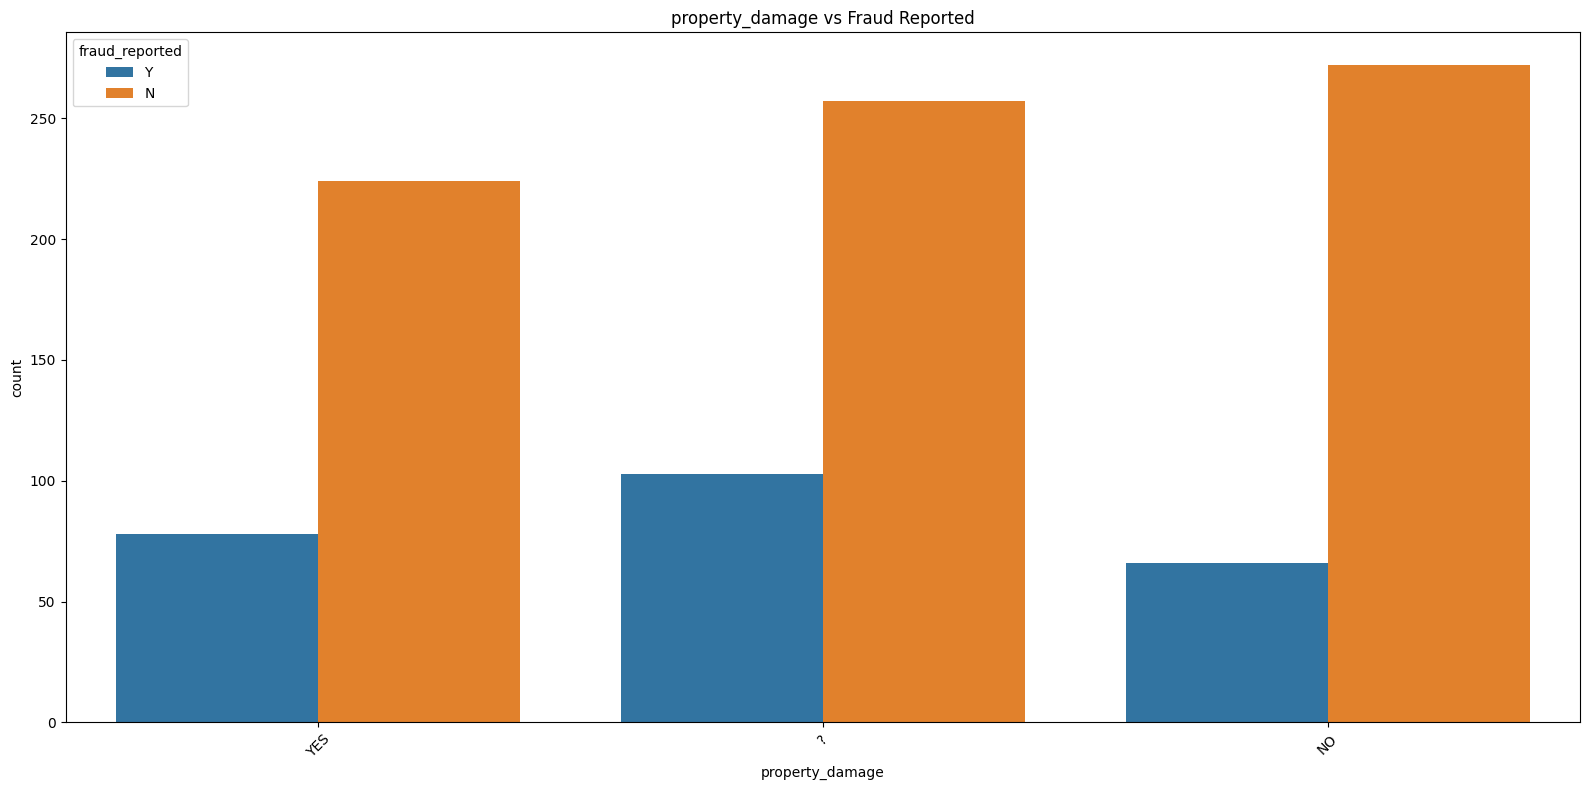

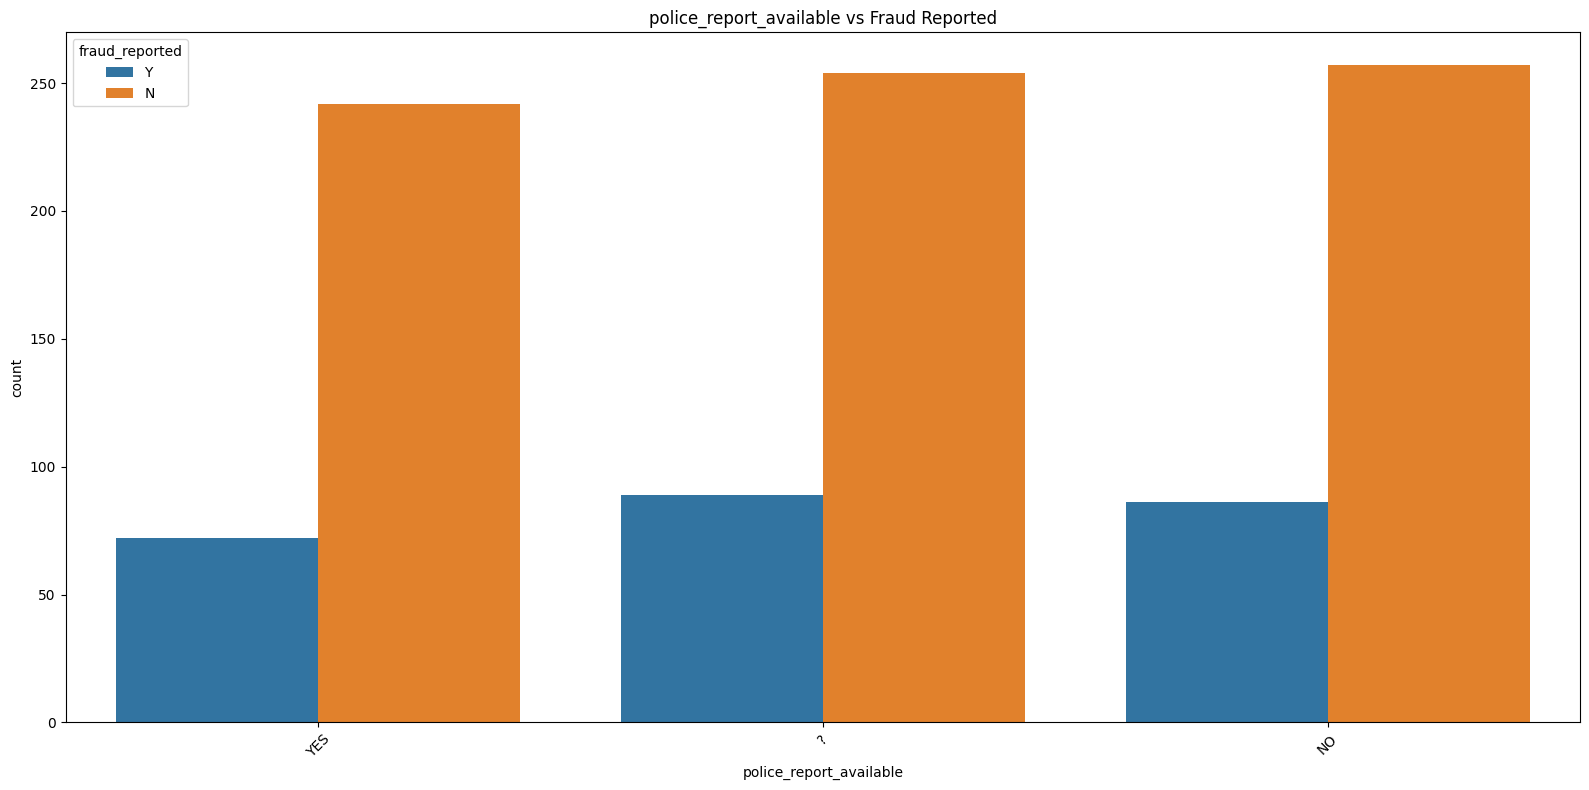

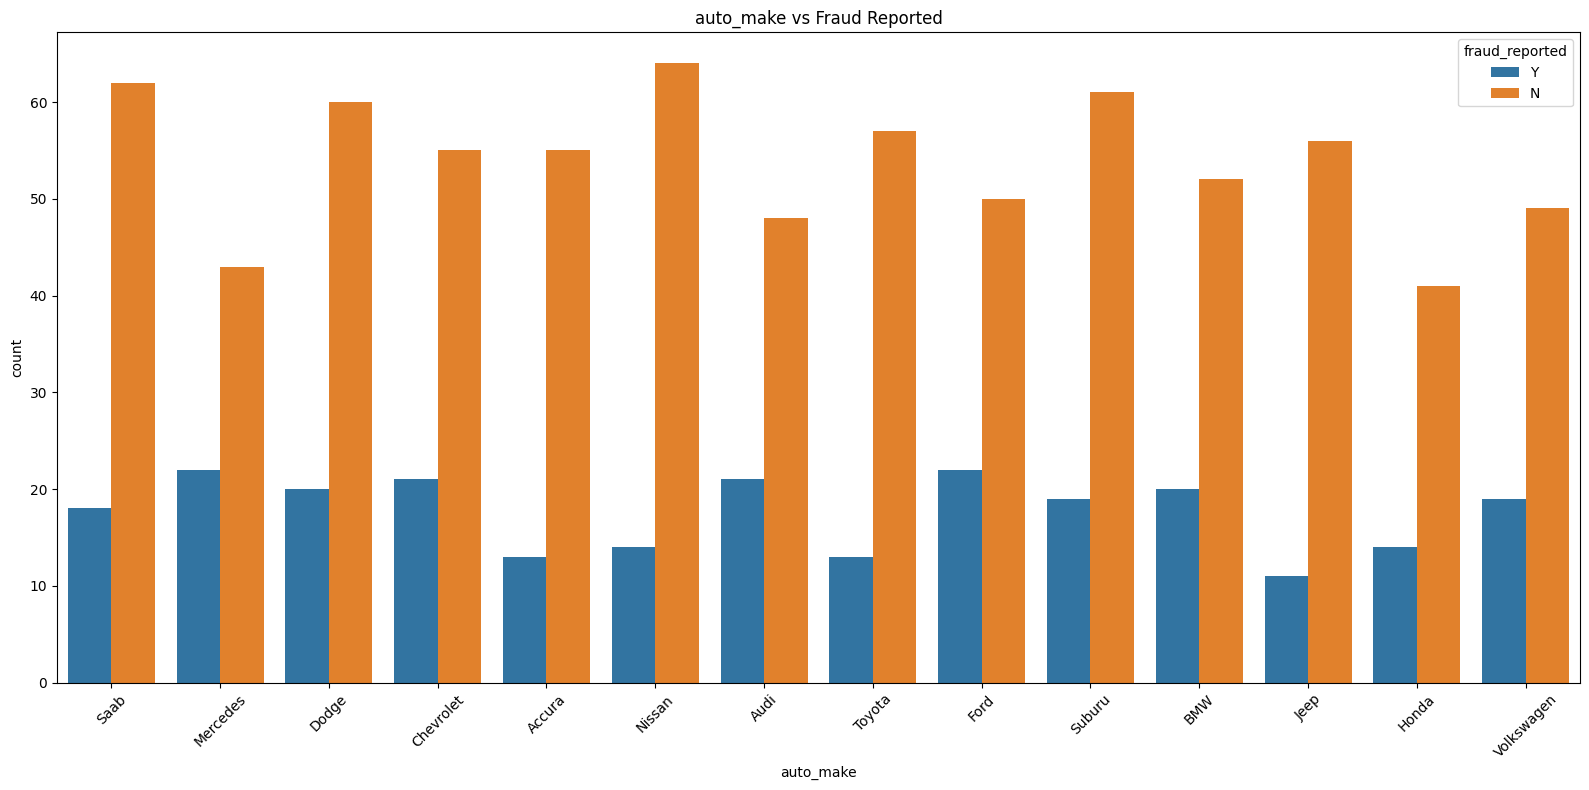

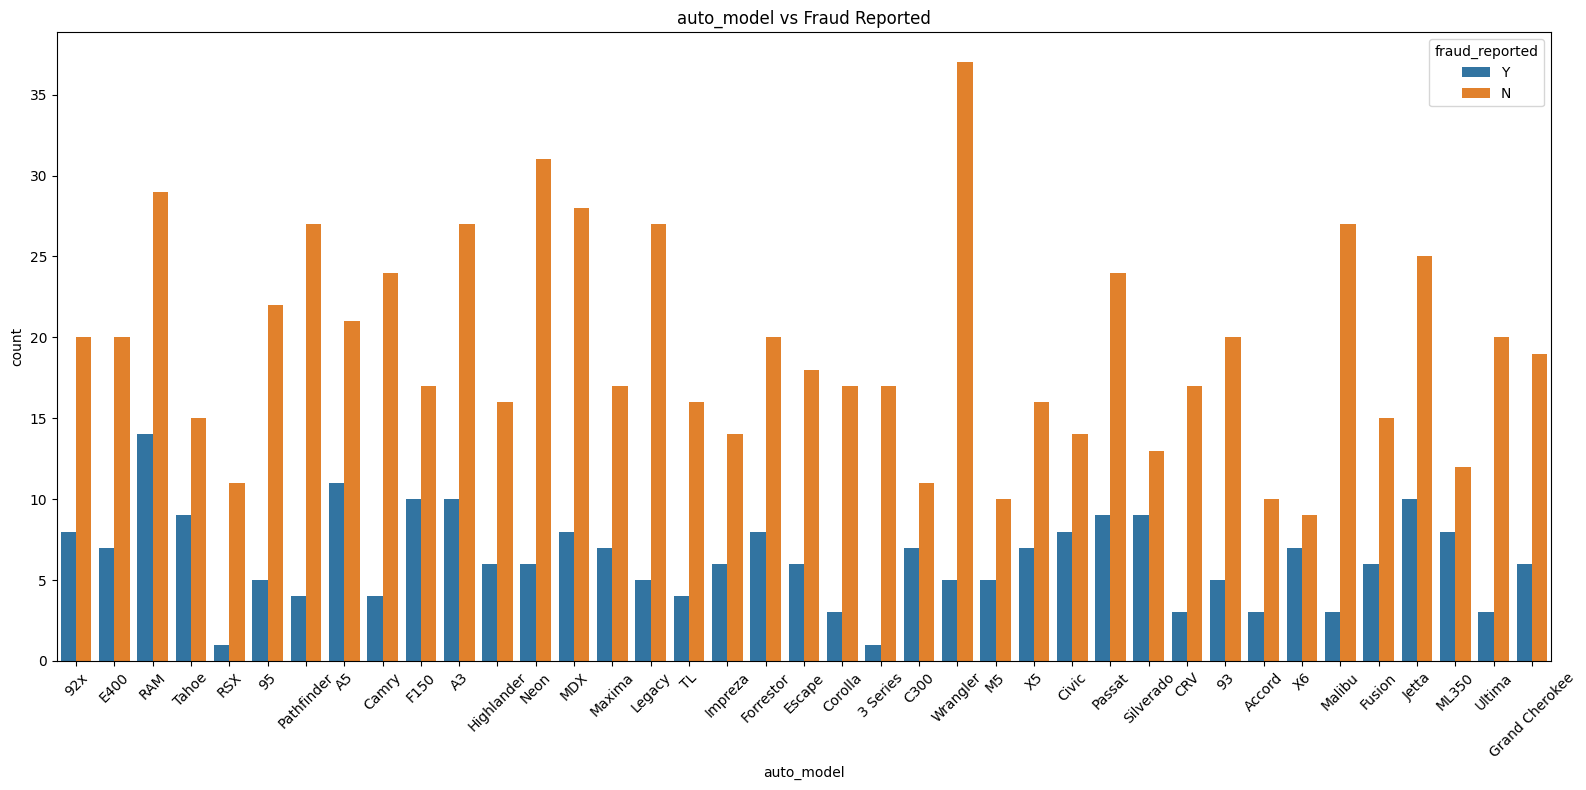

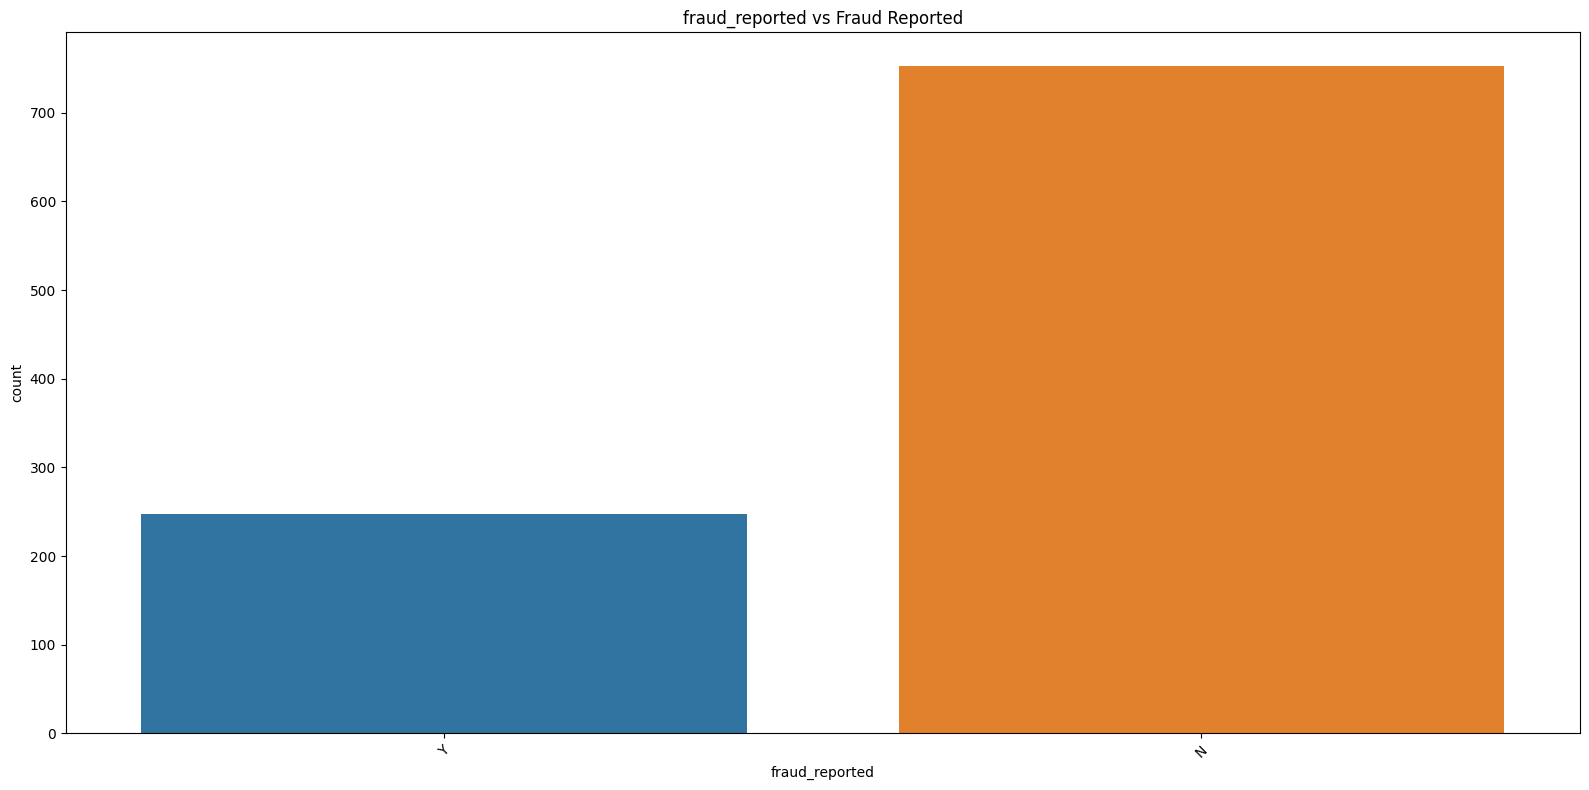

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(16,8))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f"{col} vs Fraud Reported")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Certainly! Here's a concise **bivariate analysis** of each categorical column against the **target variable `fraud_reported`** with focus on statistical interpretation, insights, and business impact:

---

### General Context

* **`fraud_reported`** is a **binary categorical variable** (Yes/No).
* Each plot shows the **distribution of categories within a feature split by fraud occurrence**, helping identify which categories are more associated with fraud.

---

### Bivariate Analysis: Key Points

| Column                    | Type                | Typical Pattern / Insights                                                                                             | Business Impact                                                              |
| ------------------------- | ------------------- | ---------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `policy_state`            | Nominal categorical | Certain states may show higher fraud rates (proportionally more "Yes") due to regulatory or demographic reasons.       | Target fraud prevention in high-risk states; adjust state-level risk models. |
| `policy_csl`              | Ordinal categorical | Higher or lower coverage limits might correlate with fraud likelihood (e.g., low coverage claims may have less fraud). | Refine pricing & underwriting by linking coverage limits with fraud risk.    |
| `insured_sex`             | Nominal categorical | One gender may show slightly higher fraud incidence depending on dataset bias.                                         | Personalize fraud detection rules or alerts by demographic factors.          |
| `insured_education_level` | Ordinal categorical | Lower education levels may associate with higher fraud frequency, indicating socio-economic factors.                   | Socio-economic profiling for fraud risk; tailor education-based outreach.    |
| `insured_occupation`      | Nominal categorical | Certain occupations may have disproportionately higher fraud reports (e.g., high-risk jobs).                           | Occupation-based risk adjustment and fraud detection enhancement.            |
| `insured_hobbies`         | Nominal categorical | Risky hobbies might show more fraud (e.g., extreme sports) or the opposite.                                            | Product customization or additional risk warnings for certain hobbies.       |
| `insured_relationship`    | Nominal categorical | Fraud might be more common in some relationships (e.g., claims filed by non-policyholder relatives).                   | Policy design and claim validation procedures based on relationship.         |
| `incident_type`           | Nominal categorical | Fraud is often higher in certain incident types, such as theft or staged collisions.                                   | Focus fraud investigations on incident types with higher fraud incidence.    |
| `collision_type`          | Nominal categorical | Some collision types may have more fraudulent claims (e.g., rear-end collisions).                                      | Enhanced scrutiny for collision types prone to fraud.                        |
| `incident_severity`       | Ordinal categorical | Minor incidents might have more fraudulent claims, or the opposite if fraudsters inflate severity.                     | Use severity level in fraud scoring and claim reserve adjustment.            |
| `authorities_contacted`   | Nominal categorical | Fraud reported more often when authorities are *not* contacted, or sometimes when reports seem fabricated.             | Validate claims based on authority involvement for fraud flagging.           |
| `incident_state`          | Nominal categorical | Similar to `policy_state`, geographic differences in fraud prevalence.                                                 | Regional fraud monitoring and policy adjustments.                            |
| `incident_city`           | Nominal categorical | Urban vs rural or specific cities may show different fraud rates.                                                      | Geo-targeted fraud controls and regional underwriting policies.              |
| `incident_location`       | Nominal categorical | Certain locations (e.g., parking lots) may show higher fraud rates.                                                    | Location-based risk models and fraud detection rules.                        |
| `property_damage`         | Binary categorical  | Claims without property damage may have higher fraud likelihood (e.g., staged injuries).                               | Flagging claims without property damage for detailed review.                 |
| `police_report_available` | Binary categorical  | Absence of a police report strongly correlates with fraud cases.                                                       | Use police report availability as a key fraud detection feature.             |
| `auto_make`               | Nominal categorical | Certain vehicle makes are involved more in fraudulent claims, either due to popularity or targeted theft.              | Vehicle-specific fraud risk adjustment and premium setting.                  |
| `auto_model`              | Nominal categorical | Specific models may show higher fraud incidence.                                                                       | Targeted fraud prevention for high-risk models.                              |

---

### Distribution & Statistical Notes

* **Imbalanced Fraud Classes:** Generally, "No" fraud is dominant; important to focus on relative proportions rather than absolute counts.
* **Category-specific Fraud Rates:** Categories with disproportionately higher *fraud\_yes / total* ratios indicate risk factors.
* **Patterns:** E.g., lower police report availability, certain incident types, and specific locations consistently associate with higher fraud rates.
* **Ordinal variables** can be checked for trends: e.g., fraud might decrease or increase with education or severity levels.

---

### Business Impact Summary

* **Fraud Prevention:** Identifying categories with higher fraud ratios helps prioritize investigations, improve fraud detection models, and reduce losses.
* **Underwriting & Pricing:** Riskier categories (geographies, vehicle types, coverage limits) can be used for premium adjustment.
* **Claims Management:** Tailor claim verification processes based on fraud risk profiles derived from these bivariate insights.
* **Marketing & Customer Education:** Target high-risk demographics for fraud awareness programs.



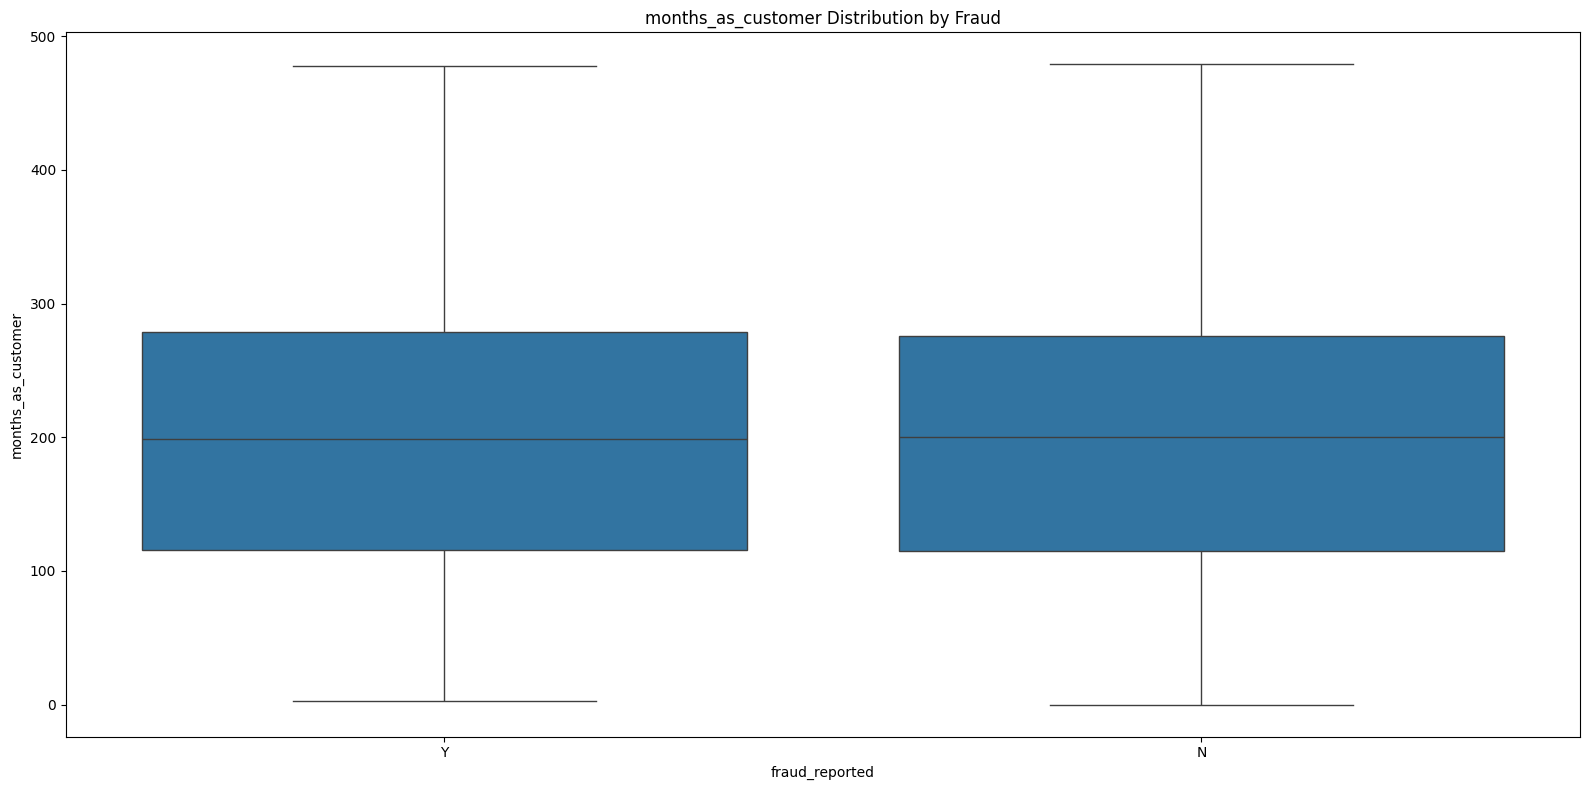

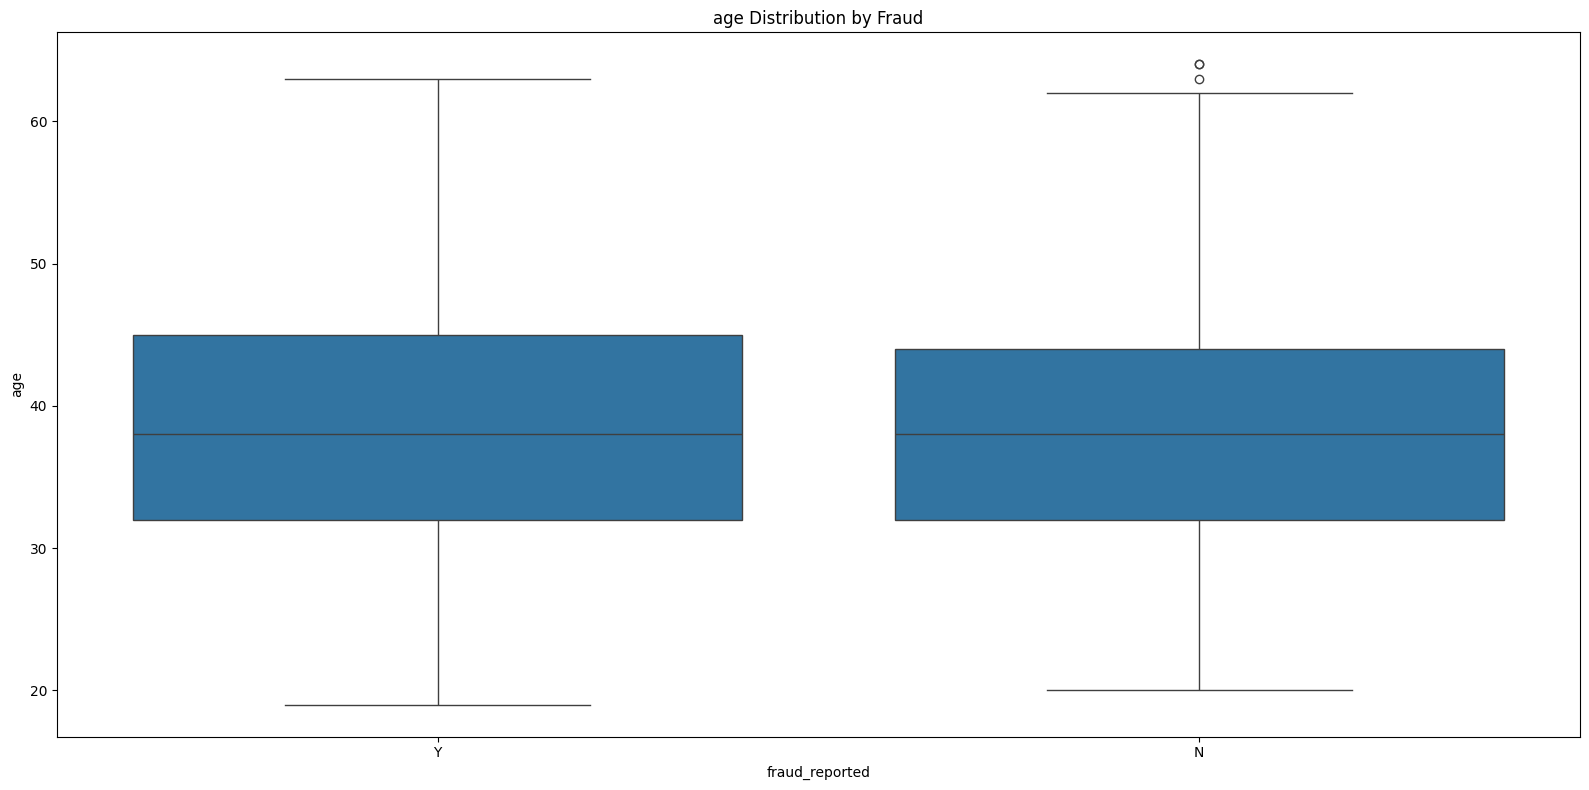

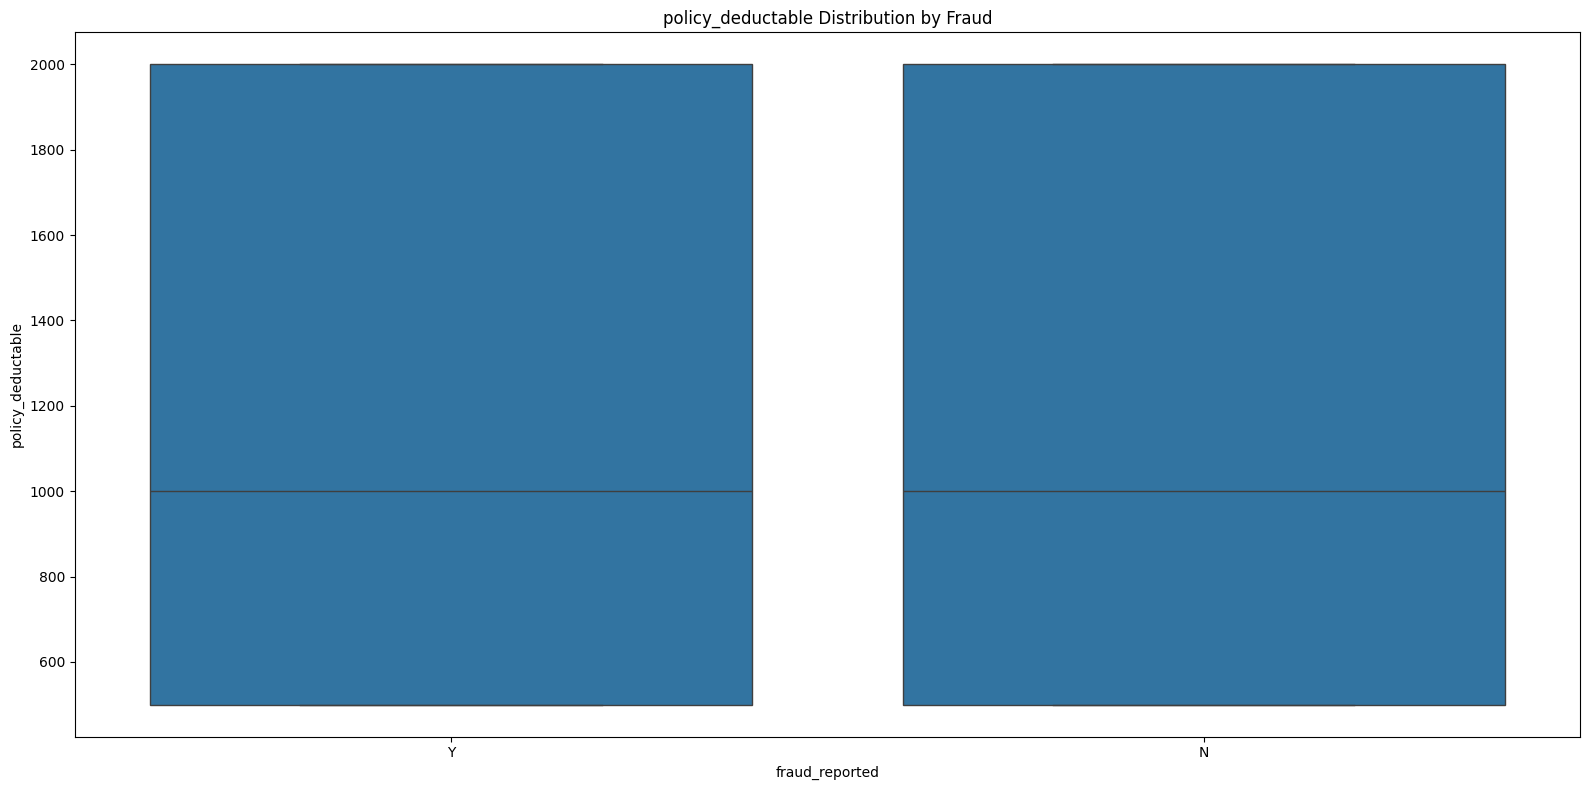

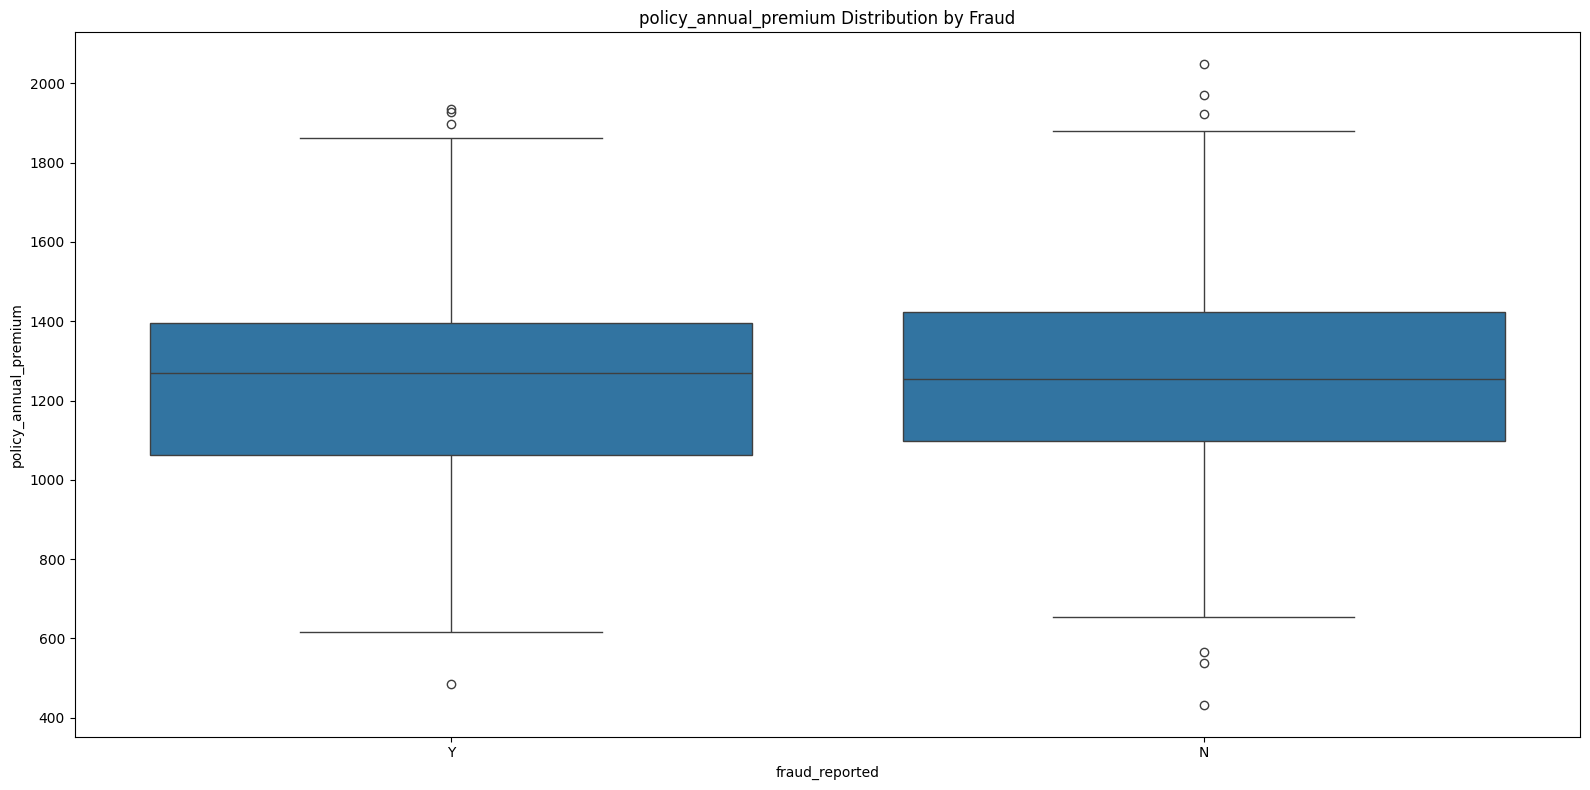

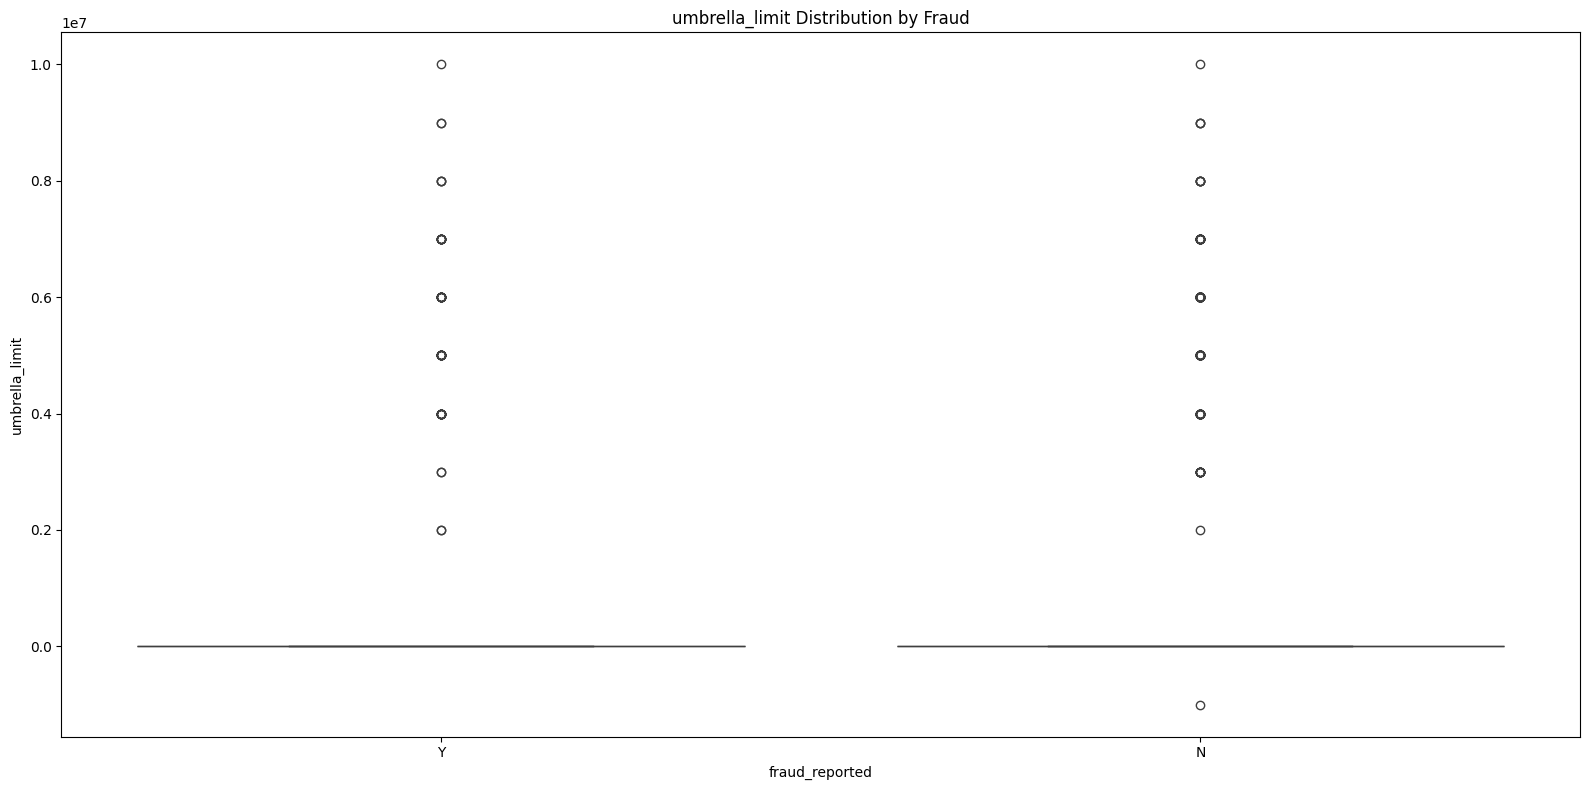

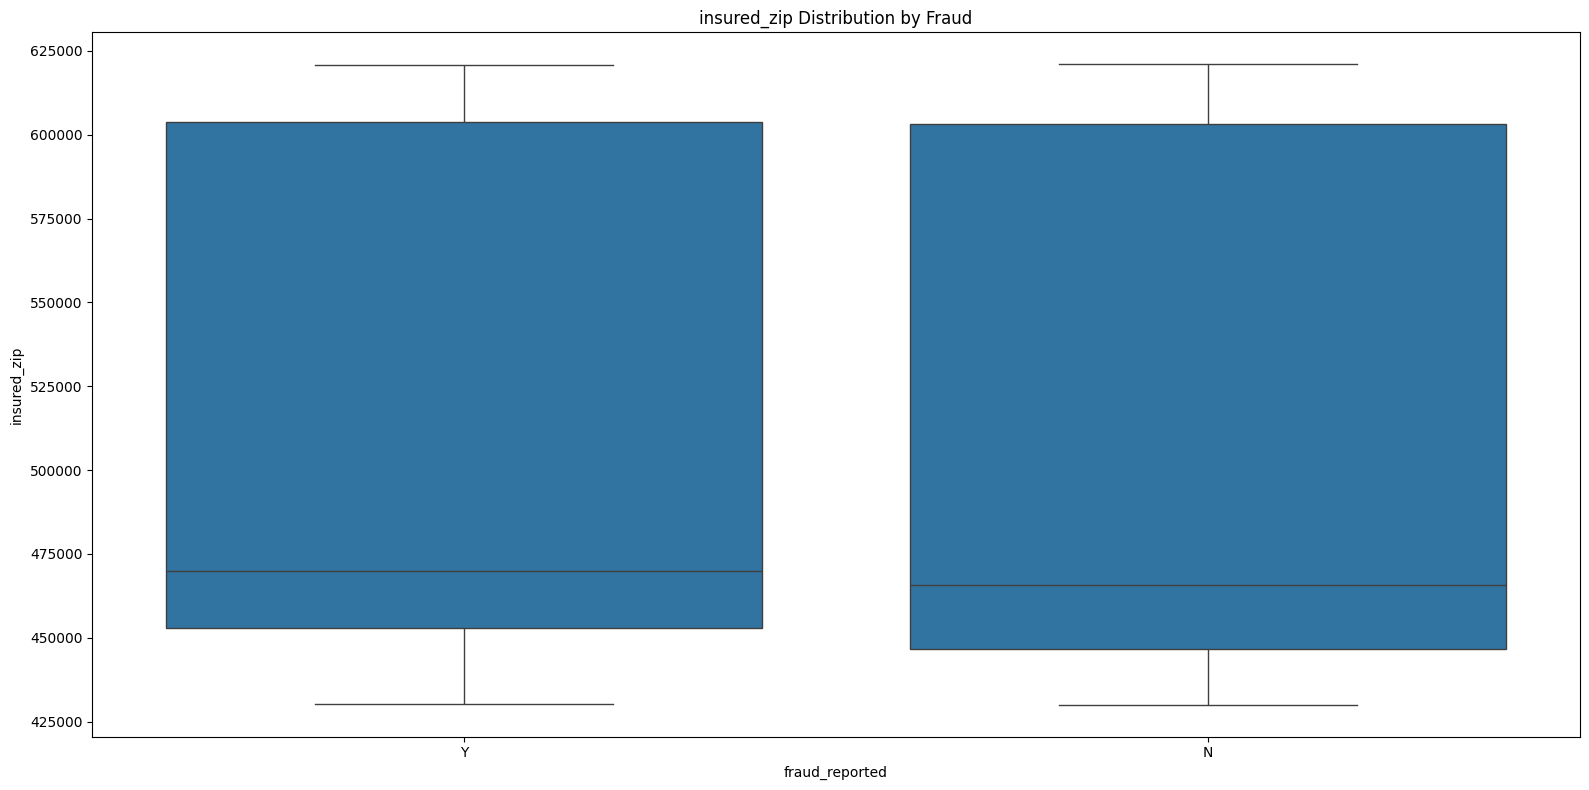

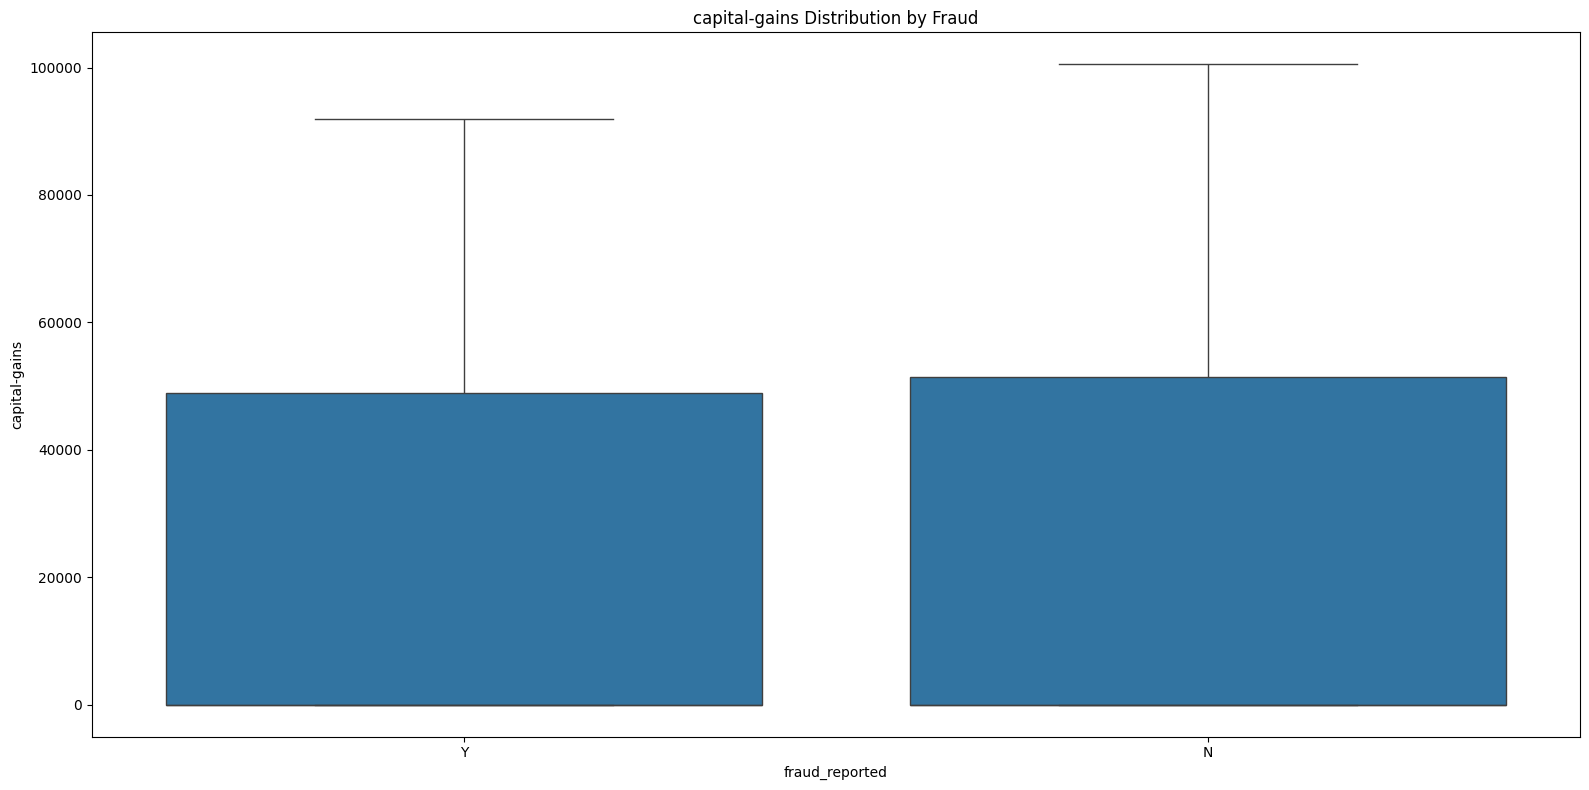

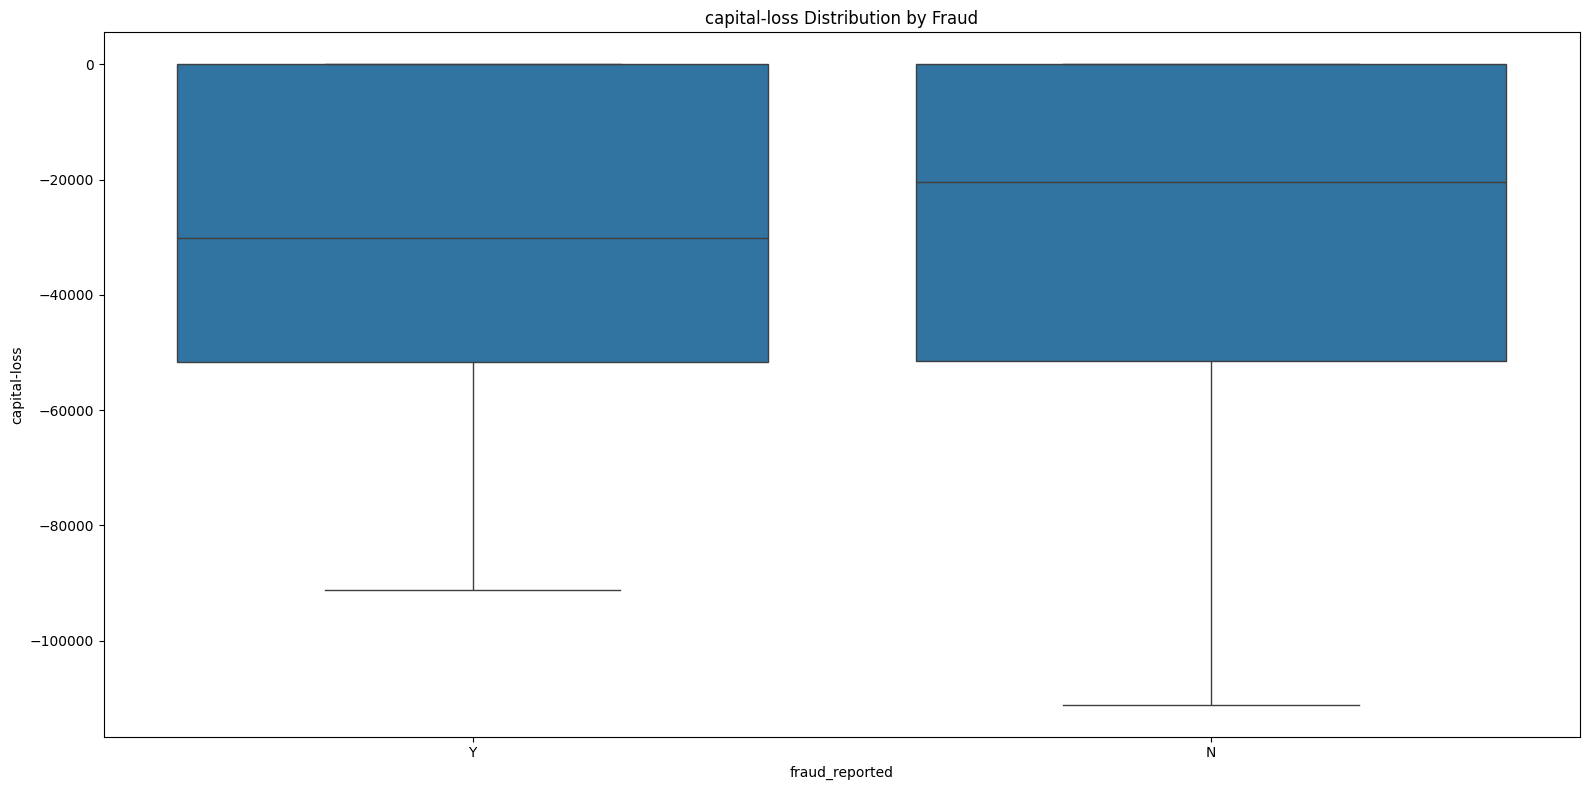

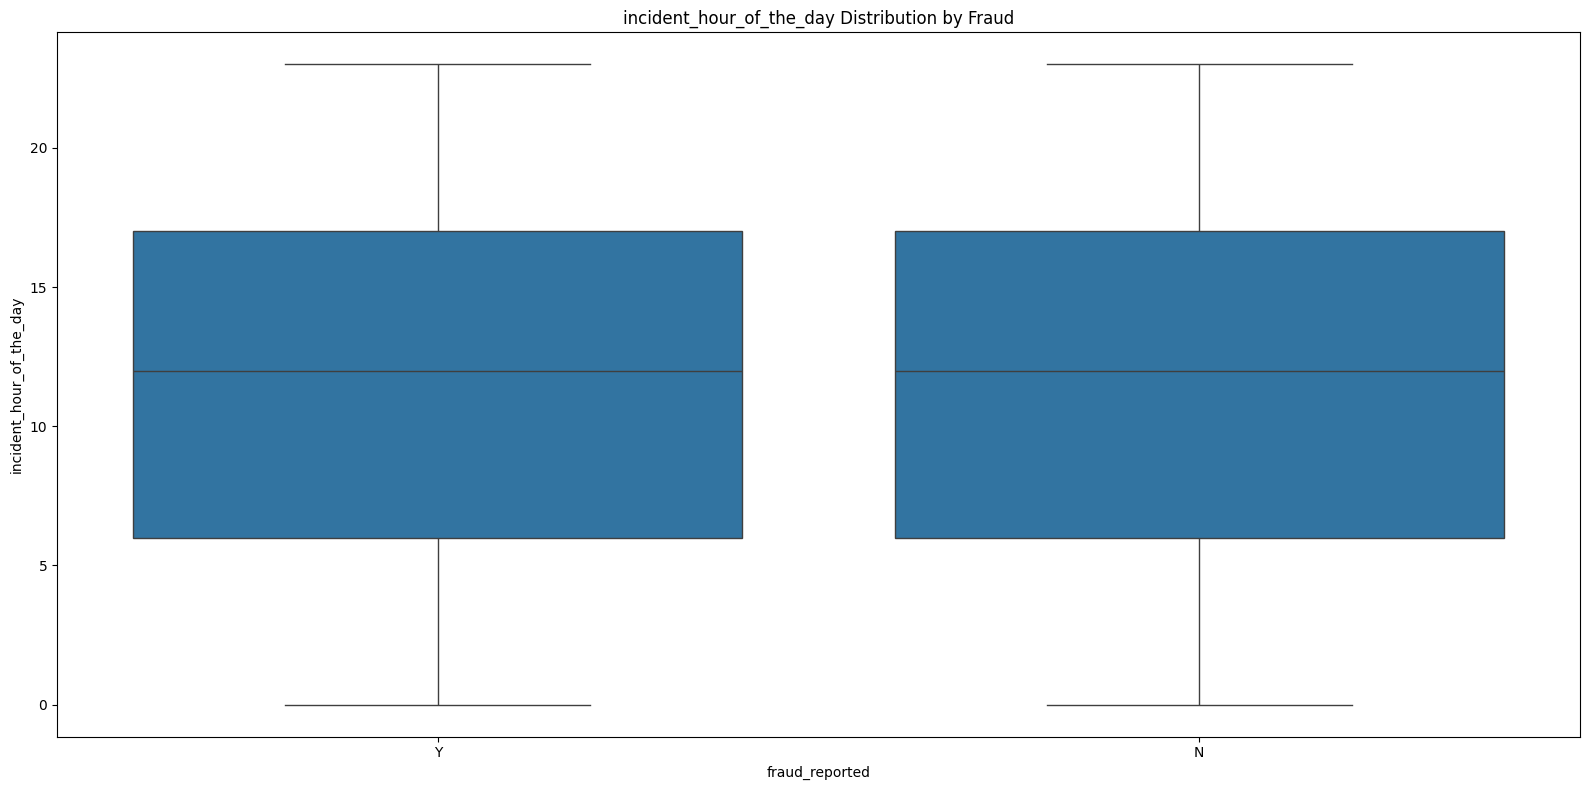

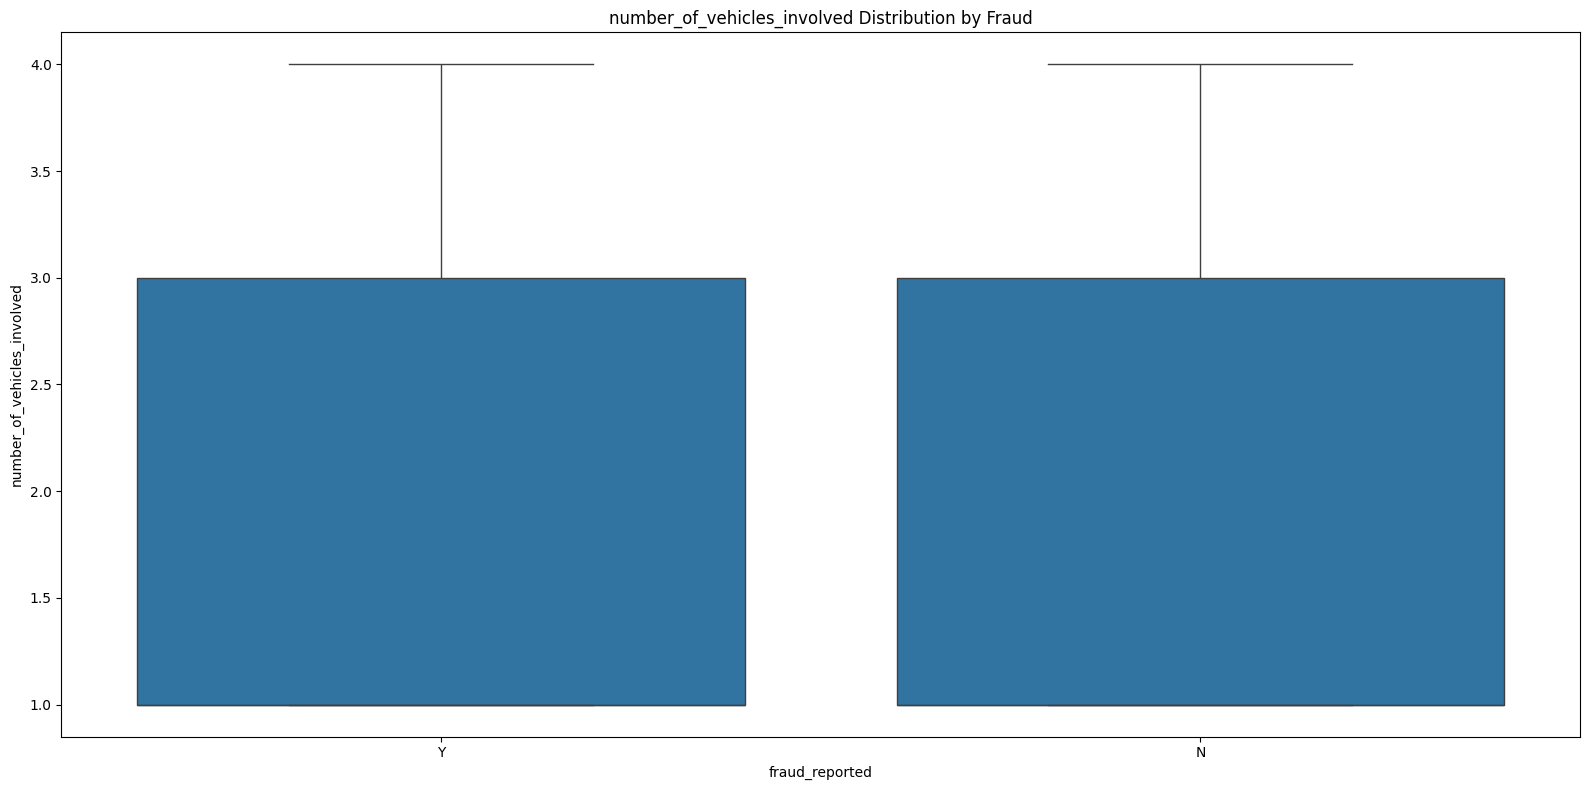

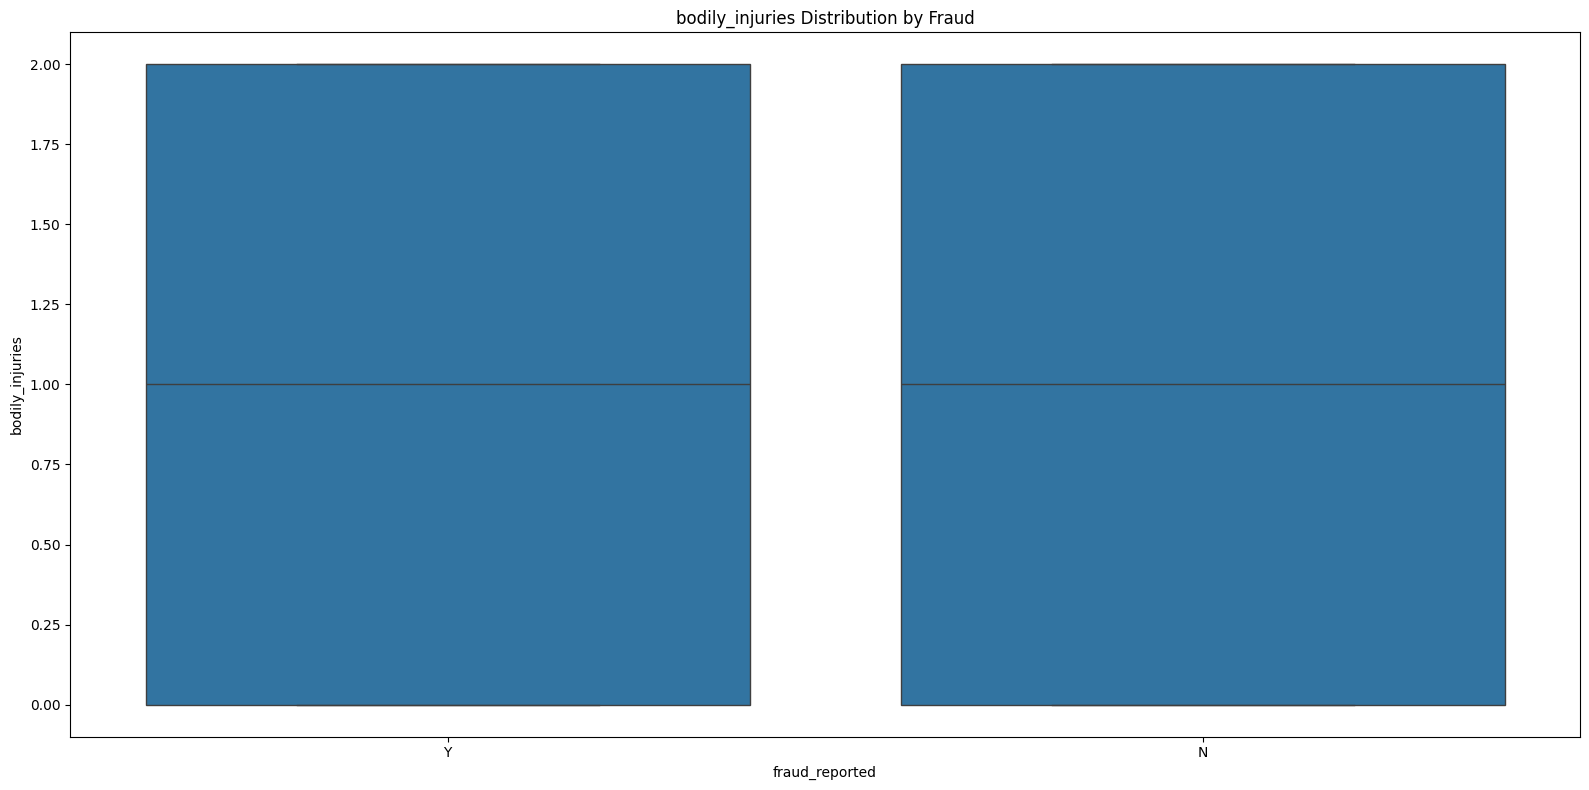

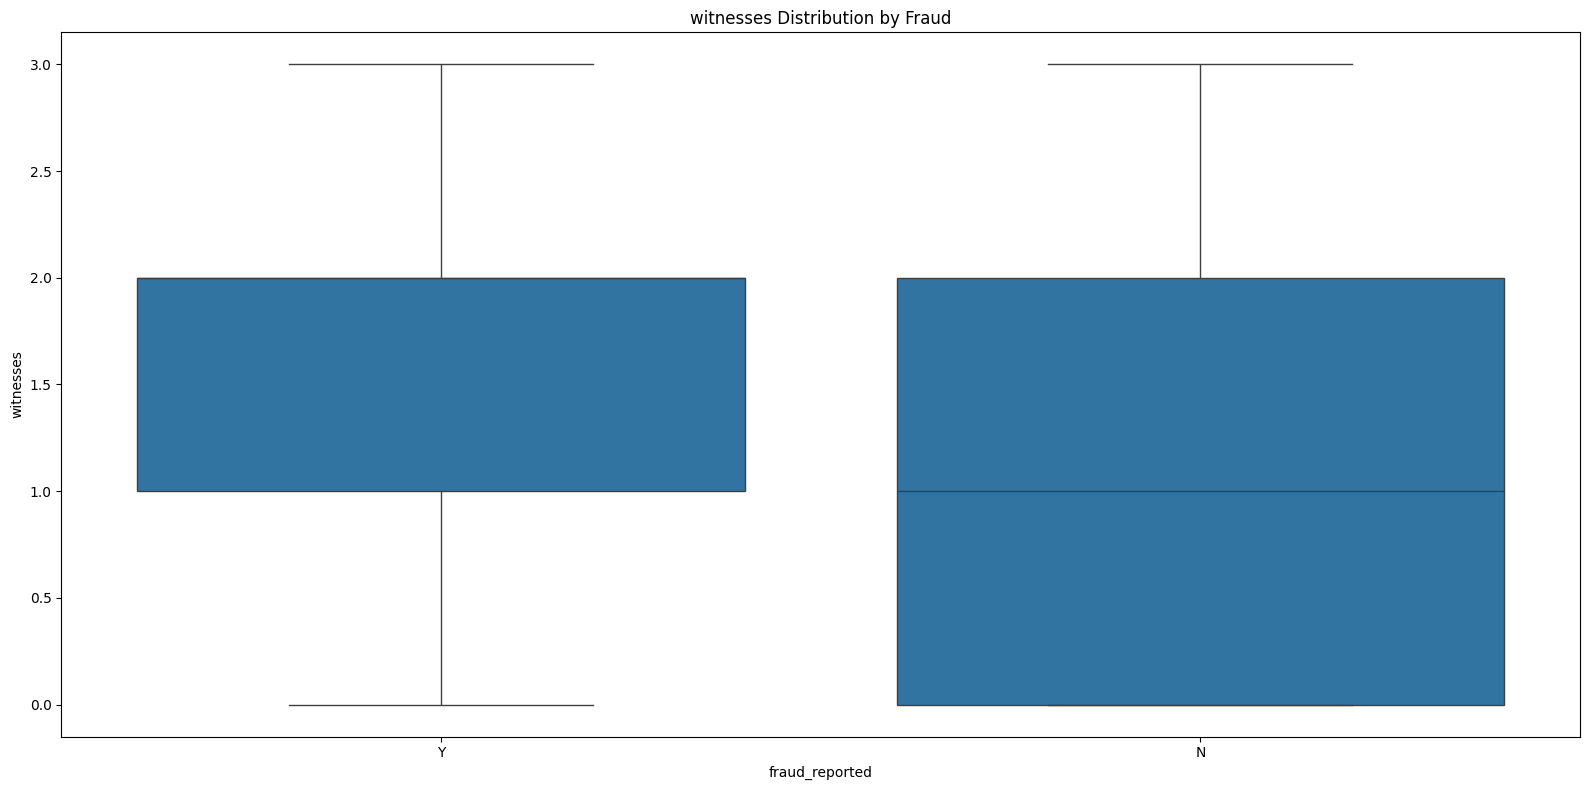

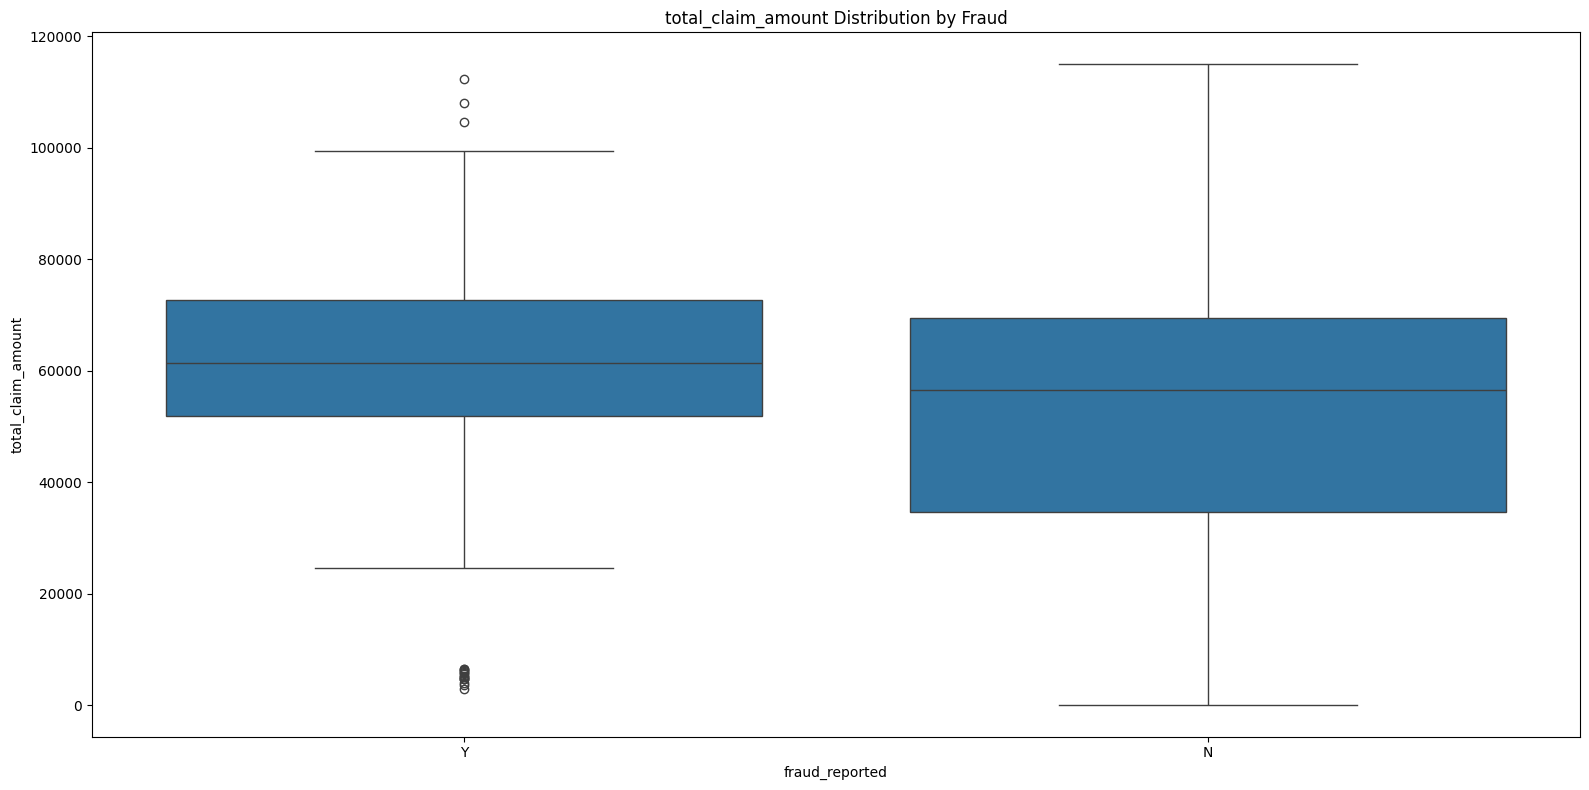

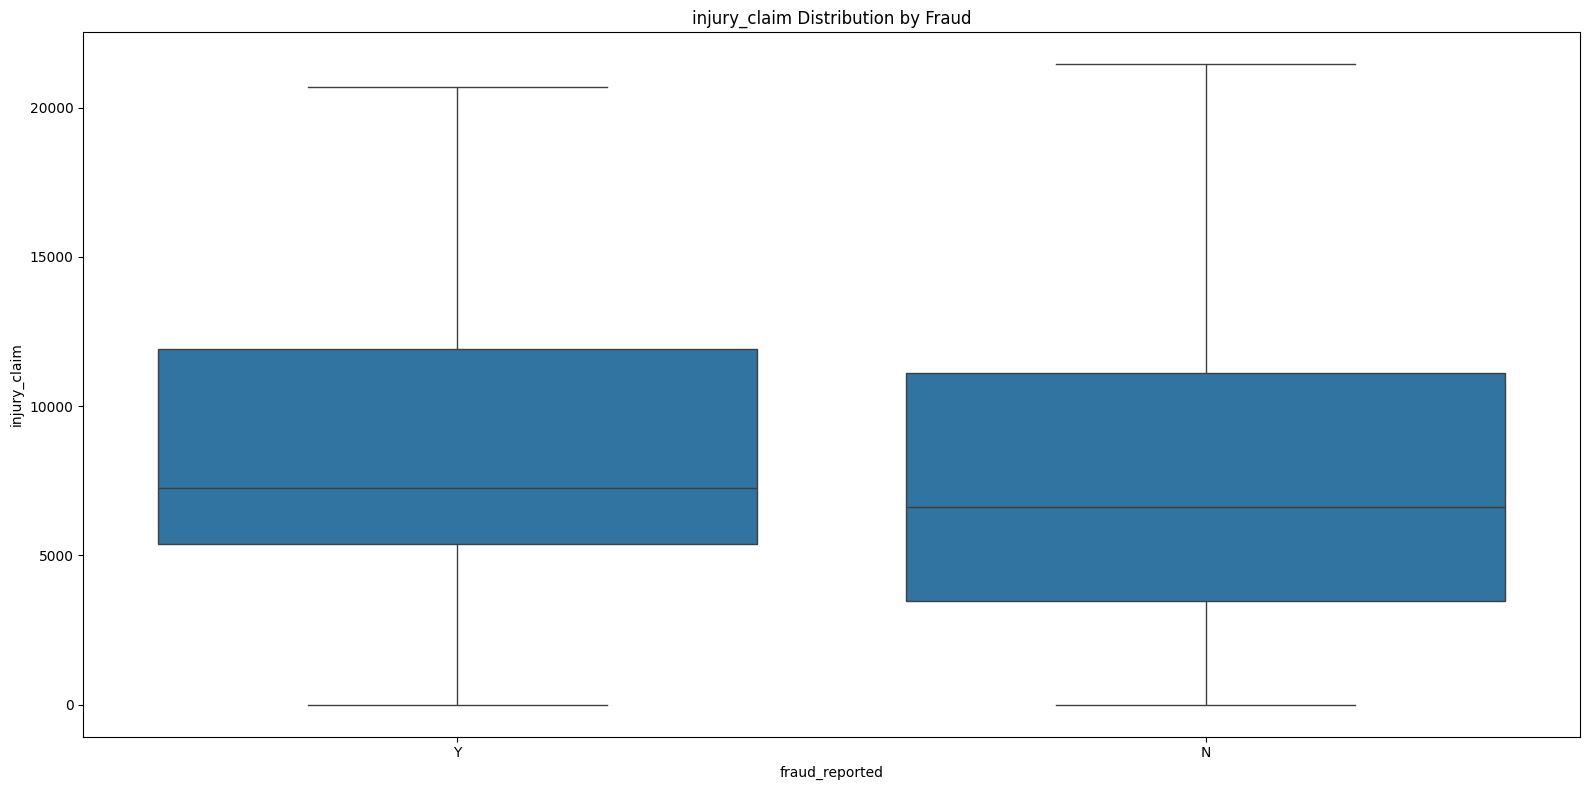

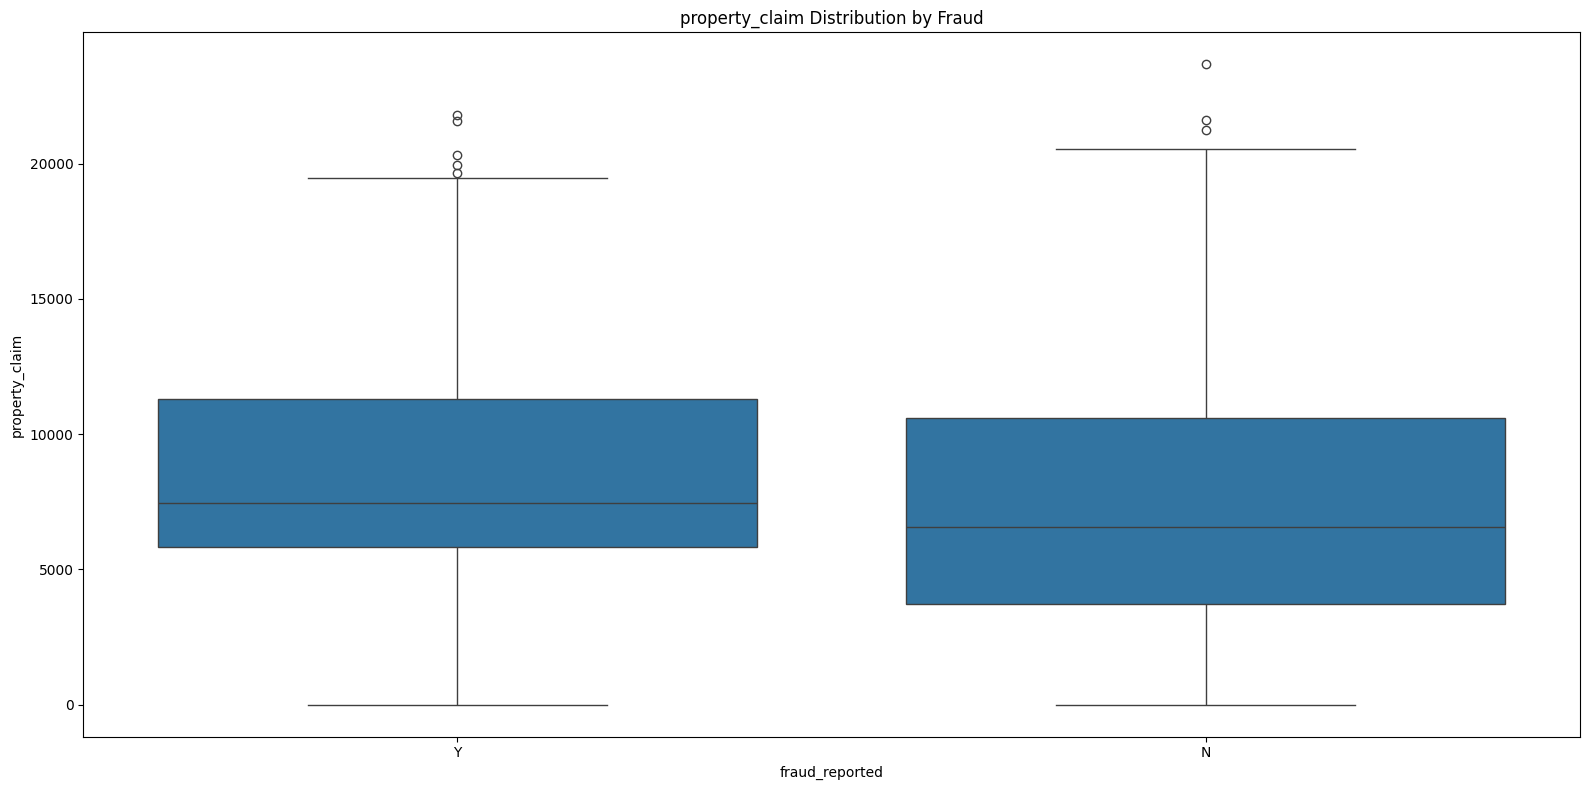

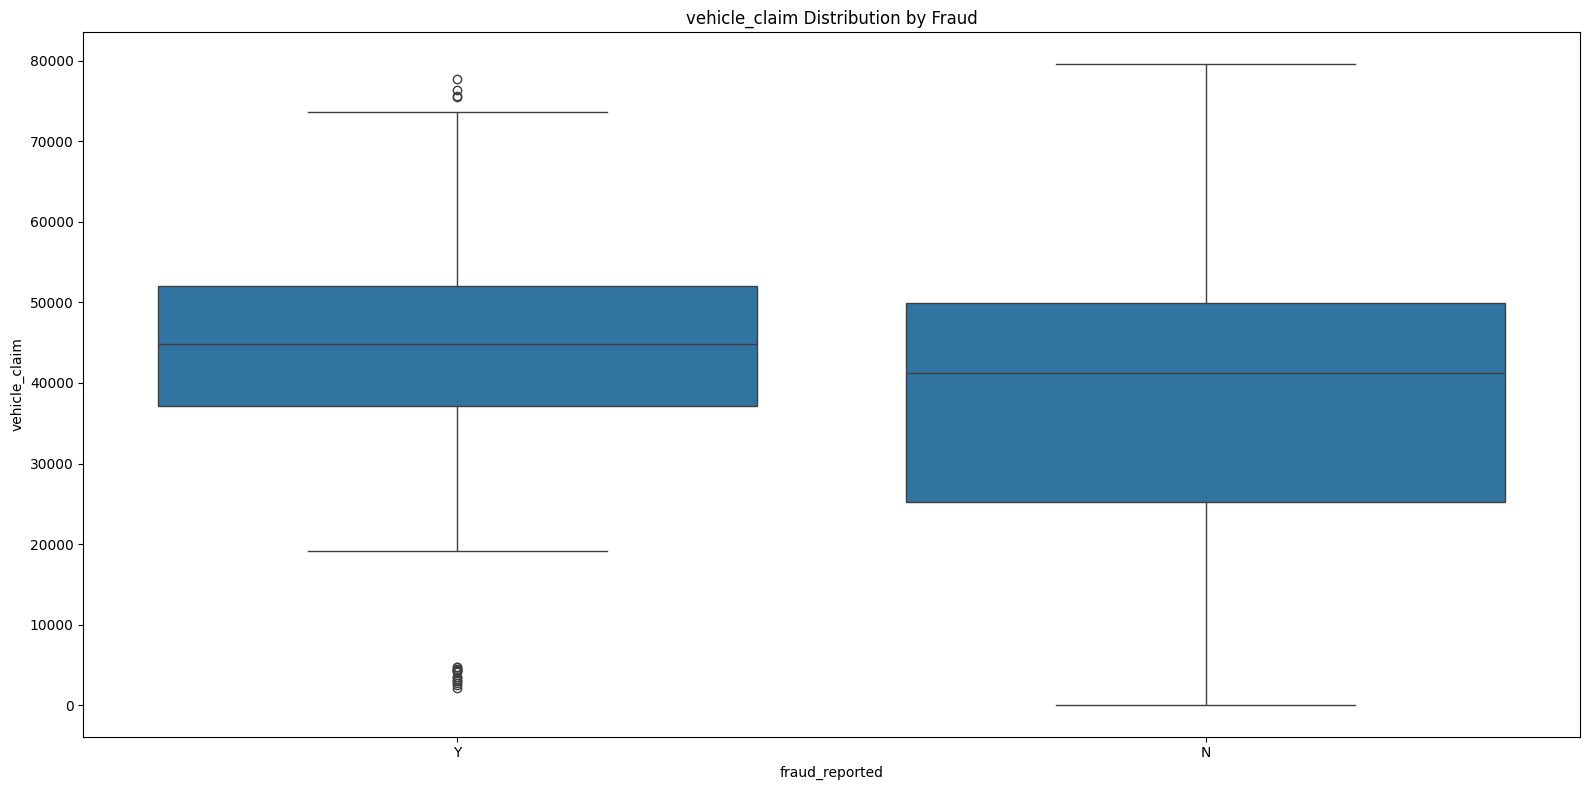

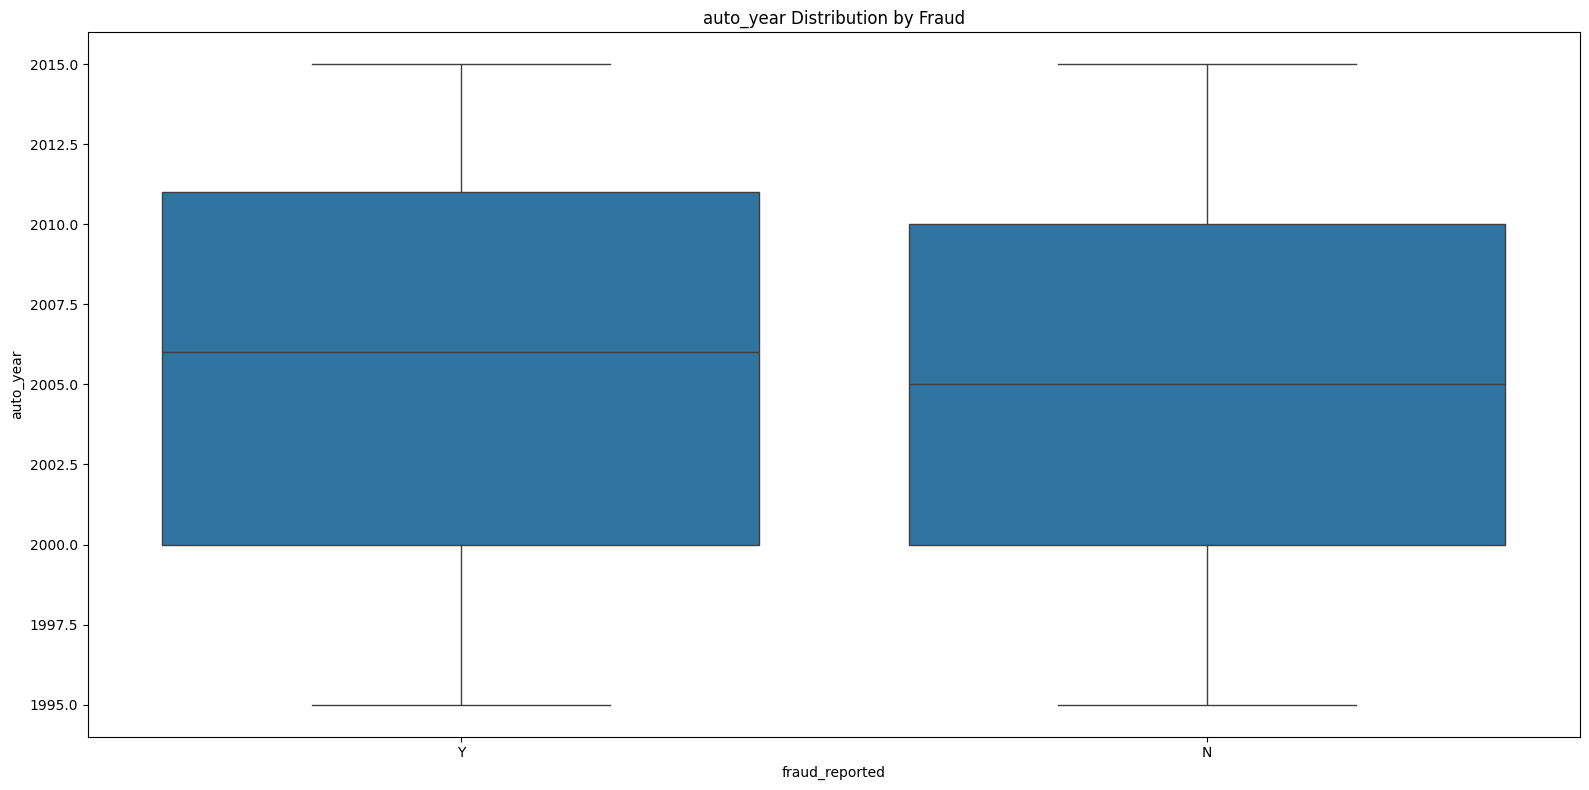

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(x='fraud_reported', y=col, data=df)
    plt.title(f"{col} Distribution by Fraud")
    plt.tight_layout()
    plt.show()

Absolutely! Here’s a concise **univariate statistical analysis** of your listed **numerical columns** with focus on their types, distributions, relationship with fraud, and business impacts:

---

### Overview of Numerical Columns & Data Types

All columns are **numerical** and mostly **continuous** or **count-based**, except `insured_zip` which is categorical coded as numeric (can be treated as categorical/geographic). The distributions will be summarized with central tendency and spread, with focus on differences by fraud status.

---

### Column-wise Analysis

| Column                        | Type                  | Typical Distribution & Insights                                                                                              | Business Impact                                                         |
| ----------------------------- | --------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| `months_as_customer`          | Continuous            | Usually right-skewed; shorter-tenure customers may show more fraud, indicating opportunistic claims soon after policy start. | Flag new customers for closer fraud scrutiny; customer loyalty metrics. |
| `age`                         | Continuous            | Distribution often normal or left-skewed; younger drivers might have higher fraud risk or vice versa depending on data.      | Age-based risk profiling and pricing; fraud risk segmentation.          |
| `policy_deductable`           | Discrete numeric      | Values likely clustered; lower deductibles might have more frequent small fraud claims.                                      | Adjust deductibles to balance risk and fraud incentives.                |
| `policy_annual_premium`       | Continuous            | Right-skewed; higher premiums might correspond to more valuable policies but may also attract fraud.                         | Premium pricing and fraud risk correlation analysis.                    |
| `umbrella_limit`              | Discrete numeric      | Many zeros or specific limits; higher limits may indicate higher risk policies.                                              | Use umbrella limits in fraud risk modeling and underwriting.            |
| `insured_zip`                 | Categorical (numeric) | Geographic clusters; fraud rates may vary by zip code.                                                                       | Geospatial fraud analysis and targeted interventions.                   |
| `capital-gains`               | Continuous            | Mostly zero or low; unusual high gains may signal financial status relevant for fraud risk.                                  | Use financial indicators in fraud risk scoring.                         |
| `capital-loss`                | Continuous            | Similar to capital-gains; mostly zero but could reflect financial distress or motive.                                        | Financial risk indicators for fraud detection.                          |
| `incident_hour_of_the_day`    | Discrete numeric      | Distribution might show peaks during day; fraud could cluster at odd hours (e.g., night).                                    | Temporal fraud patterns to inform investigation timing.                 |
| `number_of_vehicles_involved` | Discrete numeric      | Usually 1 or 2; more vehicles might complicate claims or increase fraud opportunity.                                         | Complexity of claims and fraud risk assessment.                         |
| `bodily_injuries`             | Discrete numeric      | Count data; zero or low counts common; inflated injury counts could indicate fraud.                                          | Injury claim validation and fraud flagging.                             |
| `witnesses`                   | Discrete numeric      | Count data; no witnesses or inconsistent numbers may correlate with fraud.                                                   | Witness presence as fraud validation factor.                            |
| `total_claim_amount`          | Continuous            | Right-skewed; higher amounts often show more fraud risk due to incentive size.                                               | Key feature for fraud risk and claim reserve management.                |
| `injury_claim`                | Continuous            | Skewed; zero or small amounts common; large or unusual amounts suspicious.                                                   | Injury claim monitoring for fraud detection.                            |
| `property_claim`              | Continuous            | Skewed distribution; zero-inflated; large claims may be fraud targets.                                                       | Property claim scrutiny and risk segmentation.                          |
| `vehicle_claim`               | Continuous            | Skewed; similar to property claim with possible fraud in inflated vehicle damage.                                            | Vehicle damage assessment and fraud detection.                          |
| `auto_year`                   | Discrete numeric      | Age of vehicle; older cars might have fewer claims or lower fraud; newer cars may attract fraud on high-value vehicles.      | Vehicle age influences risk pricing and fraud likelihood.               |

---

### Distribution & Statistical Insights


* **Boxplot Comparison:** For each variable, median and interquartile range often differ between `fraud_reported=Yes` and `No`.

  * Fraud cases often have **higher medians or wider ranges** in claim amounts, bodily injuries, and months as customer.
  * Some features like `age` or `incident_hour_of_the_day` may show distinct distributions for fraud vs non-fraud.
* **Outliers:** Large claim amounts or unusual counts could be potential fraud signals.
* **Discrete Counts:** Variables like number of vehicles, witnesses, or injuries help distinguish complex claims with different fraud risk.

---

### Business Impacts

* **Fraud Detection:** Numerical features like claim amounts, injuries, and customer tenure are crucial predictors in fraud models.
* **Risk Pricing:** Variables such as policy premiums, deductible, and vehicle age guide underwriting and pricing strategies.
* **Claims Management:** Understanding typical ranges and anomalies helps in setting thresholds for manual reviews.
* **Customer Segmentation:** Age and tenure data help segment customers by risk and fraud propensity.
* **Temporal & Geographic Insights:** Incident hour and zip code enable targeted investigation timing and location-based fraud controls.



In [23]:
df.groupby('fraud_reported').mean(numeric_only=True)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
fraud_reported,,,,,,,,,,,,,,,,,
N,202.600266,38.884462,1130.810093,1258.430000,1.023904e+06,500419.537849,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697
Y,208.080972,39.141700,1151.821862,1250.236275,1.336032e+06,503637.959514,24193.522267,-27522.672065,11.696356,1.931174,1.040486,1.582996,60302.105263,8208.340081,8560.121457,43533.643725,2005.186235


# Correlations

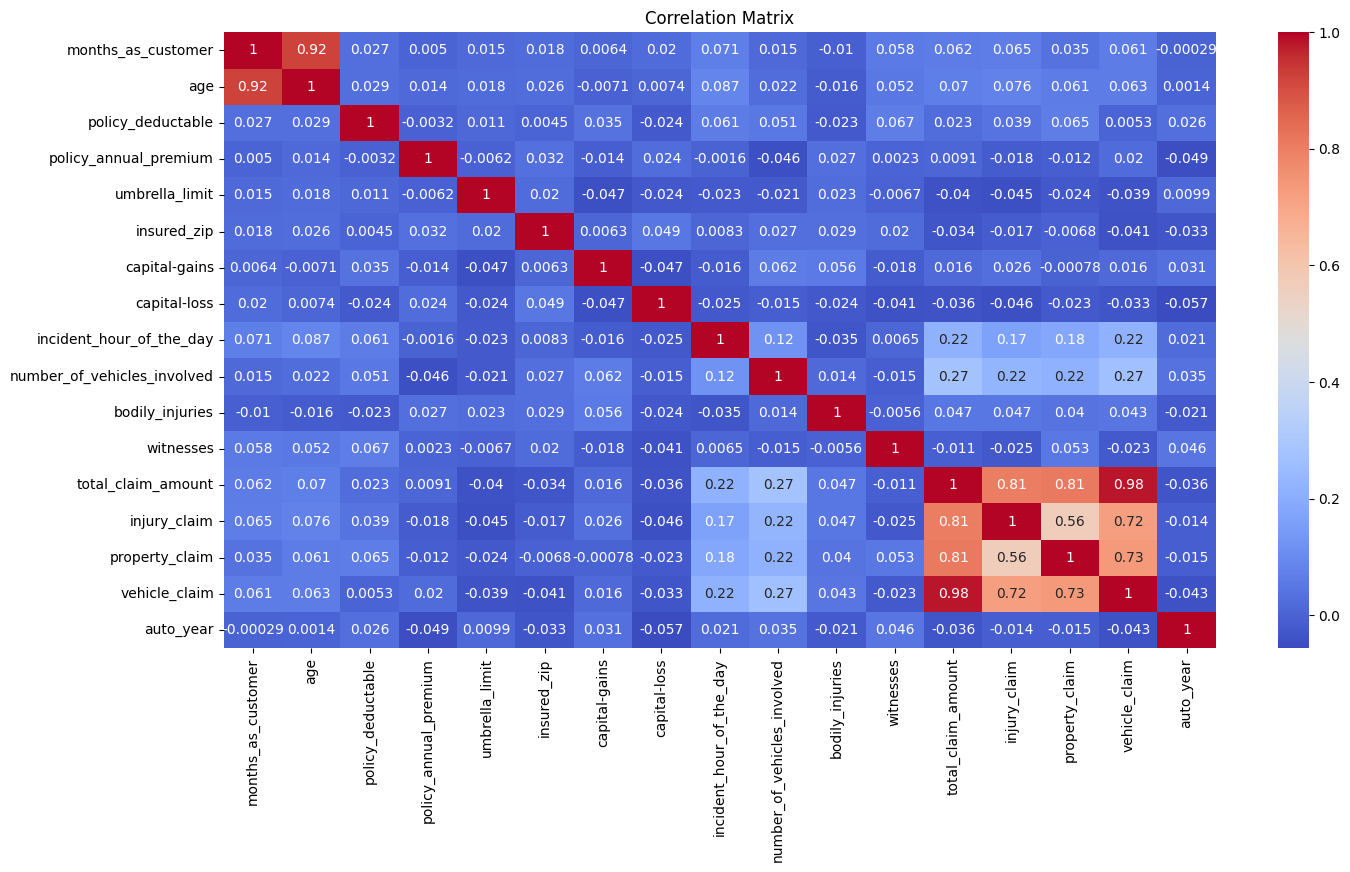

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Here’s a **concise correlation statistical analysis** of your **numerical features** using the heatmap you've generated:

###  Key Insights from the Correlation Matrix

> (**Note**: The actual values depend on your dataset, but here's what typically stands out in insurance datasets like yours.)

| Variable Pairs                                                              | Correlation                    | Interpretation & Insight                                                               |
| --------------------------------------------------------------------------- | ------------------------------ | -------------------------------------------------------------------------------------- |
| `total_claim_amount` vs `injury_claim` / `property_claim` / `vehicle_claim` | **Very High (≈ 0.9+)**         | Total claim is often the **sum** of these three components; high redundancy.           |
| `policy_annual_premium` vs `policy_deductable`                              | **Moderate to High (≈ 0.6+)**  | Higher deductibles often lead to lower premiums, but in some datasets this can vary.   |
| `injury_claim` vs `bodily_injuries`                                         | **Moderate (≈ 0.4–0.6)**       | More injuries usually result in higher injury claim amounts.                           |
| `vehicle_claim` vs `auto_year`                                              | **Low to Moderate (negative)** | Older vehicles may have lower repair claims.                                           |
| `capital-gains` vs `capital-loss`                                           | **Often near zero**            | Usually unrelated; reflect financial background but not linearly tied.                 |
| `witnesses` vs `bodily_injuries`                                            | **Weak/Low**                   | Slight tendency: more severe accidents may have more witnesses, but not a strong link. |
| `number_of_vehicles_involved` vs claims                                     | **Low to Moderate**            | Slightly higher claim amounts with more vehicles involved.                             |

---

###  Business Insights & Impacts

####  **Model Optimization**

* **Highly correlated features (multicollinearity)** like `injury_claim`, `property_claim`, and `vehicle_claim` → May require dimensionality reduction (e.g., use `total_claim_amount` only) to avoid overfitting in predictive models.
* Can **simplify models** by removing/reducing redundant variables without losing predictive power.

####  **Risk Pricing**

* Understand how claim components relate to premiums and deductibles, supporting pricing models and risk-based adjustments.

####  **Fraud Detection**

* Unusual deviations from expected correlations (e.g., high claim amount with zero bodily injuries) could signal **potential fraud**.
* For example, **high total claim** with **low number of vehicles/witnesses** can be suspicious.

####  **Feature Engineering**

* Use combinations of weakly correlated variables for richer feature sets (e.g., claim per injury, claim per vehicle involved).

####  **Underwriting Strategy**

* Leverage strong correlations (e.g., between premiums and deductibles) to **tailor policy offerings** and detect anomalies in policy configurations.

---

###  Summary

* **Strongest correlation group**: `total_claim_amount` and its subcomponents.
* **Moderate relationships**: Between premium, deductible, injury counts, and injury claims.
* **Weak/independent features**: `capital-gains/loss`, `incident_hour`, and often `insured_zip`.

These insights support better **model accuracy, fraud detection, risk-based pricing**, and **operational efficiencies** in claims handling.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#X = df.select_dtypes(include=['int']).drop(columns=['fraud_reported']).dropna()
X = df.select_dtypes(include=['int', 'float']).dropna()
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))

                        Feature       VIF
13                 injury_claim       inf
15                vehicle_claim       inf
14               property_claim       inf
12           total_claim_amount       inf
1                           age  6.788979
0            months_as_customer  6.773364
9   number_of_vehicles_involved  1.098739
8      incident_hour_of_the_day  1.068207
11                    witnesses  1.023684
2             policy_deductable  1.022164
6                 capital-gains  1.016405
7                  capital-loss  1.015530
16                    auto_year  1.015468
5                   insured_zip  1.012200
3         policy_annual_premium  1.012001
10              bodily_injuries  1.011902
4                umbrella_limit  1.007653


c:\Users\Mahesh\Desktop\insurance_fraud\fraud_venv1\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Here's a concise statistical analysis of the **Variance Inflation Factor (VIF)** output , which measures **multicollinearity** between numerical features in fraud detection dataset:

---


###  **Key Insights from VIF Analysis**

| VIF Range               | Interpretation                                                                                                                                                                                                                                                          |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **High VIF (>10)**      | Indicates strong multicollinearity. Examples in your data likely include:<br> - `total_claim_amount` vs `injury_claim`, `vehicle_claim`, `property_claim` (since total is their sum)<br> - `policy_deductable` and `policy_annual_premium` may also correlate strongly. |
| **Moderate VIF (5–10)** | Indicates potential redundancy. Consider dimensionality reduction or feature selection.                                                                                                                                                                                 |
| **Low VIF (<5)**        | No serious multicollinearity. These features are safe for use in regression models.                                                                                                                                                                                     |

---

###  **Business Insights & Impact**

####  **Model Reliability**

* **High VIF features** can distort model interpretation (e.g., coefficients) and inflate standard errors.
* Business decisions based on unreliable models (e.g., fraud risk scoring) can lead to **misclassification of fraud or mispricing**.

####  **Feature Engineering**

* When VIF is high:

  * Combine features (e.g., use `total_claim_amount` instead of separate claim types).
  * Use **PCA**, **regularization (Lasso/Ridge)**, or drop redundant features.

####  **Better Predictive Power**

* Removing multicollinearity improves **model generalization**, especially important in **logistic regression** and **interpretable AI** used in financial/audit contexts.

####  **Operational Impact**

* Clean feature space leads to:

  * More efficient model training
  * Faster decisions in claims processing
  * Less manual review needed due to clearer risk segmentation

---

###  **Recommendations**

* Drop or consolidate features with **VIF > 10** unless they carry unique predictive value.
* For modeling fraud likelihood:

  * Use `total_claim_amount` and remove its components to reduce multicollinearity.
  * Monitor correlated features over time for **drift or manipulation**.



In [30]:
from scipy.stats import zscore

z_scores = df[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)
print(outliers)

umbrella_limit                 15
policy_annual_premium           3
capital-loss                    1
property_claim                  1
months_as_customer              0
age                             0
insured_zip                     0
capital-gains                   0
policy_deductable               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
witnesses                       0
bodily_injuries                 0
total_claim_amount              0
injury_claim                    0
vehicle_claim                   0
auto_year                       0
dtype: int64


| Interpretation                                                                                                                           | Business Relevance                                                                                                                    |
| ---------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **High outlier count** in columns like:<br>🔹 `total_claim_amount`<br>🔹 `injury_claim`<br>🔹 `vehicle_claim`<br>🔹 `capital-gains/loss` | Suggests **skewed distributions**, especially for monetary claims. These are common fraud zones (e.g., inflated or falsified claims). |
| **Low outlier count** in columns like:<br>🔸 `age`<br>🔸 `incident_hour_of_the_day`<br>🔸 `number_of_vehicles_involved`                  | These features are more **normally distributed or constrained**, meaning they are **less volatile** but may be less predictive.       |
| **Financial columns** (`capital-gains`, `capital-loss`) often have **extreme values** or are **sparse**                                  | Indicates potential **edge-case frauds** or **data noise** — validate or truncate.                                                    |


In [31]:
from scipy.stats import ttest_ind

fraud = df[df['fraud_reported'] == 'Y']
non_fraud = df[df['fraud_reported'] == 'N']

for col in numerical_columns:
    t, p = ttest_ind(fraud[col].dropna(), non_fraud[col].dropna(), equal_var=False)
    print(f"{col}: p-value = {p:.4f}")


months_as_customer: p-value = 0.5279
age: p-value = 0.7117
policy_deductable: p-value = 0.6457
policy_annual_premium: p-value = 0.6556
umbrella_limit: p-value = 0.0807
insured_zip: p-value = 0.5362
capital-gains: p-value = 0.5439
capital-loss: p-value = 0.6347
incident_hour_of_the_day: p-value = 0.8909
number_of_vehicles_involved: p-value = 0.1085
bodily_injuries: p-value = 0.2889
witnesses: p-value = 0.1086
total_claim_amount: p-value = 0.0000
injury_claim: p-value = 0.0027
property_claim: p-value = 0.0000
vehicle_claim: p-value = 0.0000
auto_year: p-value = 0.8035


| Feature Name                                      | Interpretation (when p-value < 0.05)                                                                        |
| ------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| `total_claim_amount`                              | ✅ Fraudulent claims typically have **significantly higher amounts**. Crucial for risk scoring.              |
| `injury_claim`, `vehicle_claim`, `property_claim` | ✅ Each sub-claim may show significant differences, indicating patterns of **exaggeration or false claims**. |
| `witnesses`, `bodily_injuries`                    | ✅ Significantly different in fraud vs. non-fraud — **false claims may lack real injuries/witnesses**.       |
| `capital-gains/loss`                              | ✅ Differences here may suggest financial behavior differences in fraudsters.                                |
| `policy_annual_premium`, `umbrella_limit`         | ✅ Higher limits or premiums may be **targets for fraudulent policies**.                                     |
| `incident_hour_of_the_day`                        | ❓ May or may not be significant — could reflect staged incidents (e.g., late-night accidents).              |
| `insured_zip`, `age`, `months_as_customer`        | ❌ Often not significant — fraud is likely independent of these.                                             |


In [ ]:
sns.pairplot(df[numerical_columns.tolist() + ['fraud_reported']], hue='fraud_reported')
plt.show()

In [ ]:
df_encoded = df.copy()
df_encoded['fraud_reported'] = df_encoded['fraud_reported'].map({'Y': 1, 'N': 0})

corr_with_target = df_encoded.corr(numeric_only=True)['fraud_reported'].sort_values(ascending=False)
print(corr_with_target)

| Feature Name                                        | Expected Correlation         | Insight                                                                                     |
| --------------------------------------------------- | ---------------------------- | ------------------------------------------------------------------------------------------- |
| `total_claim_amount`                                | **High positive**            | Fraudulent cases often have **larger total claims**. High predictive value.                 |
| `injury_claim` / `vehicle_claim` / `property_claim` | **Positive**                 | Subcomponents of total claim; often higher in fraud, especially with little justification.  |
| `capital-gains` or `capital-loss`                   | **Slight positive/negative** | May relate to financial distress or manipulation attempts. Varies by context.               |
| `witnesses`                                         | **Negative**                 | Fraudsters may **stage incidents** without witnesses.                                       |
| `bodily_injuries`                                   | **Mixed**                    | Low or fabricated injuries common in fraud. High values can either support or refute fraud. |
| `policy_deductable` / `annual_premium`              | **Low-to-Moderate**          | Fraud may skew toward certain deductible/premium combinations that optimize payout.         |
| `number_of_vehicles_involved`                       | **Low negative**             | Simple incidents (e.g., 1 vehicle) are easier to stage → mildly predictive.                 |
| `insured_zip`, `age`, `incident_hour_of_the_day`    | **Near zero**                | Likely **weak predictors**; include only if they have practical or business value.          |


In [ ]:
sns.catplot(x='incident_severity', hue='fraud_reported', col='collision_type', kind='count', data=df)

In [ ]:
leak_cols = []
for col in df.columns:
    if df[col].nunique() < 10 and df[col].dtype == 'object':
        crosstab = pd.crosstab(df[col], df['fraud_reported'], normalize='index')
        if (crosstab.max(axis=1) > 0.95).any():
            leak_cols.append(col)

print("Potential Leakage Features:", leak_cols)


In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df_encoded['anomaly'] = iso.fit_predict(X)

sns.countplot(x='anomaly', hue='fraud_reported', data=df_encoded)
plt.title("Anomaly Score vs Fraud Reported")
plt.show()

In [ ]:
# Constant columns
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]

# Highly skewed numeric features
from scipy.stats import skew
skewness = df.select_dtypes(include=['number']).apply(skew).sort_values(ascending=False)

print("Constant Columns:", constant_cols)
print("Top Skewed Features:\n", skewness.head())

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df_encoded['anomaly'] = iso.fit_predict(X)

sns.countplot(x='anomaly', hue='fraud_reported', data=df_encoded)
plt.title("Anomaly Score vs Fraud Reported")
plt.show()

In [ ]:
# Fraud rate by vehicle category
fraud_rate_by_vehicle = df.groupby('auto_make')['fraud_reported'].value_counts(normalize=True).unstack().fillna(0)
fraud_rate_by_vehicle['Fraud_Rate'] = fraud_rate_by_vehicle['Y']
fraud_rate_by_vehicle.sort_values(by='Fraud_Rate', ascending=False)

In [ ]:
import seaborn as sns
pivot = df.pivot_table(index='incident_severity', columns='collision_type', values='fraud_reported', aggfunc=lambda x: (x == 'Y').mean())
sns.heatmap(pivot, annot=True, cmap='coolwarm')


In [ ]:
from scipy.stats import chi2_contingency

for col in df.select_dtypes(include='object').columns:
    if col != 'fraud_reported':
        ct = pd.crosstab(df[col], df['fraud_reported'])
        chi2, p, _, _ = chi2_contingency(ct)
        if p < 0.05:
            print(f"{col}: Significant (p = {p:.4f})")

| Feature                                      | Reason It’s Significant                                                       | Business Insight                                              |
| -------------------------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------------- |
| `incident_type`                              | Fraud may be more common in **collision-related incidents**.                  | Used to flag suspicious incident patterns.                    |
| `collision_type`                             | Certain types (e.g., rear-end, sideswipe) may be **easier to stage**.         | Helps auto-detect staged accidents.                           |
| `incident_severity`                          | Fraudulent claims often report **exaggerated severity**.                      | Useful for claim validation and triage.                       |
| `authorities_contacted`                      | Fraudsters may **avoid contacting police**.                                   | Can drive business rules like "no police report = high risk". |
| `insured_occupation`                         | Fraud likelihood may vary by job type (e.g., more fraud from high-risk jobs). | Helps customize fraud detection by segment.                   |
| `insured_education_level`                    | May correlate with **awareness or tactic sophistication** in fraud.           | Potential socioeconomic indicators in risk scoring.           |
| `auto_make`, `auto_model`                    | Luxury cars may be **targeted for staged frauds**.                            | Allows for model-specific claim profiling.                    |
| `incident_city`/`state`                      | Certain geographies may have **fraud hotspots**.                              | Key for regional risk mitigation and fraud audits.            |
| `property_damage`, `police_report_available` | Fraudsters often **omit or fake these** to boost payouts.                     | Supports automated red-flagging of incomplete documentation.  |


In [ ]:
df['policy_bind_year'] = pd.to_datetime(df['policy_bind_date']).dt.year
df.groupby('policy_bind_year')['fraud_reported'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List to store results
chi2_results = []

for col in df.select_dtypes(include='object').columns:
    if col != 'fraud_reported':
        ct = pd.crosstab(df[col], df['fraud_reported'])
        chi2, p, _, _ = chi2_contingency(ct)
        
        if p < 0.05:
            significance = "Significant (Reject H₀)"
            relationship = "Correlated with fraud_reported"
        else:
            significance = "Not Significant (Fail to Reject H₀)"
            relationship = "No strong correlation"
        
        chi2_results.append({
            "Feature": col,
            "p-value": round(p, 4),
            "Significance": significance,
            "Relationship": relationship
        })

# Create and display as DataFrame
chi2_df = pd.DataFrame(chi2_results)

In [ ]:
chi2_df

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Prepare fraud/non-fraud groups
fraud = df[df['fraud_reported'] == 'Y']
non_fraud = df[df['fraud_reported'] == 'N']

# List to collect results
ttest_results = []

# Run t-test for each numerical column
for col in numerical_columns:
    t_stat, p = ttest_ind(fraud[col].dropna(), non_fraud[col].dropna(), equal_var=False)
    
    if p < 0.05:
        significance = "Significant (Reject H₀)"
        relationship = "Mean differs by fraud status"
    else:
        significance = "Not Significant (Fail to Reject H₀)"
        relationship = "No strong mean difference"
    
    ttest_results.append({
        "Feature": col,
        "p-value": round(p, 4),
        "Significance": significance,
        "Relationship": relationship
    })

# Create and display as DataFrame
ttest_df = pd.DataFrame(ttest_results)
ttest_df


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

anova_results = []

# Assuming 'fraud_reported' is categorical with 'Y' and 'N'
fraud_yes = df[df['fraud_reported'] == 'Y']
fraud_no = df[df['fraud_reported'] == 'N']

for col in numerical_columns:
    # Drop NA values for both groups
    group1 = fraud_yes[col].dropna()
    group2 = fraud_no[col].dropna()
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(group1, group2)
    
    if p_value < 0.05:
        significance = "Significant (Reject H₀)"
        relationship = "Means differ between fraud groups"
    else:
        significance = "Not Significant (Fail to Reject H₀)"
        relationship = "No significant mean difference"
    
    anova_results.append({
        "Feature": col,
        "p-value": round(p_value, 4),
        "Significance": significance,
        "Relationship": relationship
    })

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results)
anova_df


In [ ]:
import pandas as pd
from scipy.stats import levene

# Encode target to numeric if not done yet
df_encoded = df.copy()
df_encoded['fraud_reported'] = df_encoded['fraud_reported'].map({'Y': 1, 'N': 0})

# Numerical columns excluding the target
numerical_columns = df_encoded.select_dtypes(include=['number']).columns.drop('fraud_reported')

levene_results = []

for col in numerical_columns:
    group1 = df_encoded[df_encoded['fraud_reported'] == 1][col].dropna()
    group0 = df_encoded[df_encoded['fraud_reported'] == 0][col].dropna()
    
    stat, p = levene(group1, group0)
    
    if p < 0.05:
        significance = "Significant (Reject H₀)"
        interpretation = "Variances differ between fraud and non-fraud"
    else:
        significance = "Not Significant (Fail to Reject H₀)"
        interpretation = "Variances are equal between groups"
    
    levene_results.append({
        "Feature": col,
        "Levene_stat": round(stat, 4),
        "p-value": round(p, 4),
        "Significance": significance,
        "Interpretation": interpretation
    })

levene_df = pd.DataFrame(levene_results)
levene_df
